# Coronavirus (COVID-19) Visualization & Prediction  
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections. 

   Coronavirus Case Data is provided by <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>
   <br>Mobility data is provided by <a href='https://www.apple.com/covid19/mobility'>Apple</a>
   <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>World Health Organization</a>
   <br>Learn more from the <a href='https://www.cdc.gov/coronavirus/2019-ncov'>Centers for Disease Control and Prevention</a>
   <br>Check out map visualizations from  <a href='https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'>JHU CCSE Dashboard</a>
   <br>Source code is also on <a href='https://github.com/therealcyberlord'>my Github</a>
   <br> Last update: **4/10/2022 12:20 PM ET**. 
   <br> New Updates: Daily report data update for **4/10/22**. time series data update for **4/9/22**. Mobility data update for **4/9/22**. 
   <br>Changes to the prediction model, now the first day of the training data is 2/1/2021 instead of 1/22/2020. This is adjusted based on the recent progress in vaccinations. Removed NAN values from the data table. 
  <br>
    <br>Thank you guys for 400K!
   
* <a href='#world_wide_graphs'>Exploring Global Coronavirus Cases</a>
* <a href='#country_graphs'>Exploring Coronavirus Cases From Different Countries</a>
* <a href='#prediction'>Worldwide Confirmed Cases Prediction</a>
* <a href='#data_table'>Data Table</a>
* <a href='#pie_charts'>Pie Charts</a>
* <a href='#bar_charts'>Bar Charts</a>
* <a href='#hospital_testing'>US Testing Data</a>
* <a href='#mobility_data'>Mobility Data for Hotspots</a>

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import seaborn
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

Import the data (make sure you update this on a daily basis)

In [78]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-09-2022.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-09-2022.csv')
#apple_mobility = pd.read_csv("https://covid19-static.cdn-apple.com/covid19-mobility-data/2211HotfixDev17/v3/en-us/applemobilitytrends-2022-04-09.csv")

vaccinesCountries_df = pd.read_csv("https://raw.githubusercontent.com/pcruiher08/CovidVaccinationAnalysis/main/country_vaccinations.csv")
vaccinesManufacturer_df = pd.read_csv("https://raw.githubusercontent.com/pcruiher08/CovidVaccinationAnalysis/main/country_vaccinations_by_manufacturer.csv")

In [46]:
latest_data.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2022-04-10 04:20:52  33.93911   
1   NaN    NaN            NaN        Albania  2022-04-10 04:20:52  41.15330   
2   NaN    NaN            NaN        Algeria  2022-04-10 04:20:52  28.03390   
3   NaN    NaN            NaN        Andorra  2022-04-10 04:20:52  42.50630   
4   NaN    NaN            NaN         Angola  2022-04-10 04:20:52 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953     177974    7671        NaN     NaN  Afghanistan   
1  20.168300     274191    3492        NaN     NaN      Albania   
2   1.659600     265720    6874        NaN     NaN      Algeria   
3   1.521800      40328     153        NaN     NaN      Andorra   
4  17.873900      99194    1900        NaN     NaN       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     457.183624             4.310180  
1    9527.799013             1.273565  
2     605.960501             2.586934  
3   52194.395910             0.379389  
4     301.810963             1.915438

In [47]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/30/22  5/1/22  5/2/22  5/3/22  \
0        0        0        0        0  ...   178879  178899  178901  178901   
1        0        0        0        0  ...   275107  275167  275177  275191   
2        0        0        0        0  ...   265780  265782  265782  265782   
3        0        0        0        0  ...    41349   41349   41349   41349   
4        0        0        0        0  ...    99287   99287   99287   99287   

   5/4/22  5/5/22  5/6/22  5/7/22  5/8/22  5/9/22  
0  178901  178905  178919  178922  178981  179010  
1  275211  275266  275310  275341  275366  275372  
2  265782  265786  265791  265794  265798  265800  
3   41717   41717   41717   41717   41717   41717  
4   99287   99287   99287   99287   99287   99287  

[5 rows x 843 columns]

In [48]:
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2022-04-10 04:31:20  32.3182  -86.9023   
1          Alaska             US  2022-04-10 04:31:20  61.3707 -152.4044   
2  American Samoa             US  2022-04-10 04:31:20 -14.2710 -170.1320   
3         Arizona             US  2022-04-10 04:31:20  33.7298 -111.4312   
4        Arkansas             US  2022-04-10 04:31:20  34.9697  -92.3731   

   Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  \
0    1296730   19376        NaN     NaN   1.0   26446.687204   
1     248675    1228        NaN     NaN   2.0   33993.124141   
2       5018       8        NaN     NaN  60.0    9018.529502   
3    2014020   29681        NaN     NaN   4.0   27669.986345   
4     833655   11305        NaN     NaN   5.0   27624.557460   

   Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio         UID  \
0           7492639.0                  NaN             1.494220  84000001.0   
1                 NaN                  NaN             0.493817  84000002.0   
2                 NaN                  NaN             0.159426        16.0   
3          18995536.0                  NaN             1.473719  84000004.0   
4           5083908.0                  NaN             1.356077  84000005.0   

  ISO3   Testing_Rate  Hospitalization_Rate  
0  USA  152811.672413                   NaN  
1  USA            NaN                   NaN  
2  ASM            NaN                   NaN  
3  USA  260973.685335                   NaN  
4  USA  168463.823363                   NaN

In [49]:
cols = confirmed_df.keys()

In [50]:
vaccinesManufacturer_df.head()

location        date             vaccine  total_vaccinations
0  Argentina  2020-12-29             Moderna                   2
1  Argentina  2020-12-29  Oxford/AstraZeneca                   3
2  Argentina  2020-12-29   Sinopharm/Beijing                   1
3  Argentina  2020-12-29           Sputnik V               20481
4  Argentina  2020-12-30             Moderna                   2


Get all the dates for the ongoing coronavirus pandemic 

In [53]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
vaccines = vaccinesManufacturer_df.loc[:,]
# recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]


0        2020-12-29
1        2020-12-29
2        2020-12-29
3        2020-12-29
4        2020-12-30
            ...    
35618    2022-03-29
35619    2022-03-29
35620    2022-03-29
35621    2022-03-29
35622    2022-03-29
Name: date, Length: 35623, dtype: object


In [68]:
vaccines.head(10)


location        date             vaccine  total_vaccinations
0  Argentina  2020-12-29             Moderna                   2
1  Argentina  2020-12-29  Oxford/AstraZeneca                   3
2  Argentina  2020-12-29   Sinopharm/Beijing                   1
3  Argentina  2020-12-29           Sputnik V               20481
4  Argentina  2020-12-30             Moderna                   2
5  Argentina  2020-12-30  Oxford/AstraZeneca                   3
6  Argentina  2020-12-30   Sinopharm/Beijing                   1
7  Argentina  2020-12-30           Sputnik V               40583
8  Argentina  2020-12-31             Moderna                   2
9  Argentina  2020-12-31  Oxford/AstraZeneca                   3

In [153]:
countriesSet = set()
for country in vaccines["location"]:
    countriesSet.add(country)
vaccineKeys = vaccines.keys()
vaccineData = vaccines.groupby(["location", "date","vaccine"]).sum()
#print(vaccineData)

#print(countriesSet)




#for country in countriesSet:
#if country == "Lithuania"
#vaccines.loc[vaccines["location"].isin(country)]
sub = vaccines[vaccines["location"] == "Lithuania"].reset_index()
sub['date'] = pd.to_datetime(sub['date'])
#sub.groupby(sub['date'].dt.strftime('%B'))['total_vaccinations'].sum().sort_values()
sub = sub.groupby([sub['date'].dt.strftime('%Y-%B'), "location", "vaccine"])['total_vaccinations'].mean().sort_values()
sub = sub.groupby(pd.Grouper(freq = 'M'))
print(sub)

plt.figure(figsize=(200,10))
seaborn.barplot(x='date', y='total_vaccinations', data=vaccines, hue='vaccine')
plt.xticks(rotation=70)

#vaccineData.head(20)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

     index   location        date             vaccine  total_vaccinations
0    18497  Lithuania  2021-01-01     Pfizer/BioNTech                2422
1    18498  Lithuania  2021-01-08     Pfizer/BioNTech               23567
2    18499  Lithuania  2021-01-15             Moderna                1044
3    18500  Lithuania  2021-01-15     Pfizer/BioNTech               51256
4    18501  Lithuania  2021-01-22             Moderna                2375
..     ...        ...         ...                 ...                 ...
227  18724  Lithuania  2022-03-11     Pfizer/BioNTech             3286179
228  18725  Lithuania  2022-03-18     Johnson&Johnson              294701
229  18726  Lithuania  2022-03-18             Moderna              327864
230  18727  Lithuania  2022-03-18  Oxford/AstraZeneca              536493
231  18728  Lithuania  2022-03-18     Pfizer/BioNTech             3289779

[232 rows x 5 columns]


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

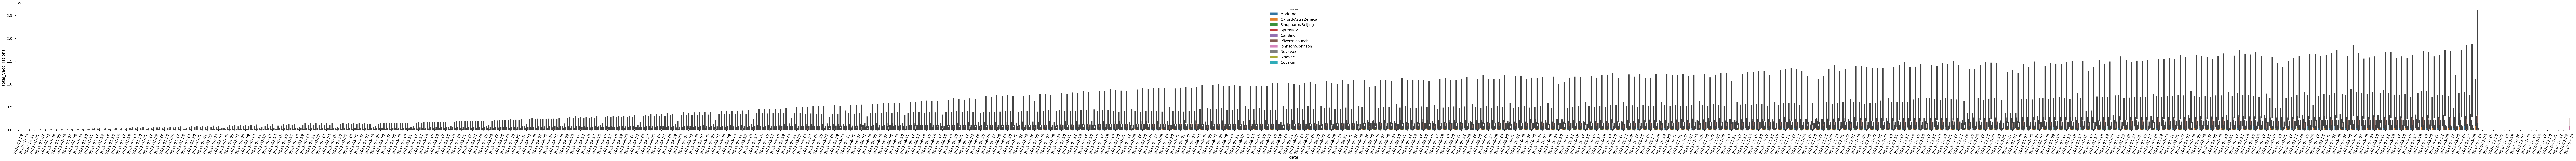

In [130]:
countriesSet = set()
for country in vaccines["location"]:
    countriesSet.add(country)
vaccineKeys = vaccines.keys()
vaccineData = vaccines.groupby(["location", "date","vaccine"]).sum()
#print(vaccineData)

#print(countriesSet)




#for country in countriesSet:
#if country == "Lithuania"
#vaccines.loc[vaccines["location"].isin(country)]
sub = vaccines[vaccines["location"] == "Lithuania"].reset_index()
print(sub)
plt.figure(figsize=(200,10))
seaborn.barplot(x='date', y='total_vaccinations', data=vaccines, hue='vaccine')
plt.xticks(rotation=70)

#vaccineData.head(20)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

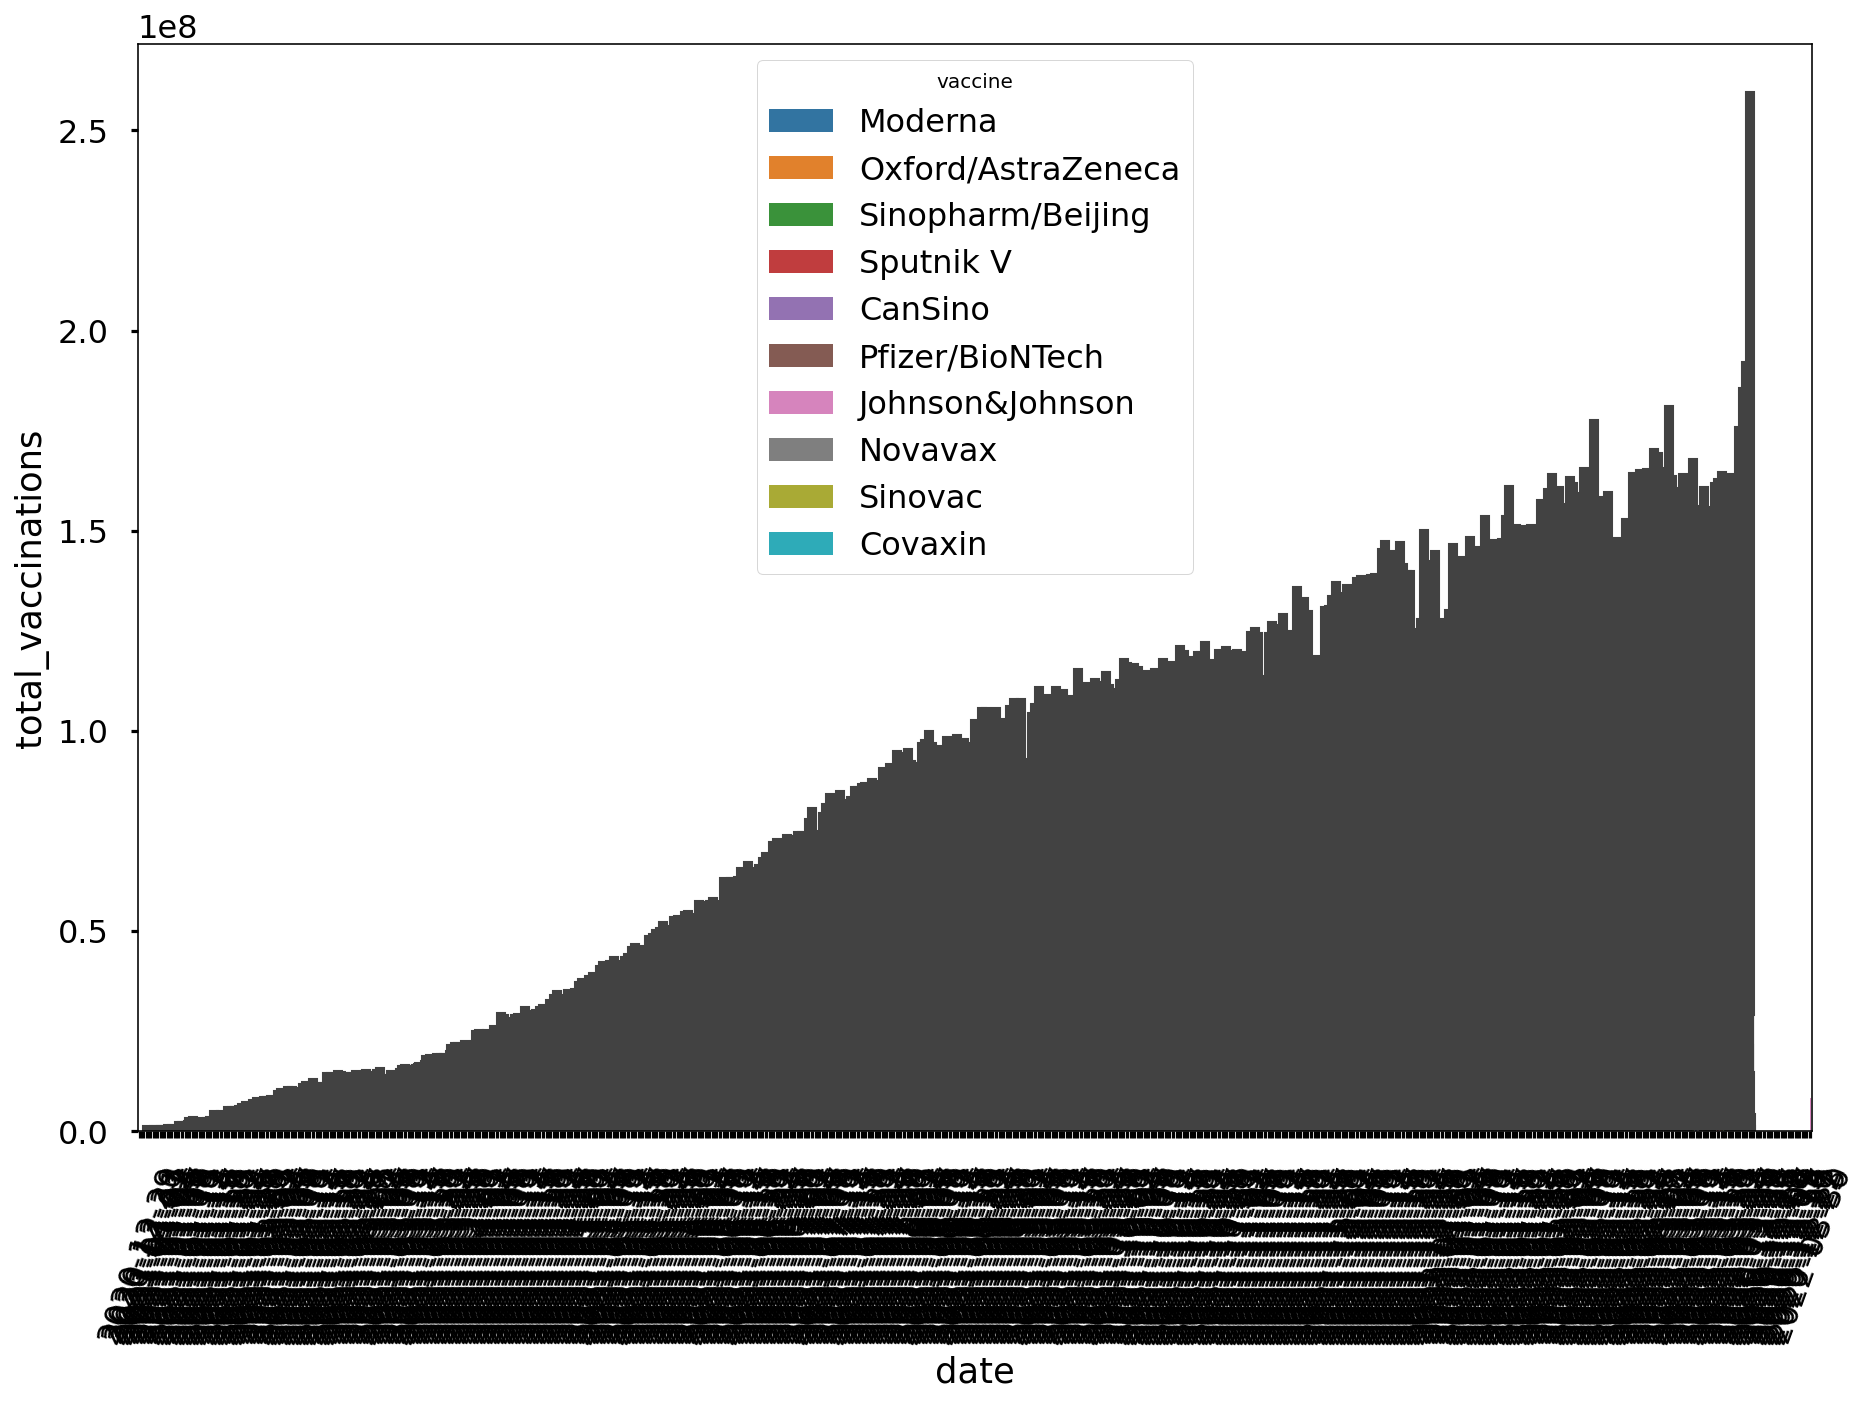

In [85]:
plt.figure(figsize=(15,10))
seaborn.barplot(x='date', y='total_vaccinations', data=vaccines, hue='vaccine')
plt.xticks(rotation=70)

In [10]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
world_vaccines = []

# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    #recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

Getting daily increases and moving averages

In [11]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
# world_daily_recovery = daily_increase(total_recovered)
# world_recovery_avg = moving_average(total_recovered, window)
# world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
# world_active_avg = moving_average(total_active, window)

In [12]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
# total_recovered = np.array(total_recovered).reshape(-1, 1)

Future forcasting

In [13]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

Convert integer into datetime for better visualization

In [14]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [15]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
days_to_skip = 376
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False) 

Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example. We will show the results in the later section. 

In [16]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [17]:
# svm_search.best_params_

In [18]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 25848705.62150302
MSE: 743544993658247.5


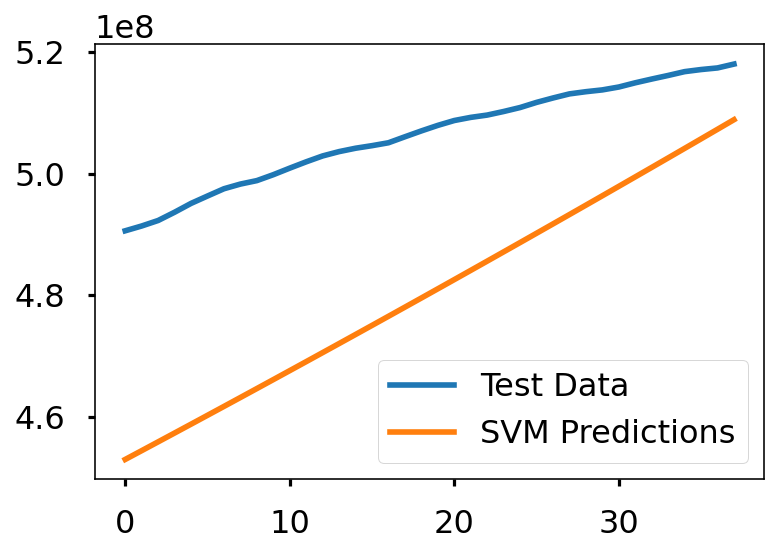

In [19]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [20]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=2)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [21]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 13164555.819672052
MSE: 242113597571290.53


In [22]:
print(linear_model.coef_)

[[ 4.21037211e+08 -1.51103029e+06  1.95368192e+03]]


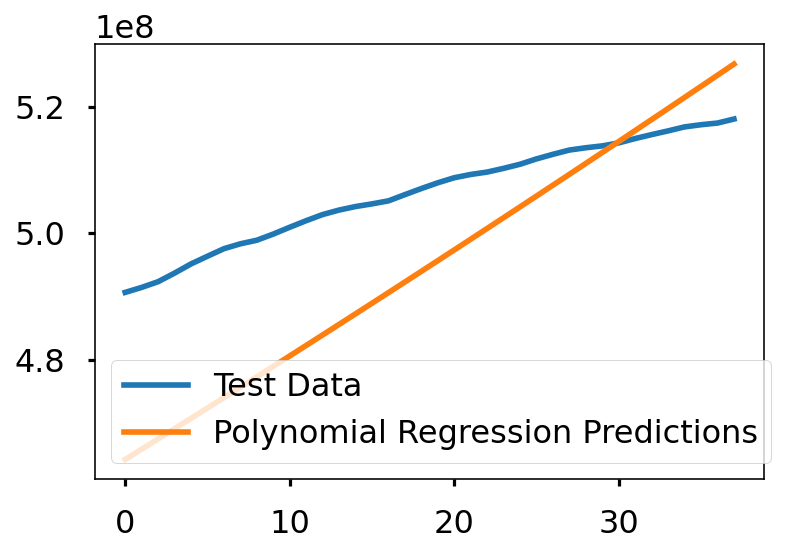

In [23]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [24]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    3.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.9s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [25]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': False,
 'lambda_2': 1e-05,
 'lambda_1': 0.001,
 'alpha_2': 1e-06,
 'alpha_1': 1e-06}

In [26]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 62306284.07408856
MSE: 3898609689018892.0


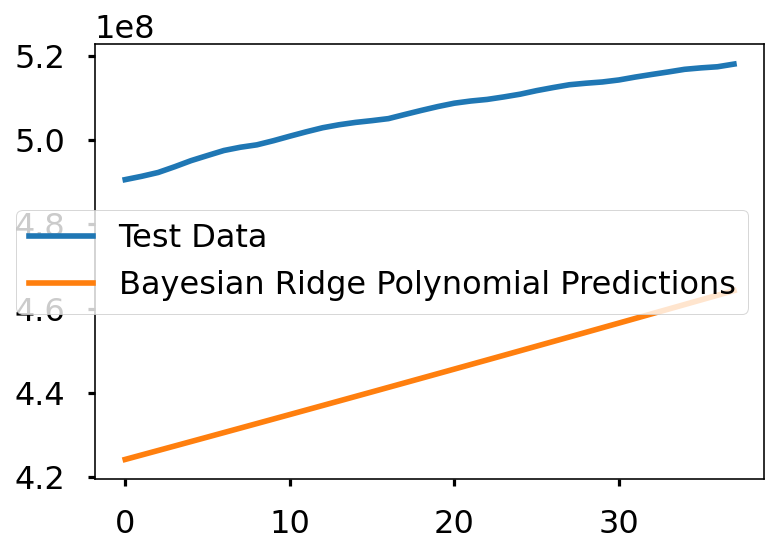

In [27]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

# Worldwide Overview 
Graphing the number of confirmed cases, deaths, and mortality rate (CFR). This gives us a big picture of the ongoing pandemic. 
 <a id='world_wide_graphs'></a>

In [28]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

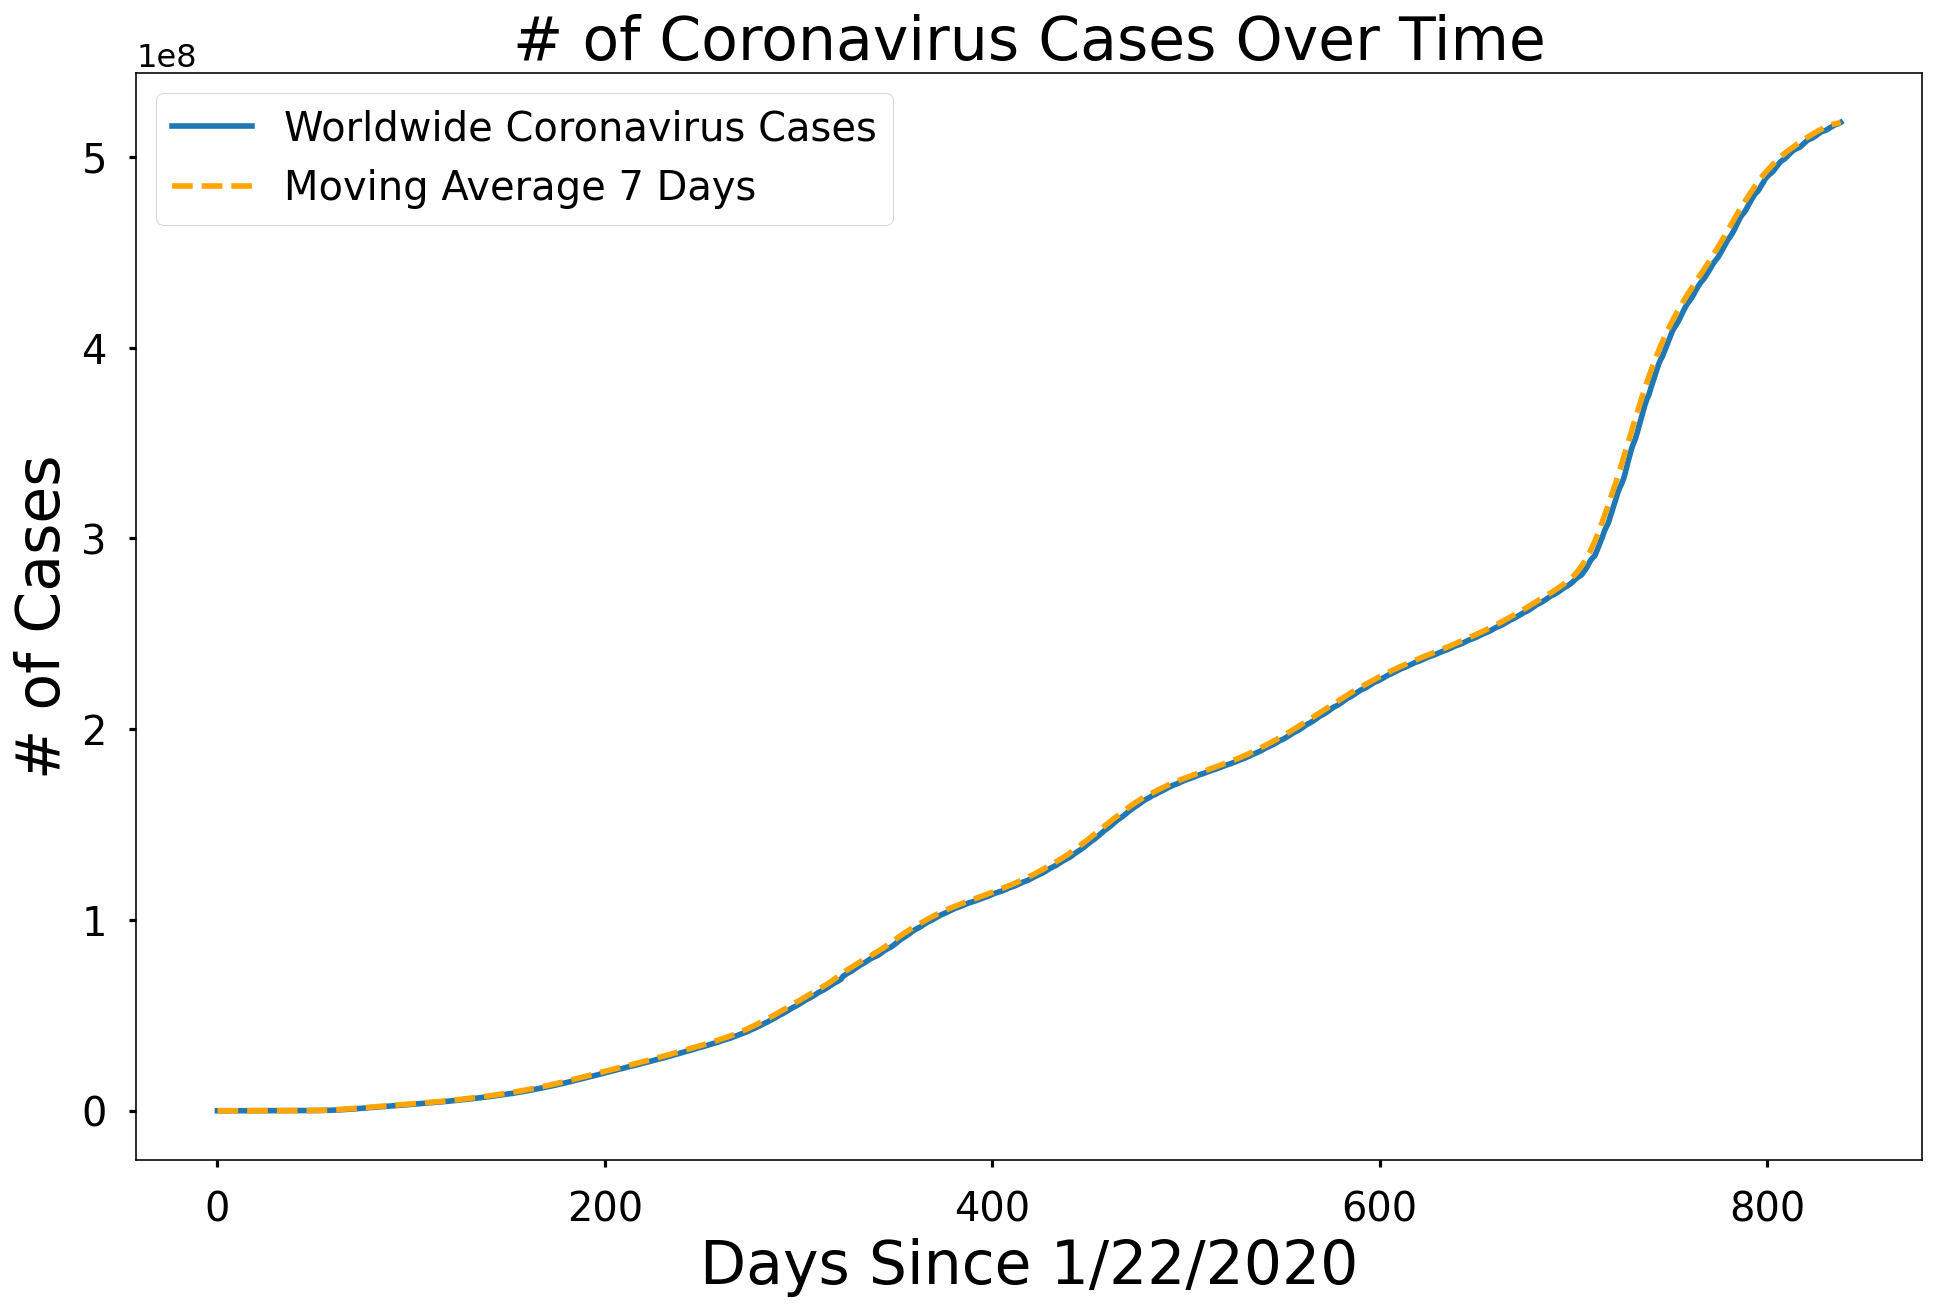

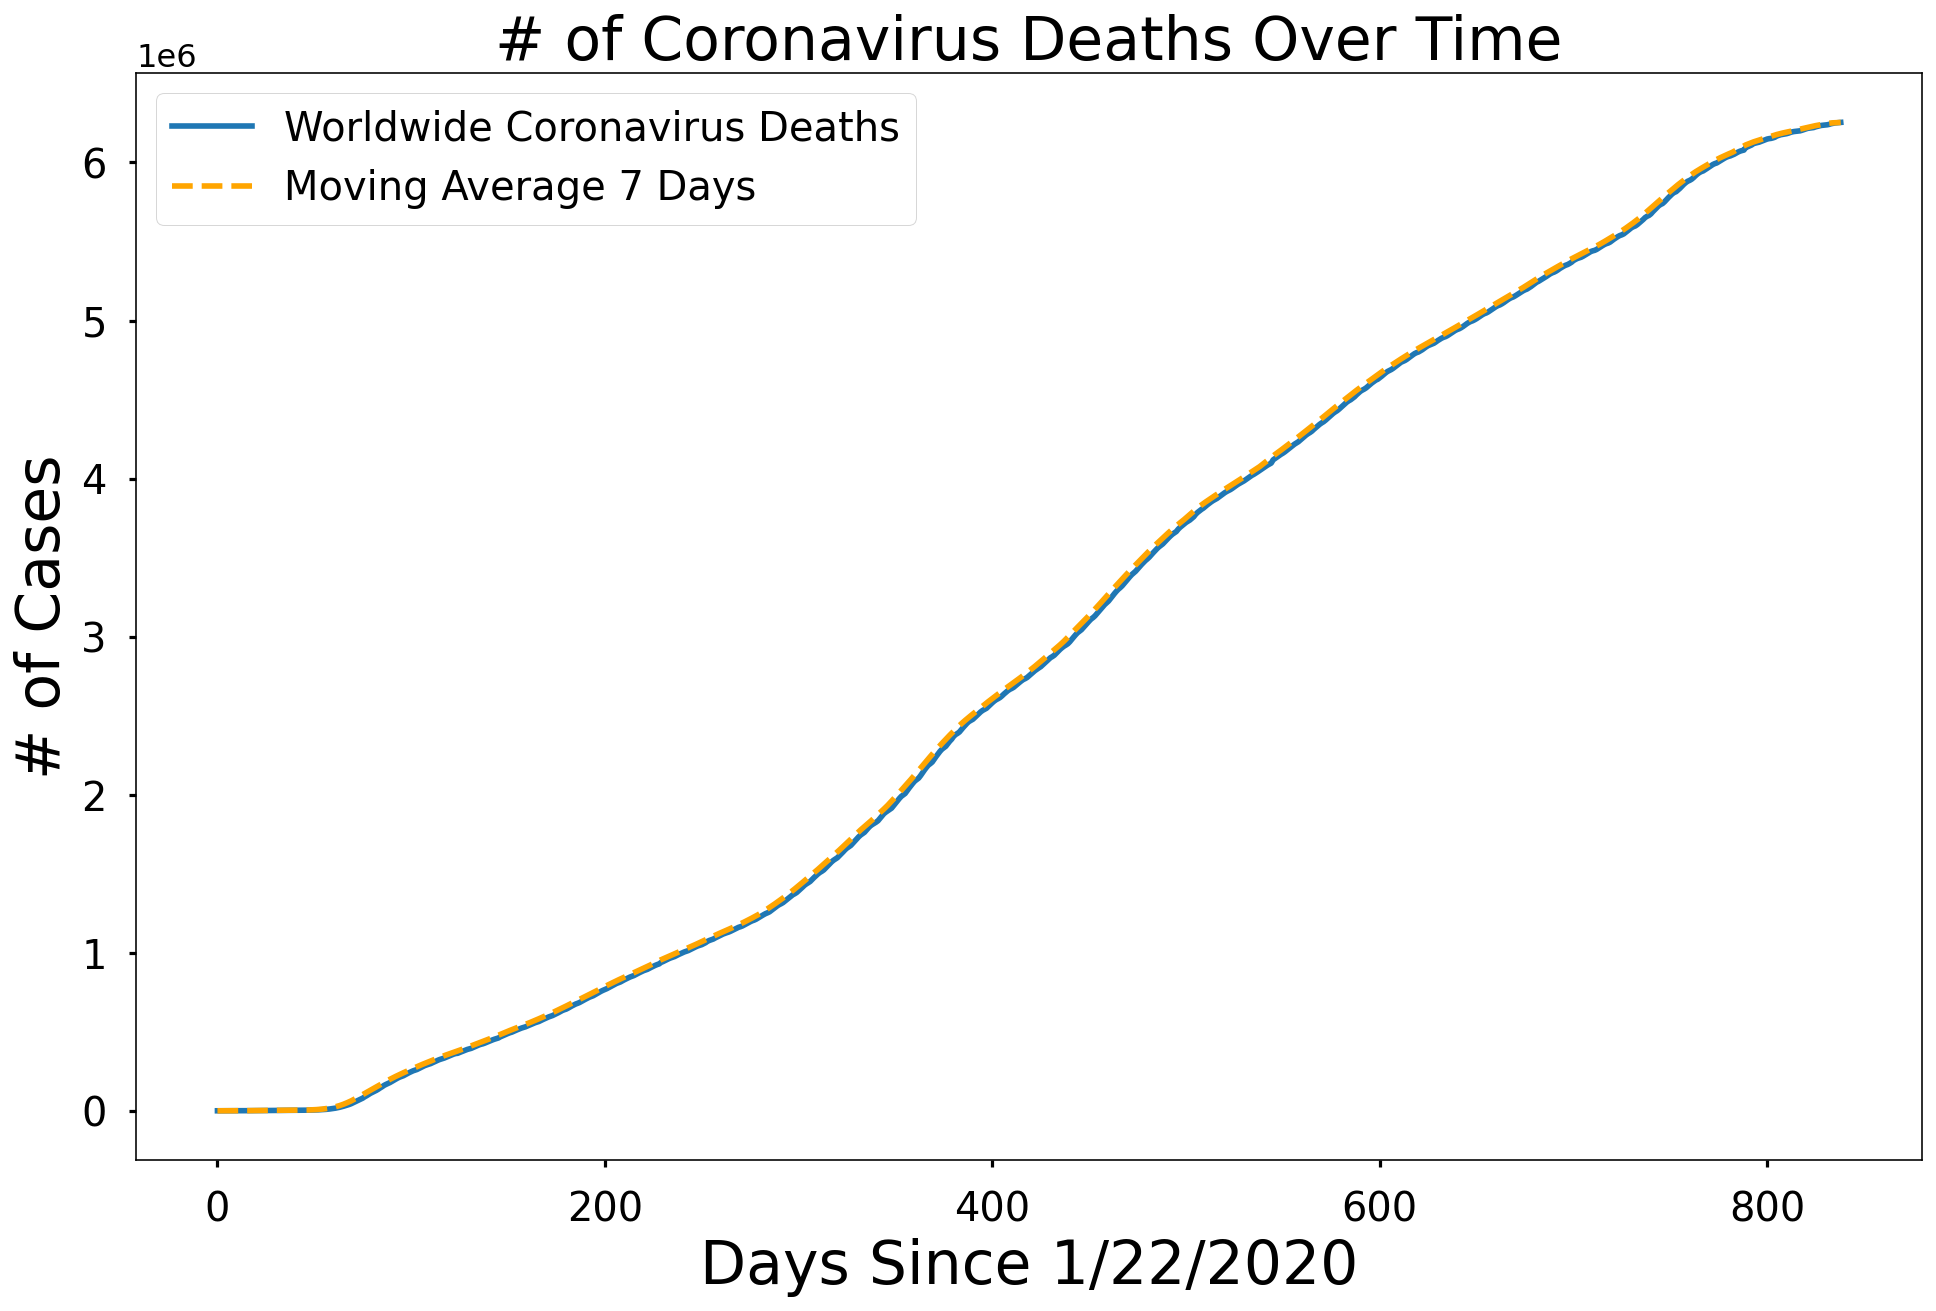

In [29]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, total_recovered)
# plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
# plt.title('# of Coronavirus Recoveries Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, total_active)
# plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='orange')
# plt.title('# of Coronavirus Active Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Active Cases', size=30)
# plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

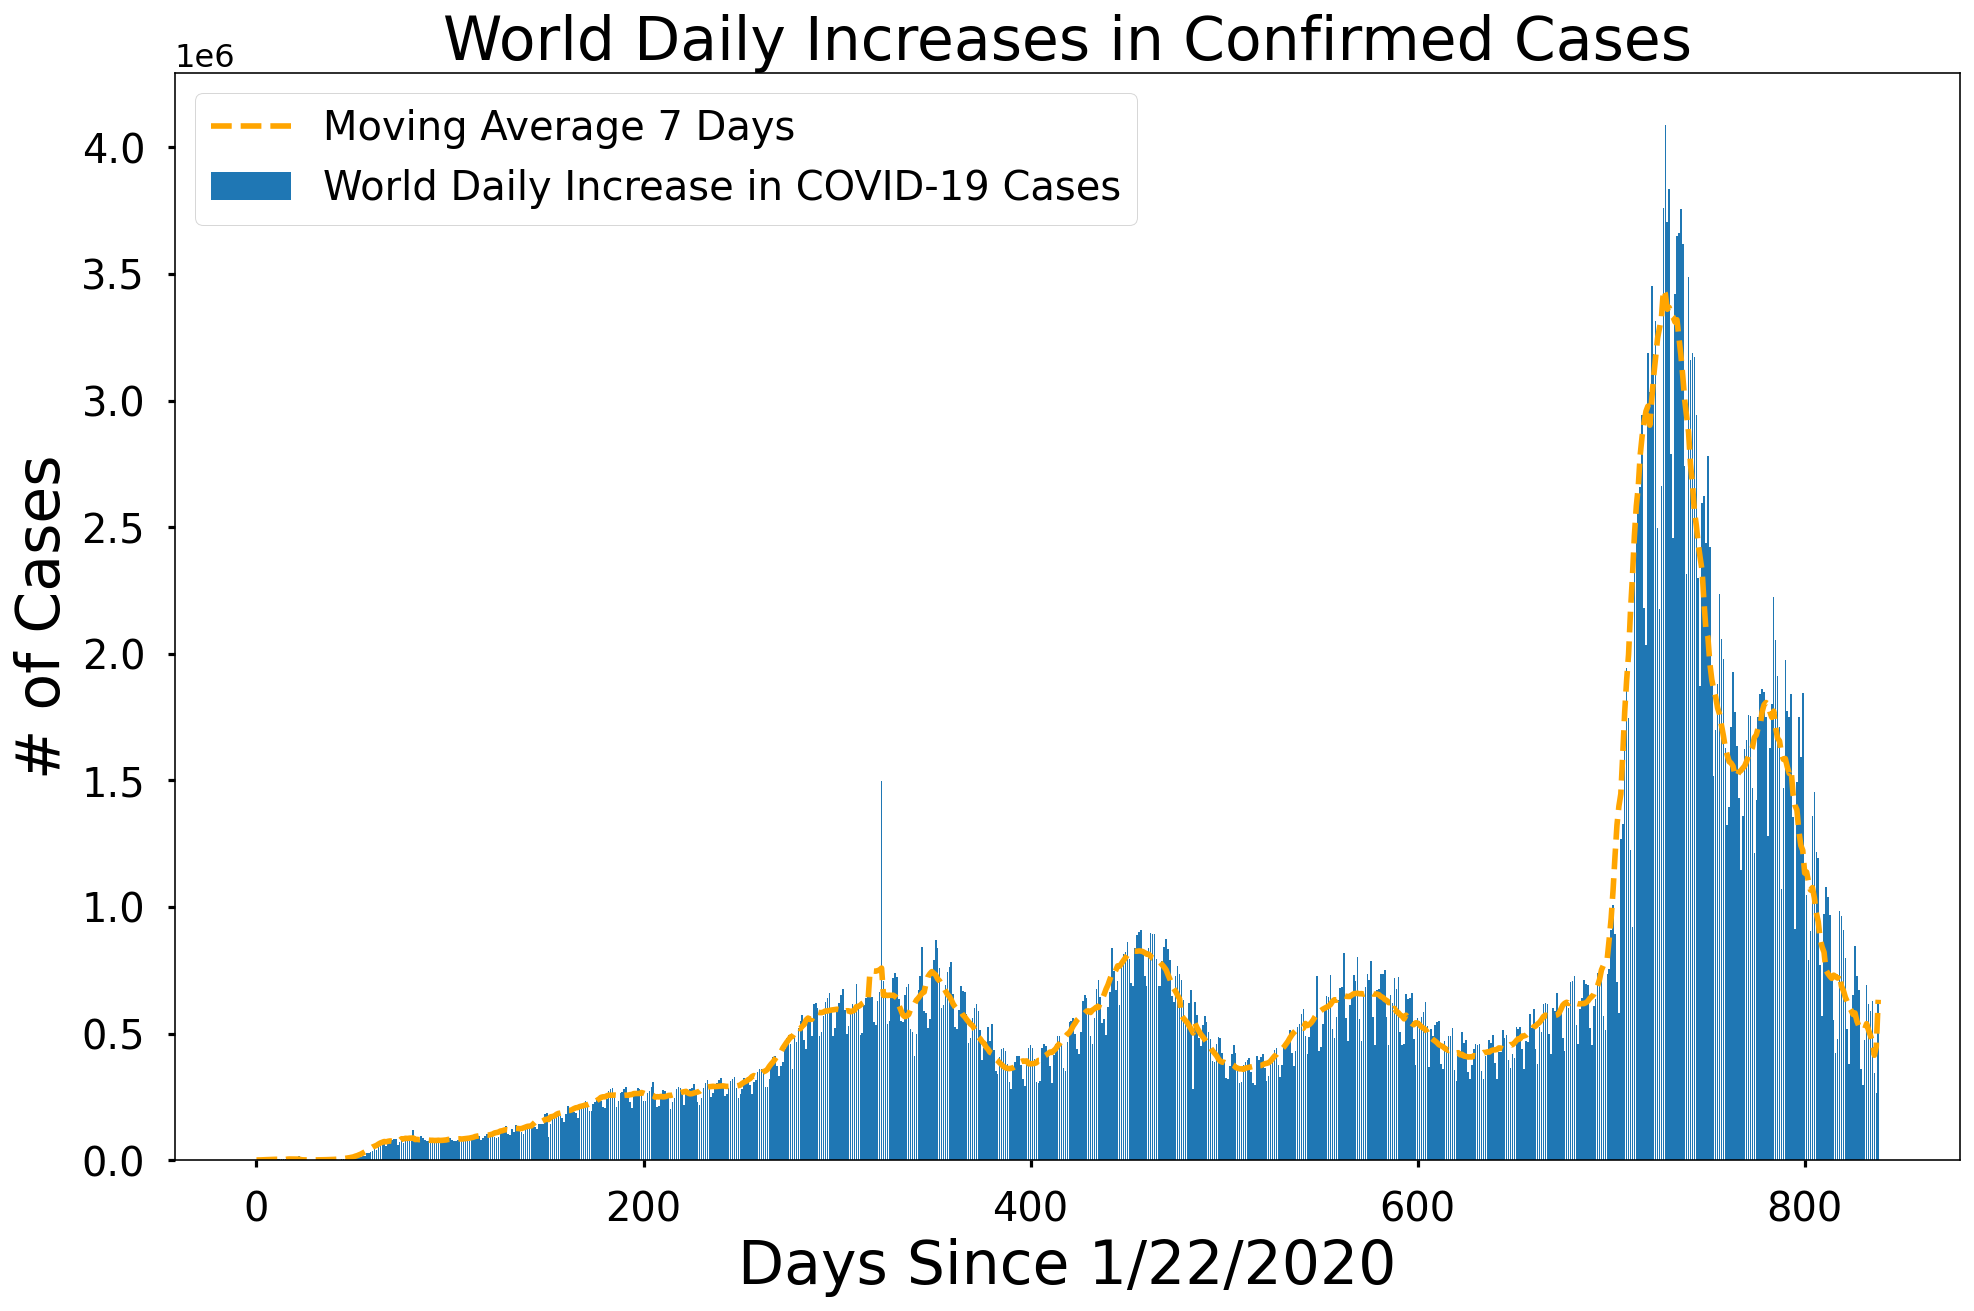

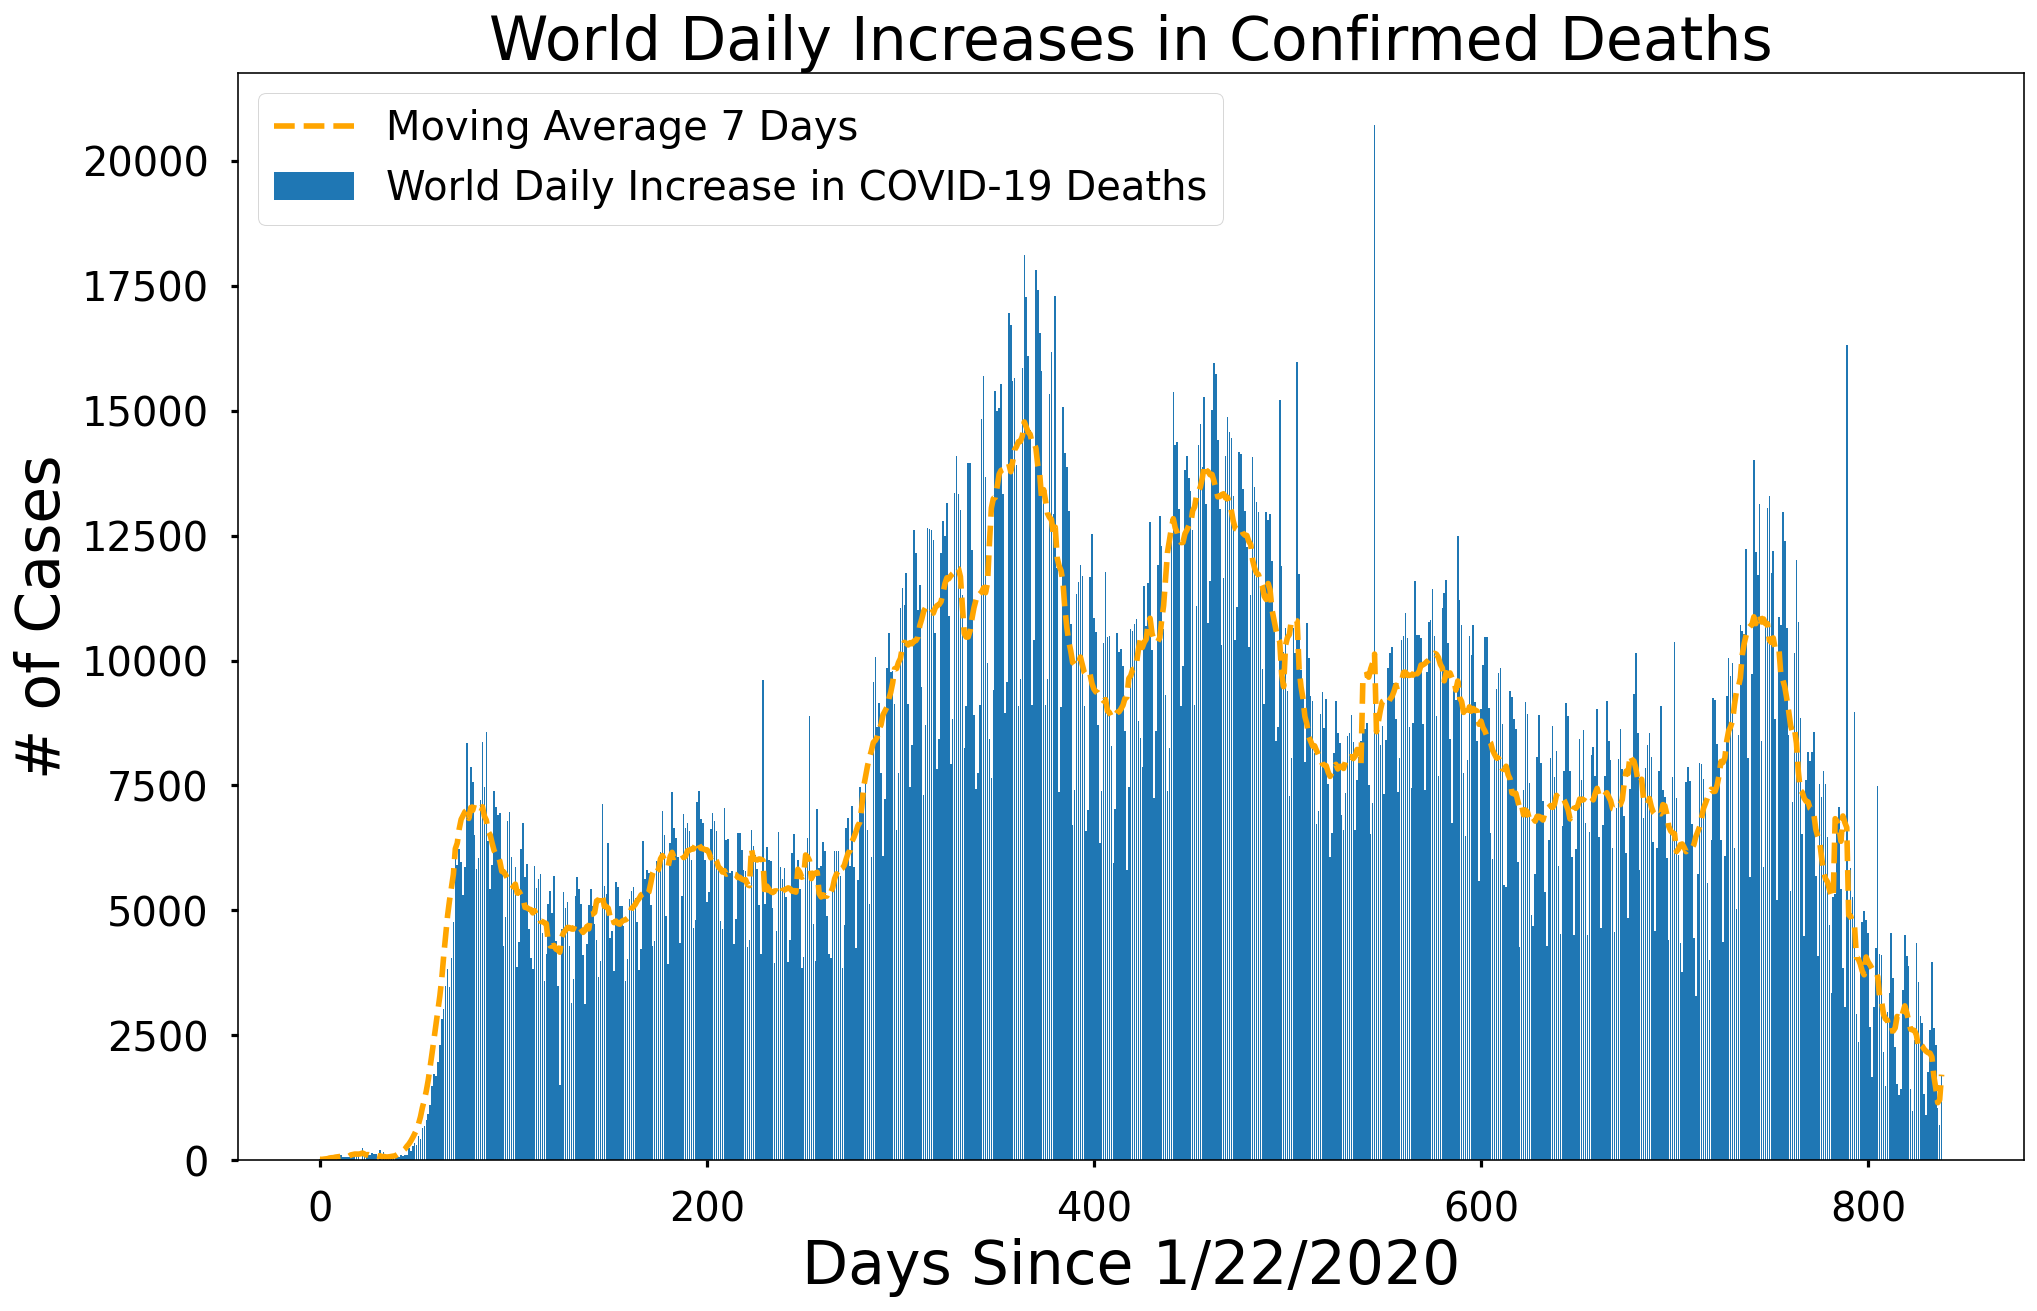

In [30]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(16, 10))
# plt.bar(adjusted_dates, world_daily_recovery)
# plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
# plt.title('World Daily Increases in Confirmed Recoveries', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

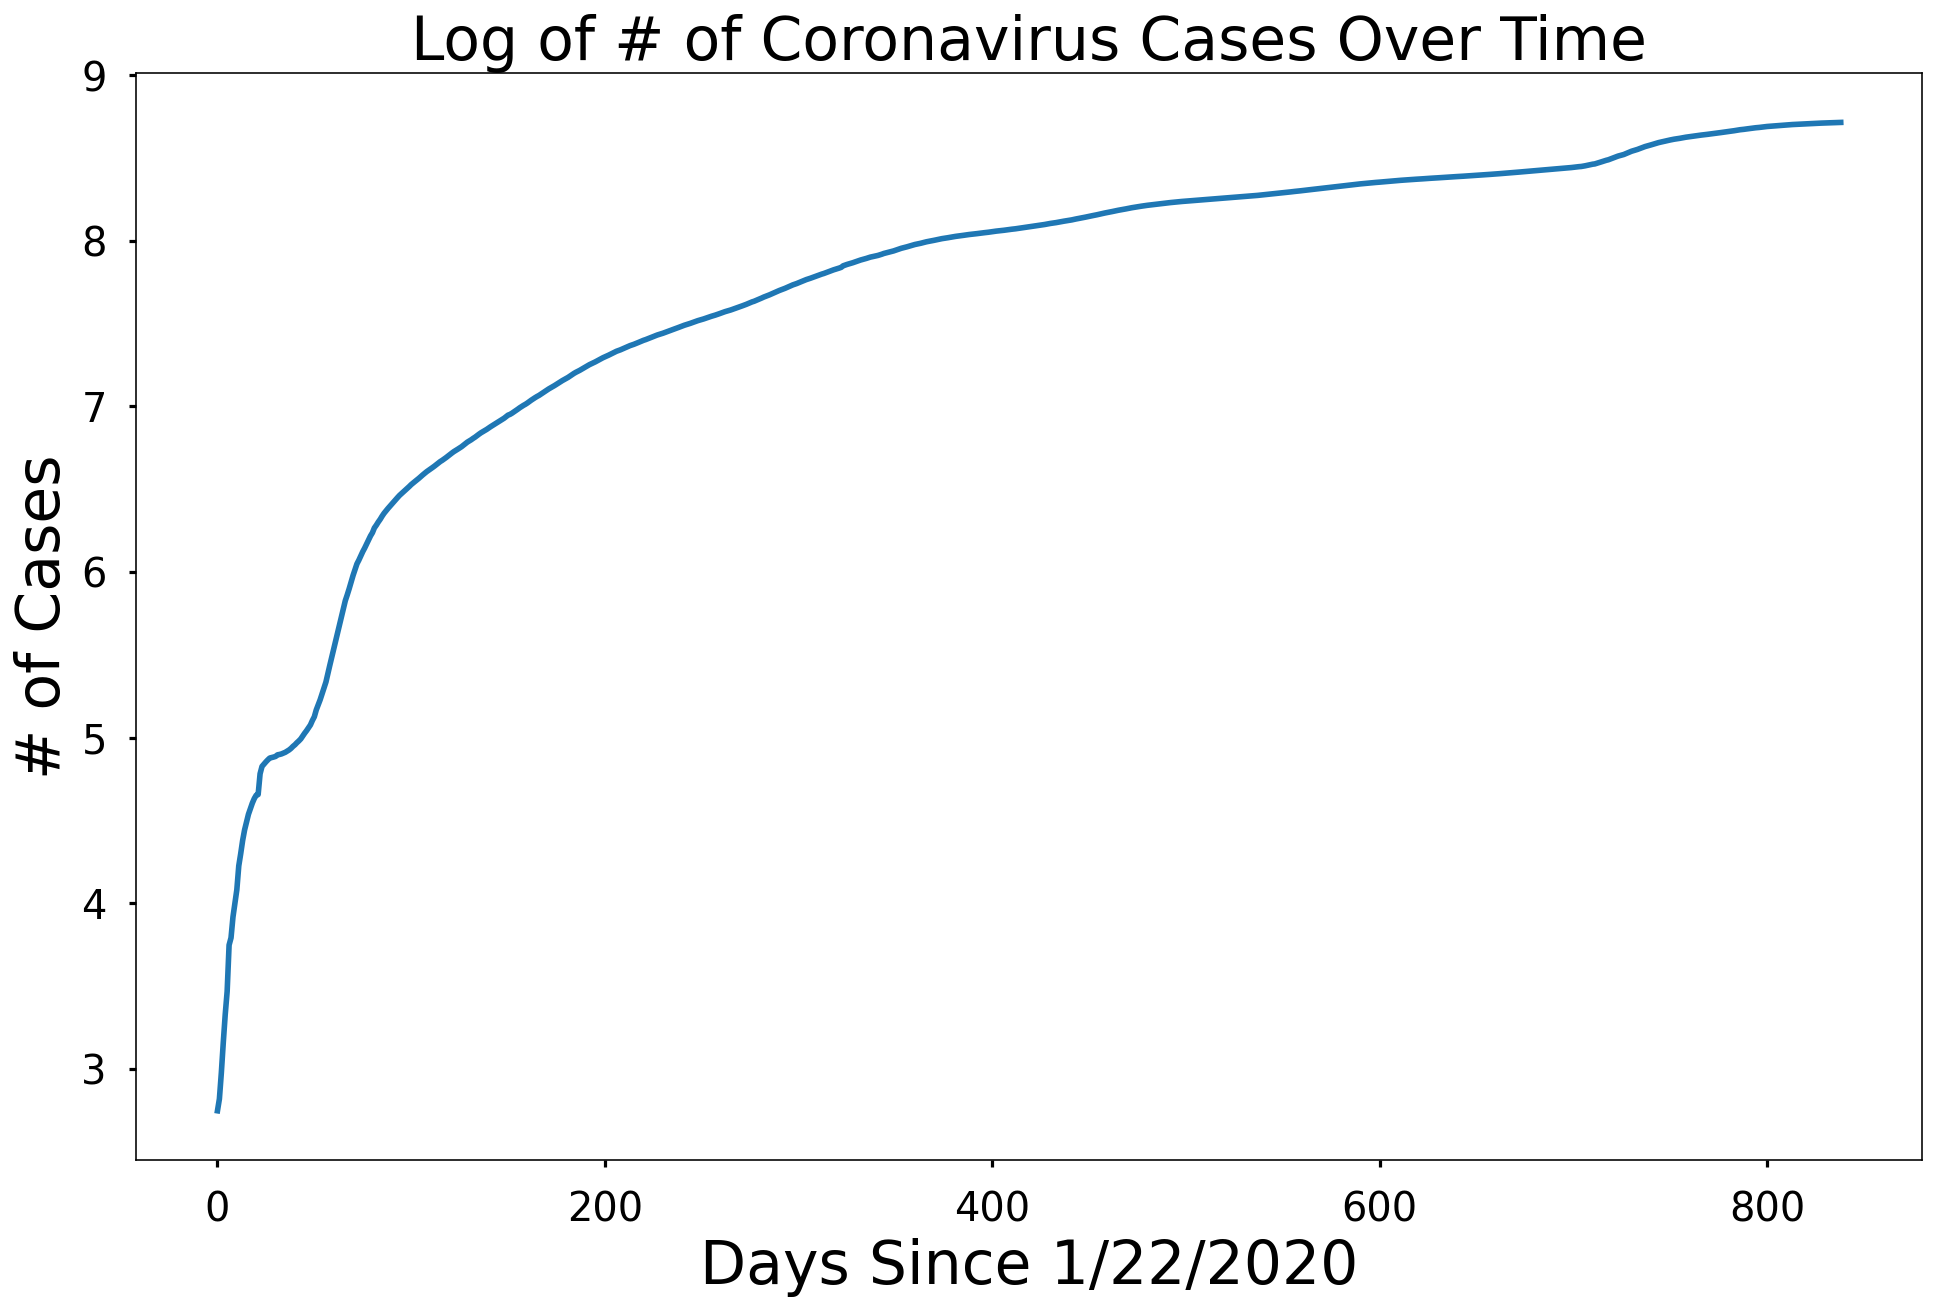

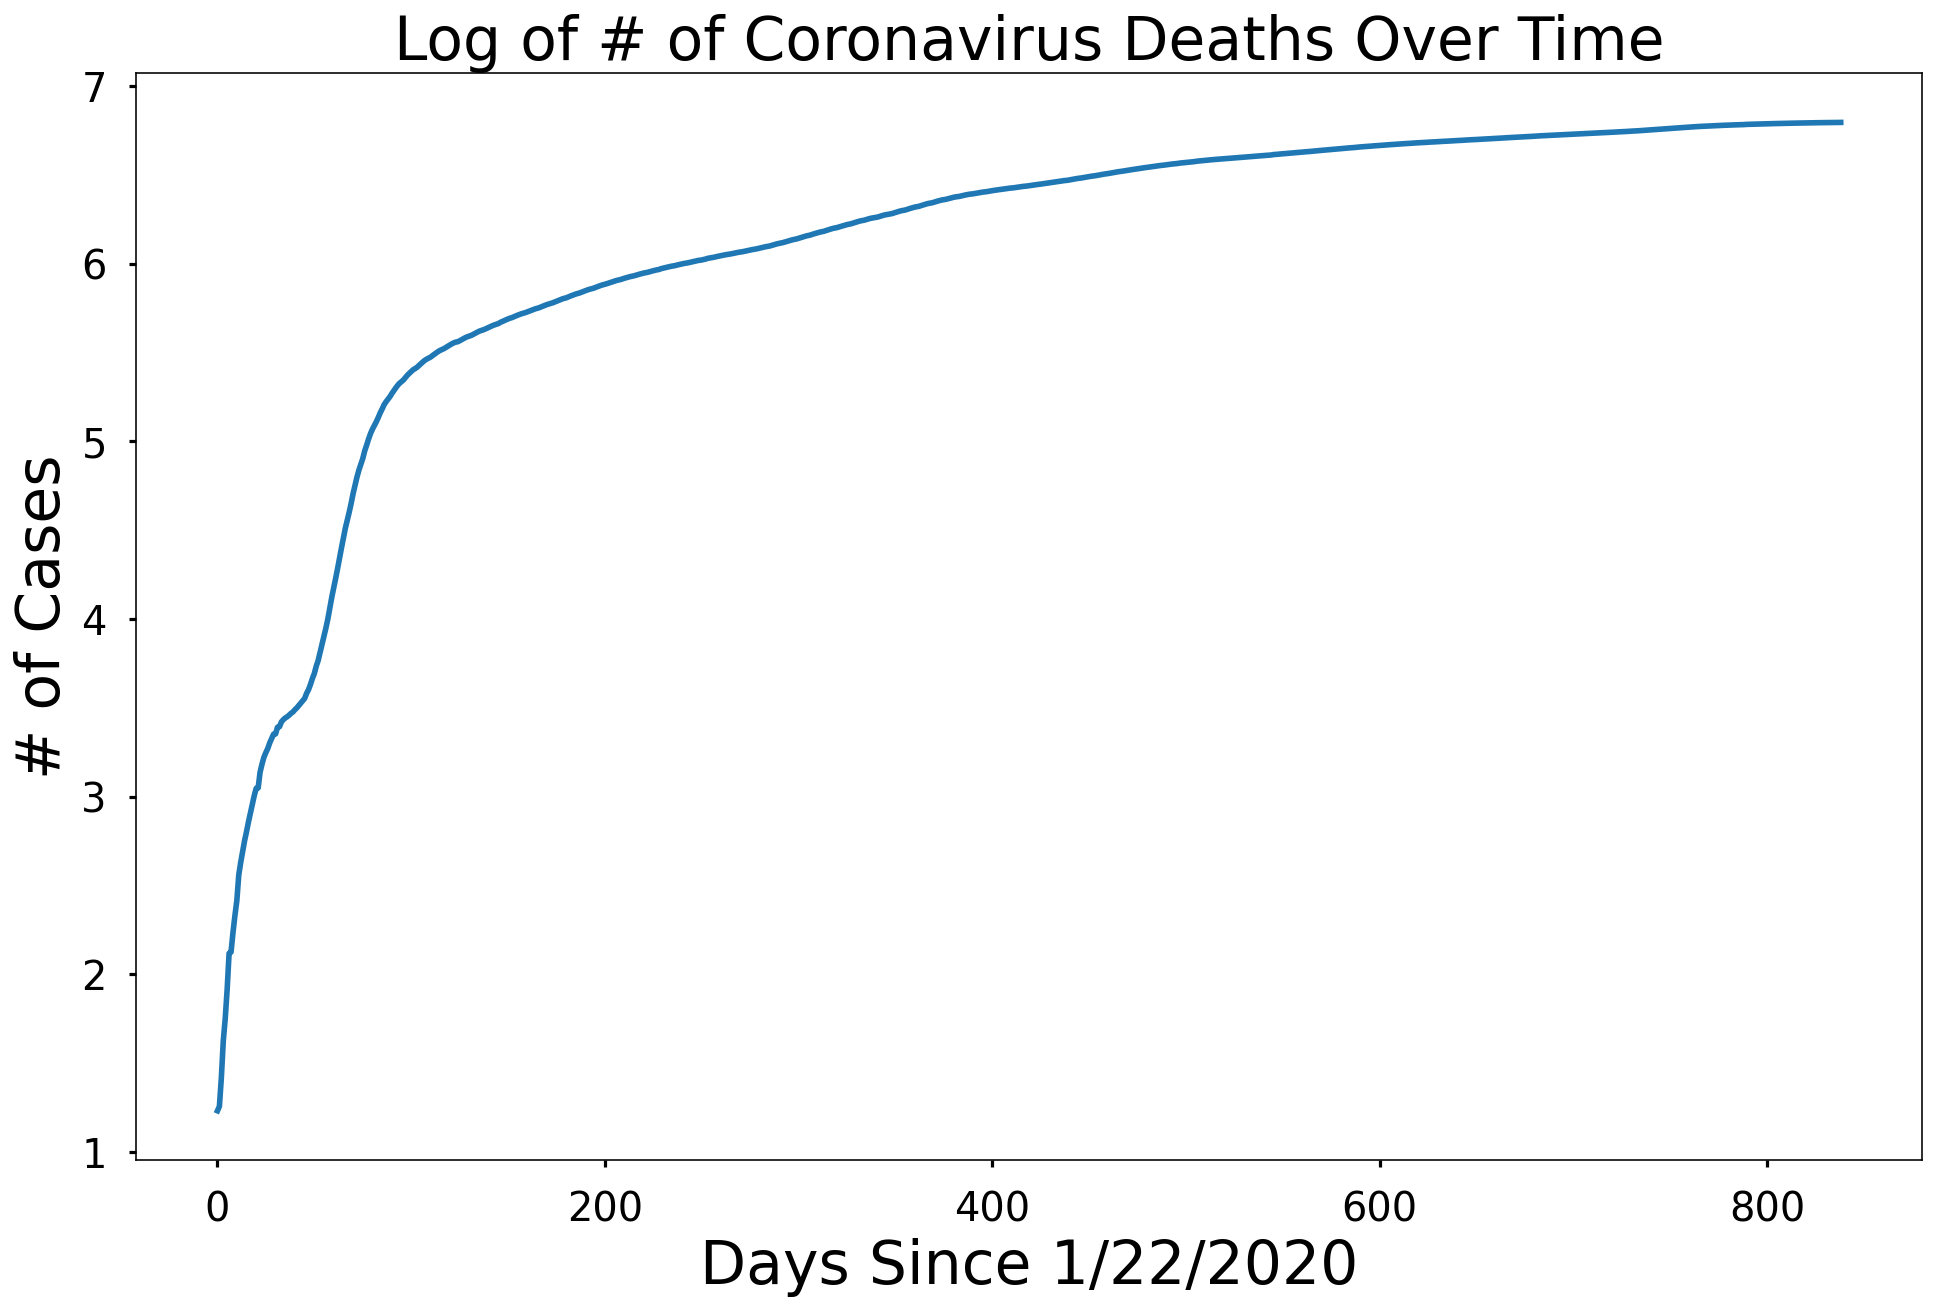

In [31]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, np.log10(total_recovered))
# plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

In [32]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#     plt.figure(figsize=(16, 10))
#     plt.bar(x, y4)
#     plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
#     plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
#     plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
#     plt.xlabel('Days Since 1/22/2020', size=30)
#     plt.ylabel('# of Cases', size=30)
#     plt.xticks(size=20)
#     plt.yticks(size=20)
#     plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)
    

# Country Specific Graphs
Unlike the previous section, we are taking a look at specific countries. This allows us to examine the pandemic at a local level. 
<a id='country_graphs'></a>

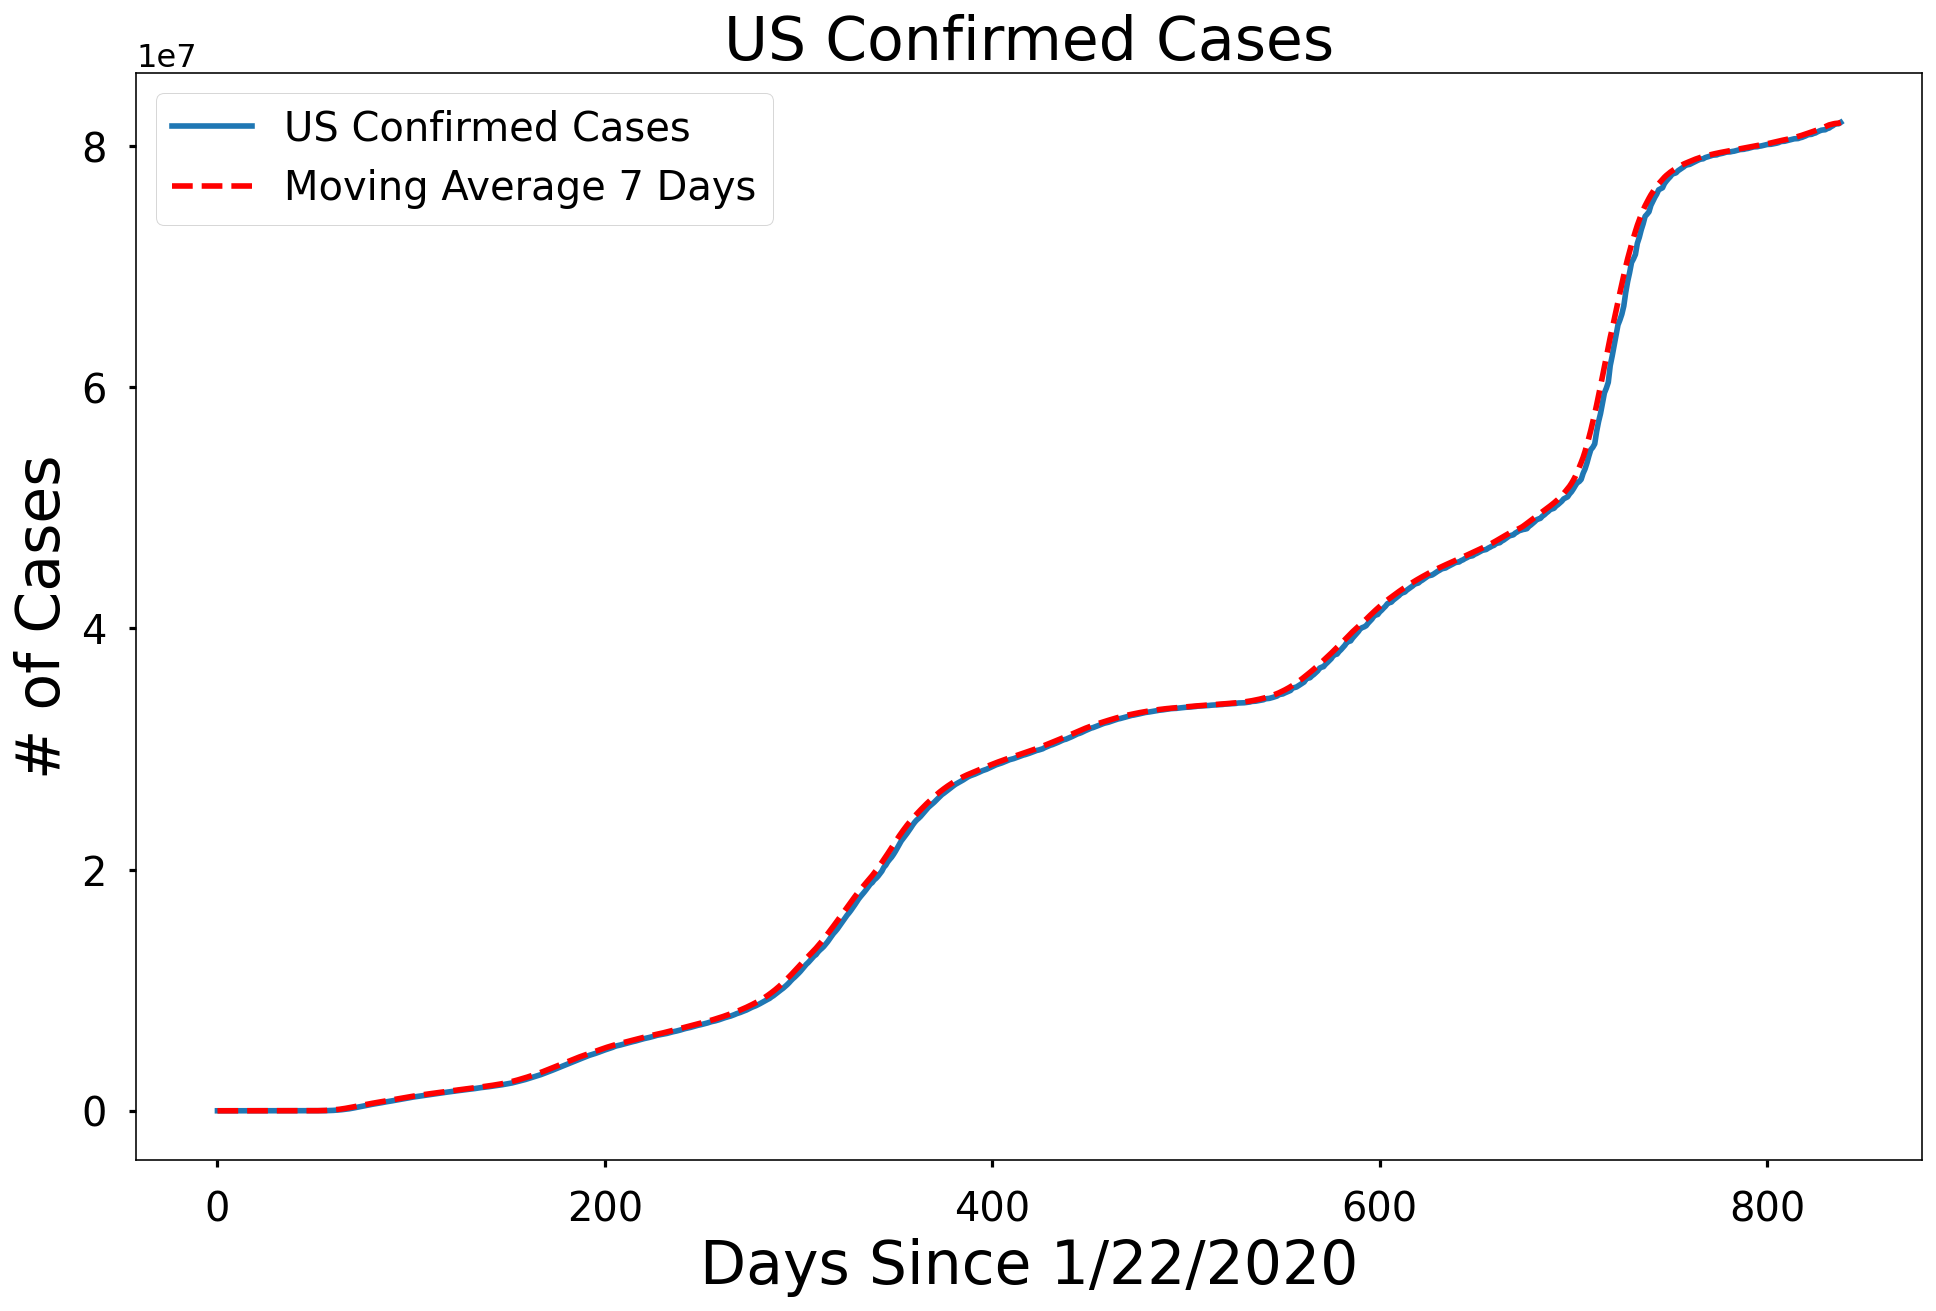

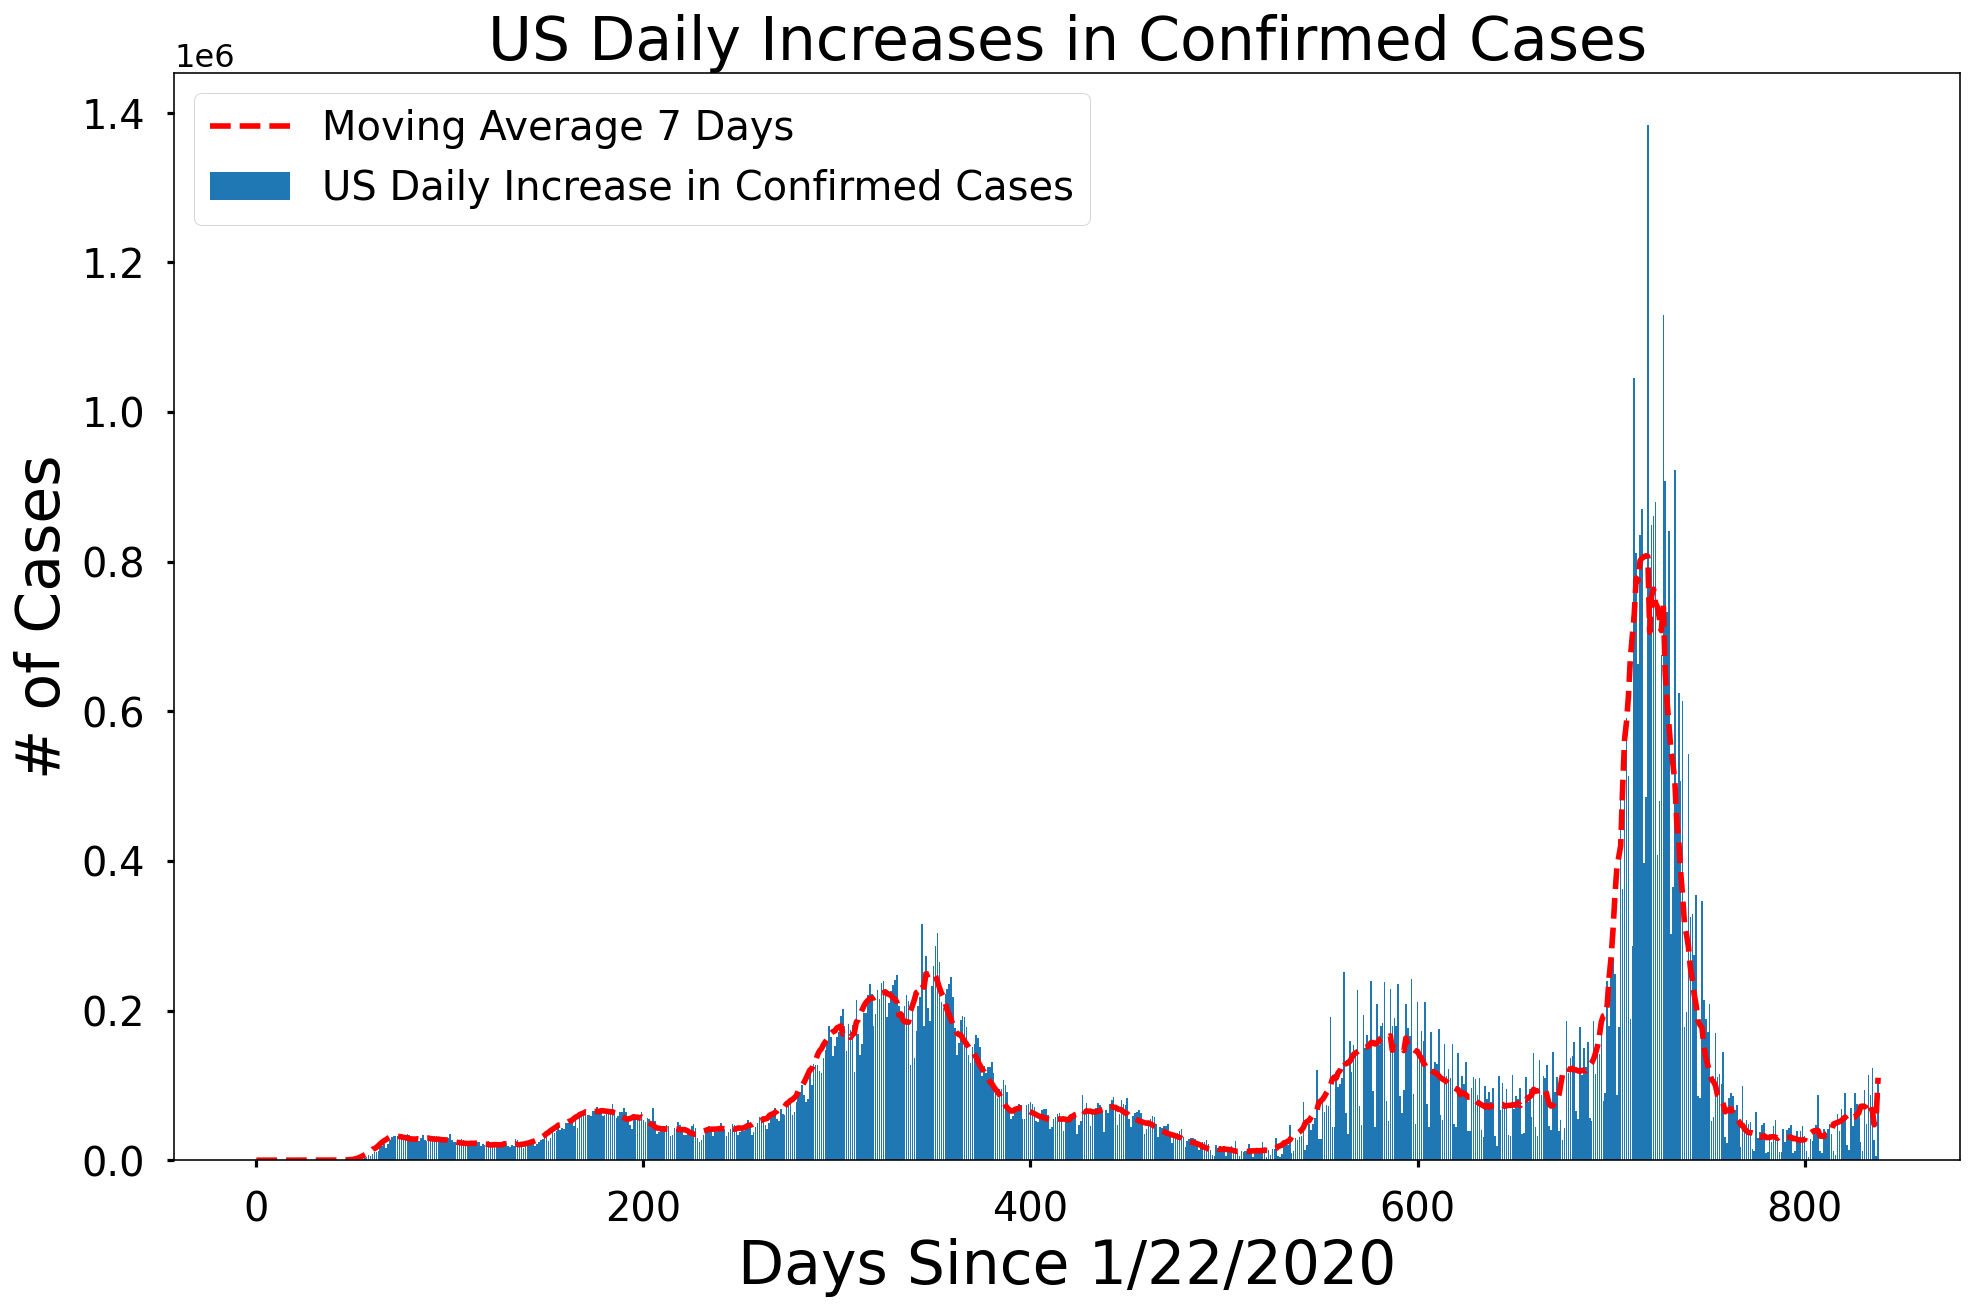

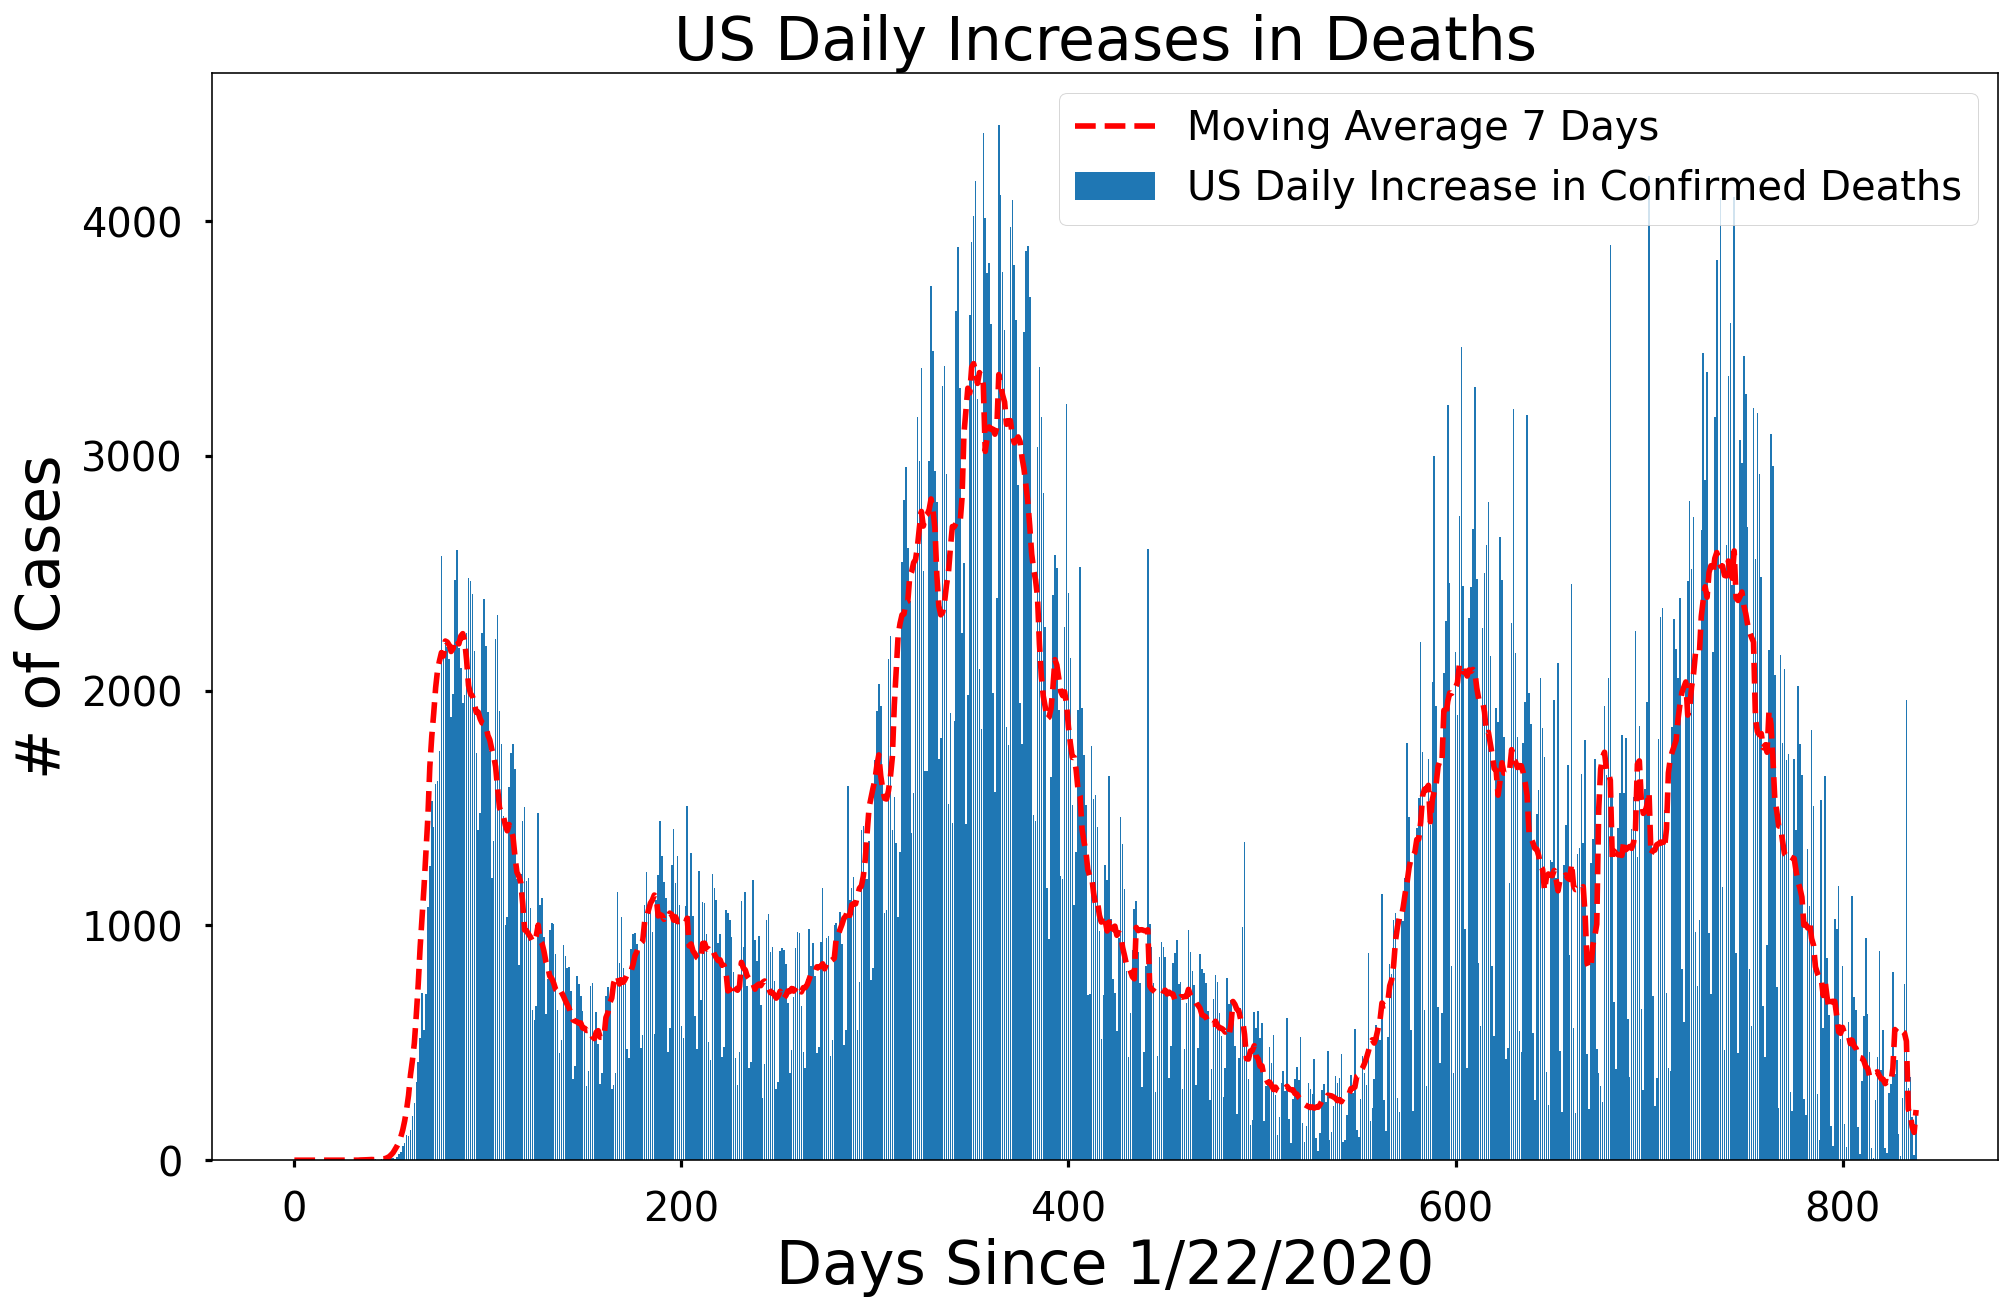

KeyboardInterrupt: 

In [33]:
countries = ['US', 'Russia', 'India', 'Brazil', 'South Africa', 'China', 'Italy',
             'Germany', 'Spain', 'France', 'United Kingdom', 'Peru', 'Mexico', 'Colombia', 'Argentina', 'Saudi Arabia', 'Iran', 'Bangladesh',
            'Pakistan', 'Turkey', 'Philippines', 'Iraq', 'Indonesia', 'Israel', 'Ukraine', 'Ecuador', 'Bolivia', 'Netherlands', 'Belgium', 'Poland', 'Czechia', 'Switzerland',
            'Romania', 'Morocco','Portugal', 'Austria', 'Sweden'] 

for country in countries:
    country_visualizations(country)

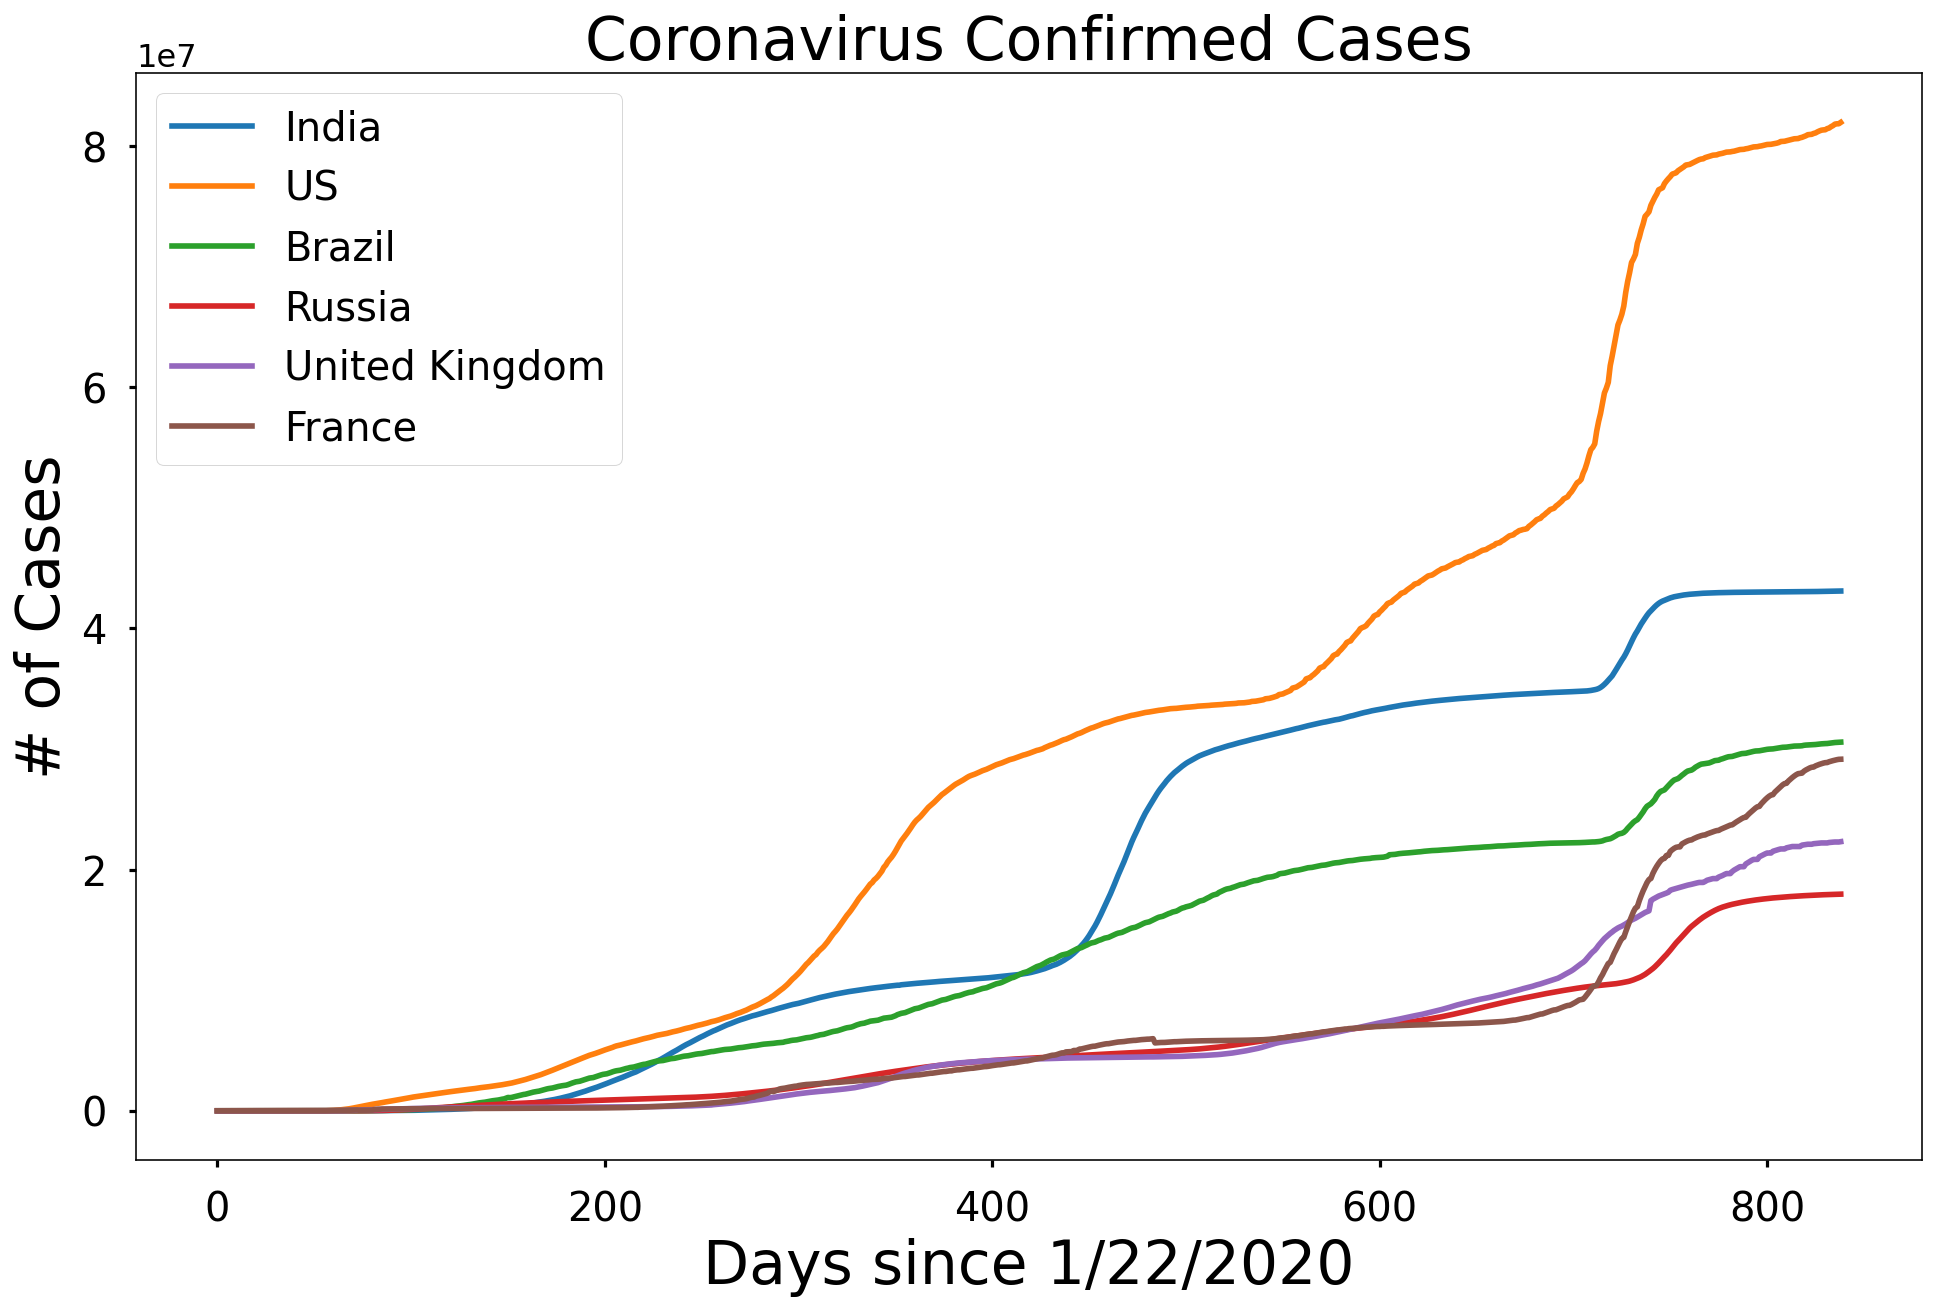

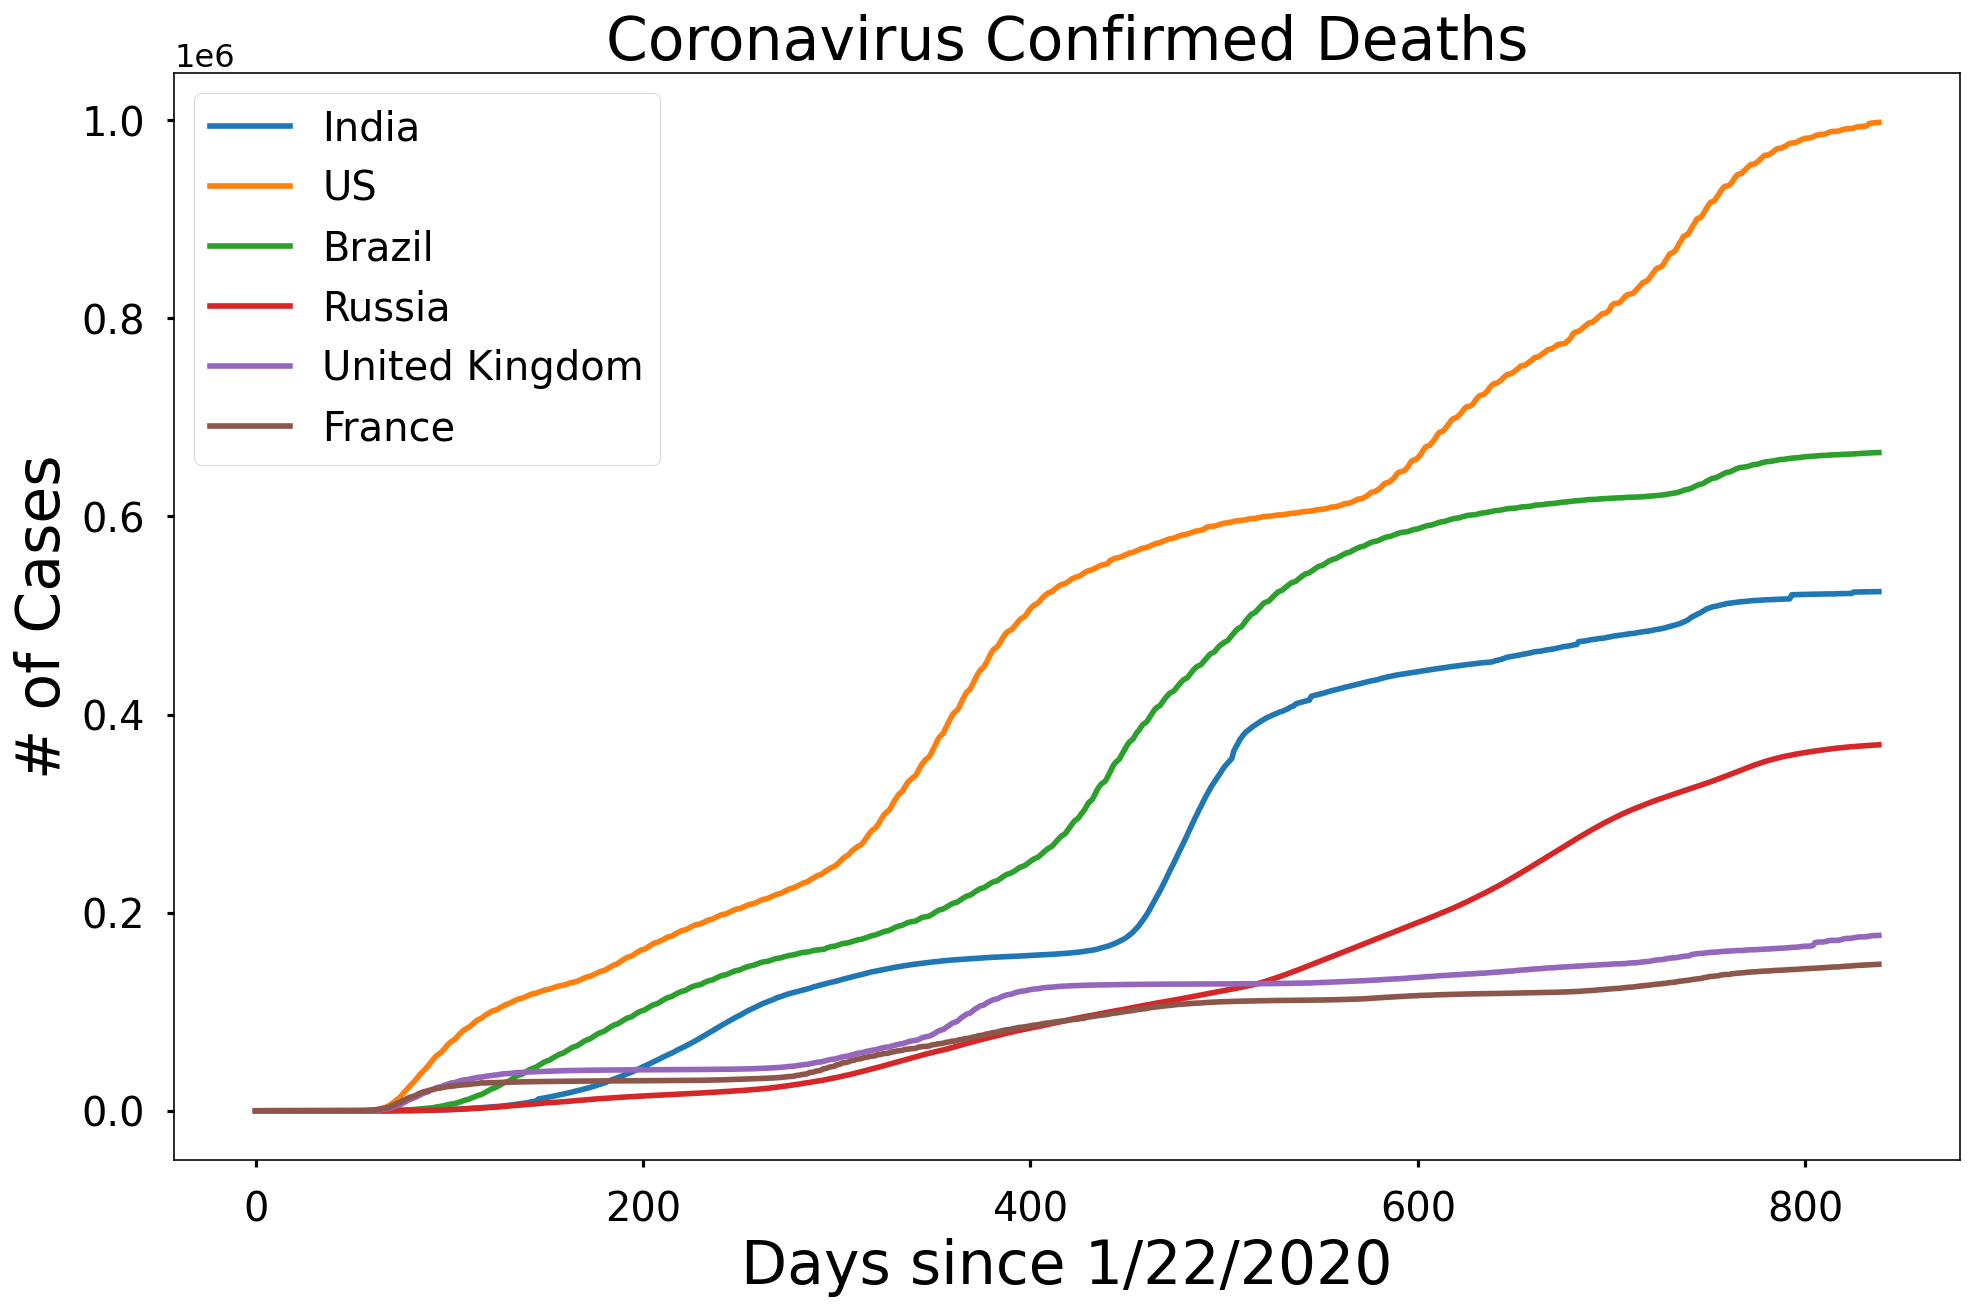

In [ ]:
# Country Comparison
# removed redundant code

compare_countries = ['India', 'US', 'Brazil', 'Russia', 'United Kingdom', 'France'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']

for num in range(2):
    plt.figure(figsize=(16, 10))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Predictions for confirmed coronavirus cases worldwide
These three models predict future covid cases on a global level. 

The prediction models include 
* Support Vector Machine 
* Polynomial Regression 
* Bayesian Ridge Regression 

<a id='prediction'></a>

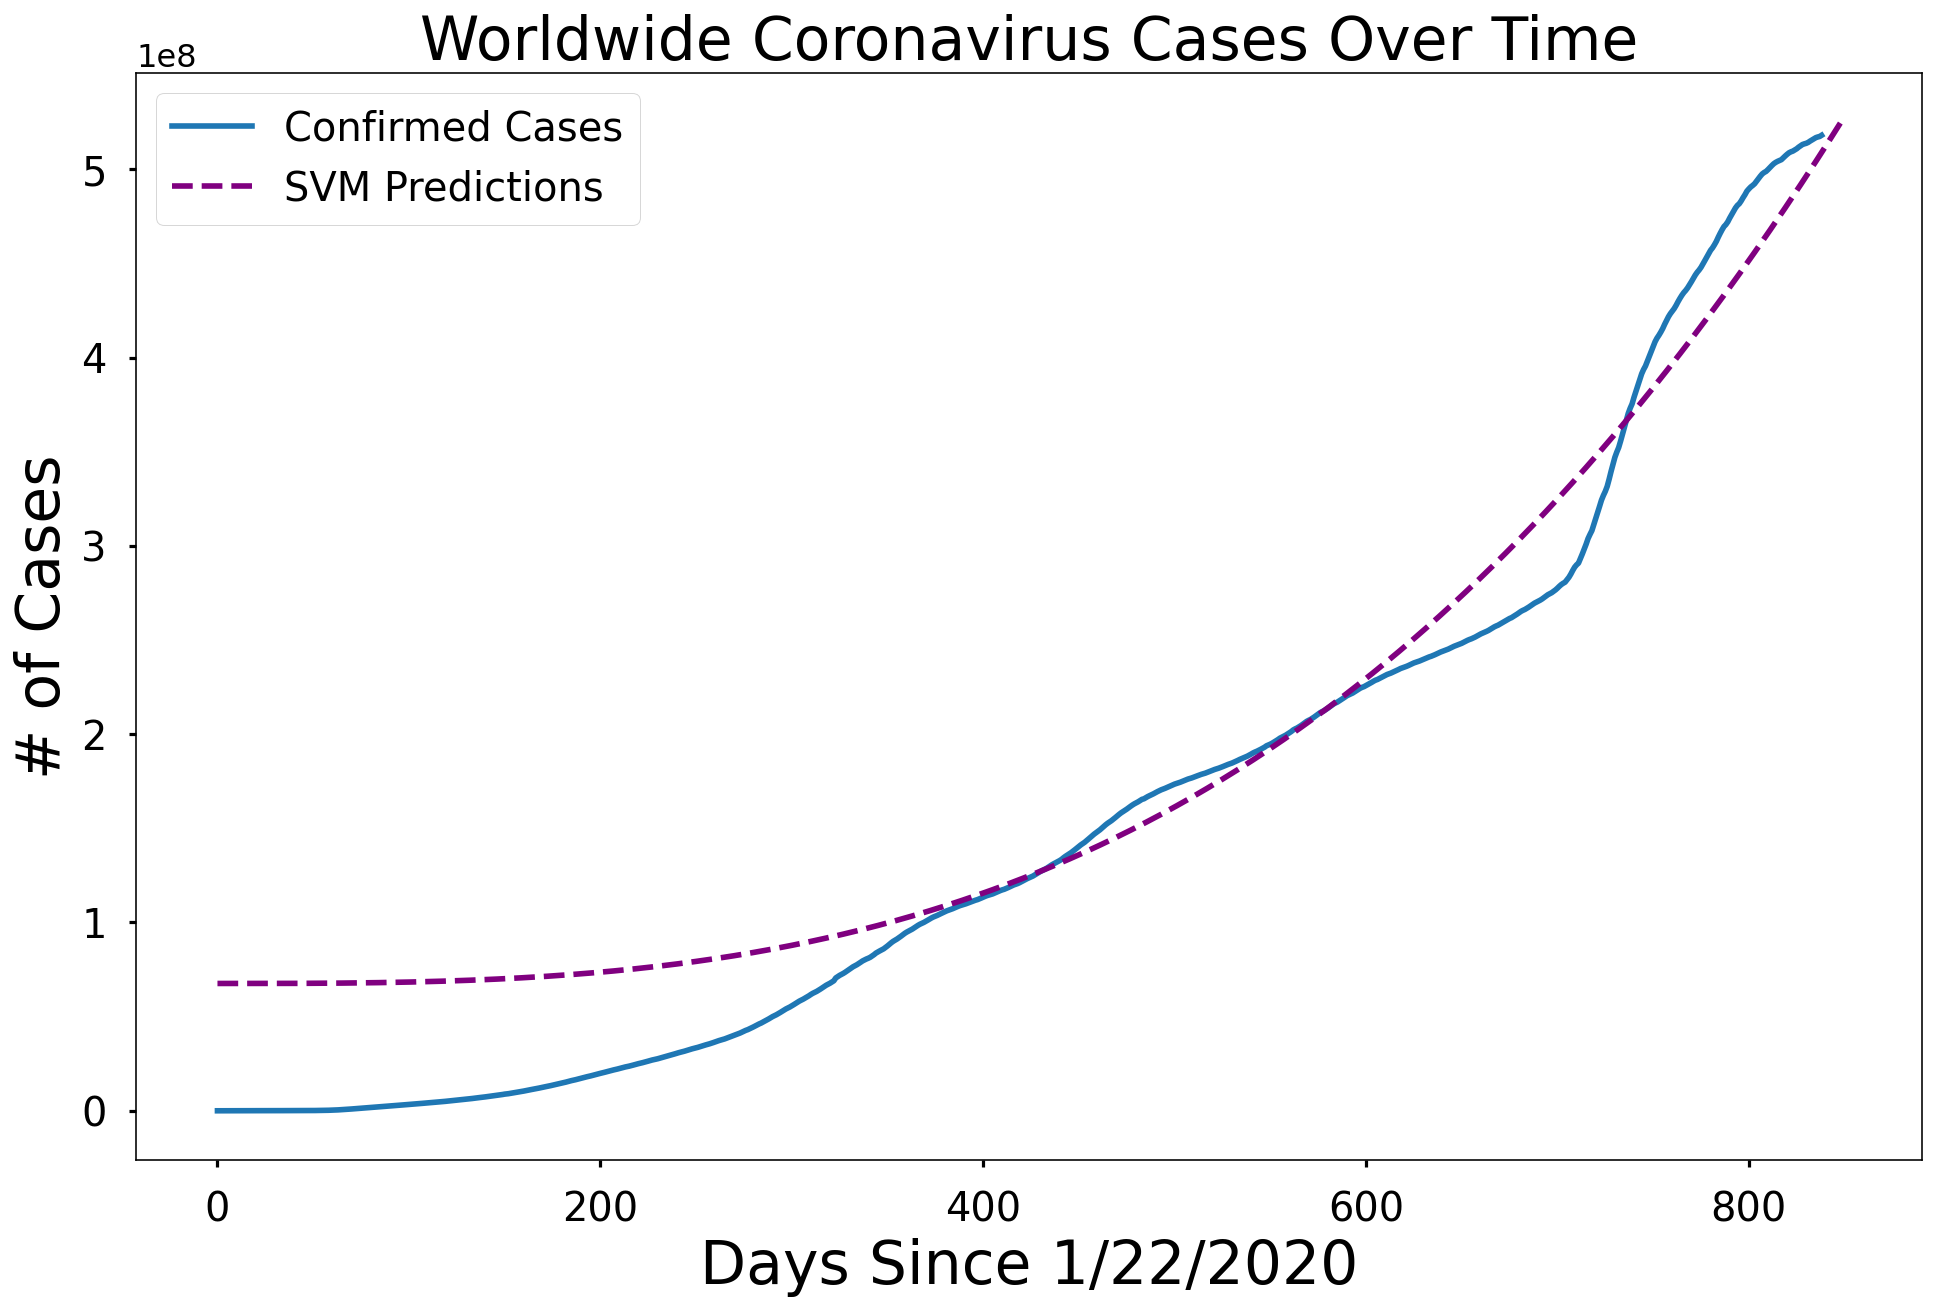

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

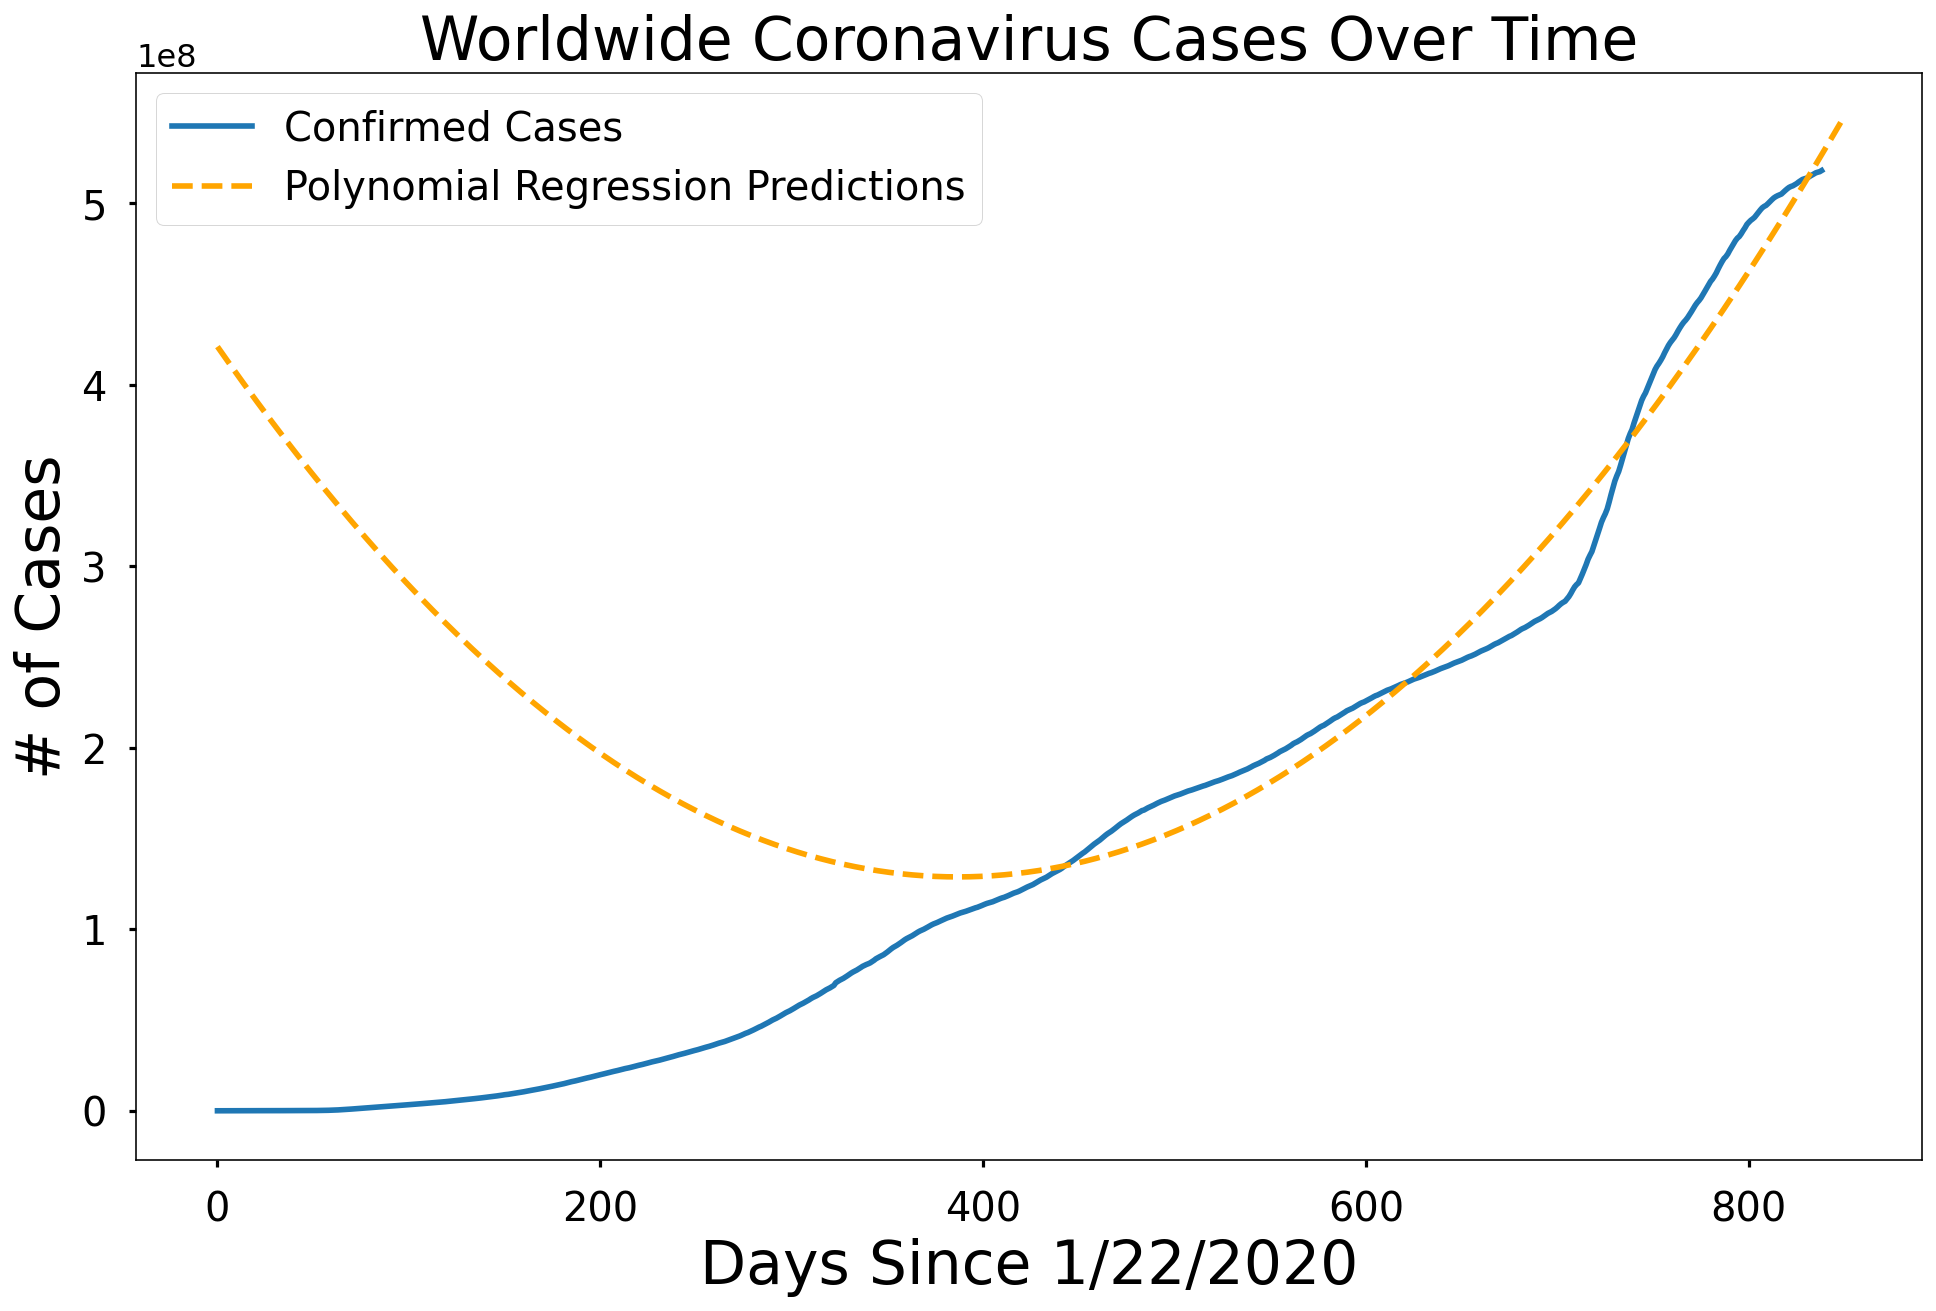

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

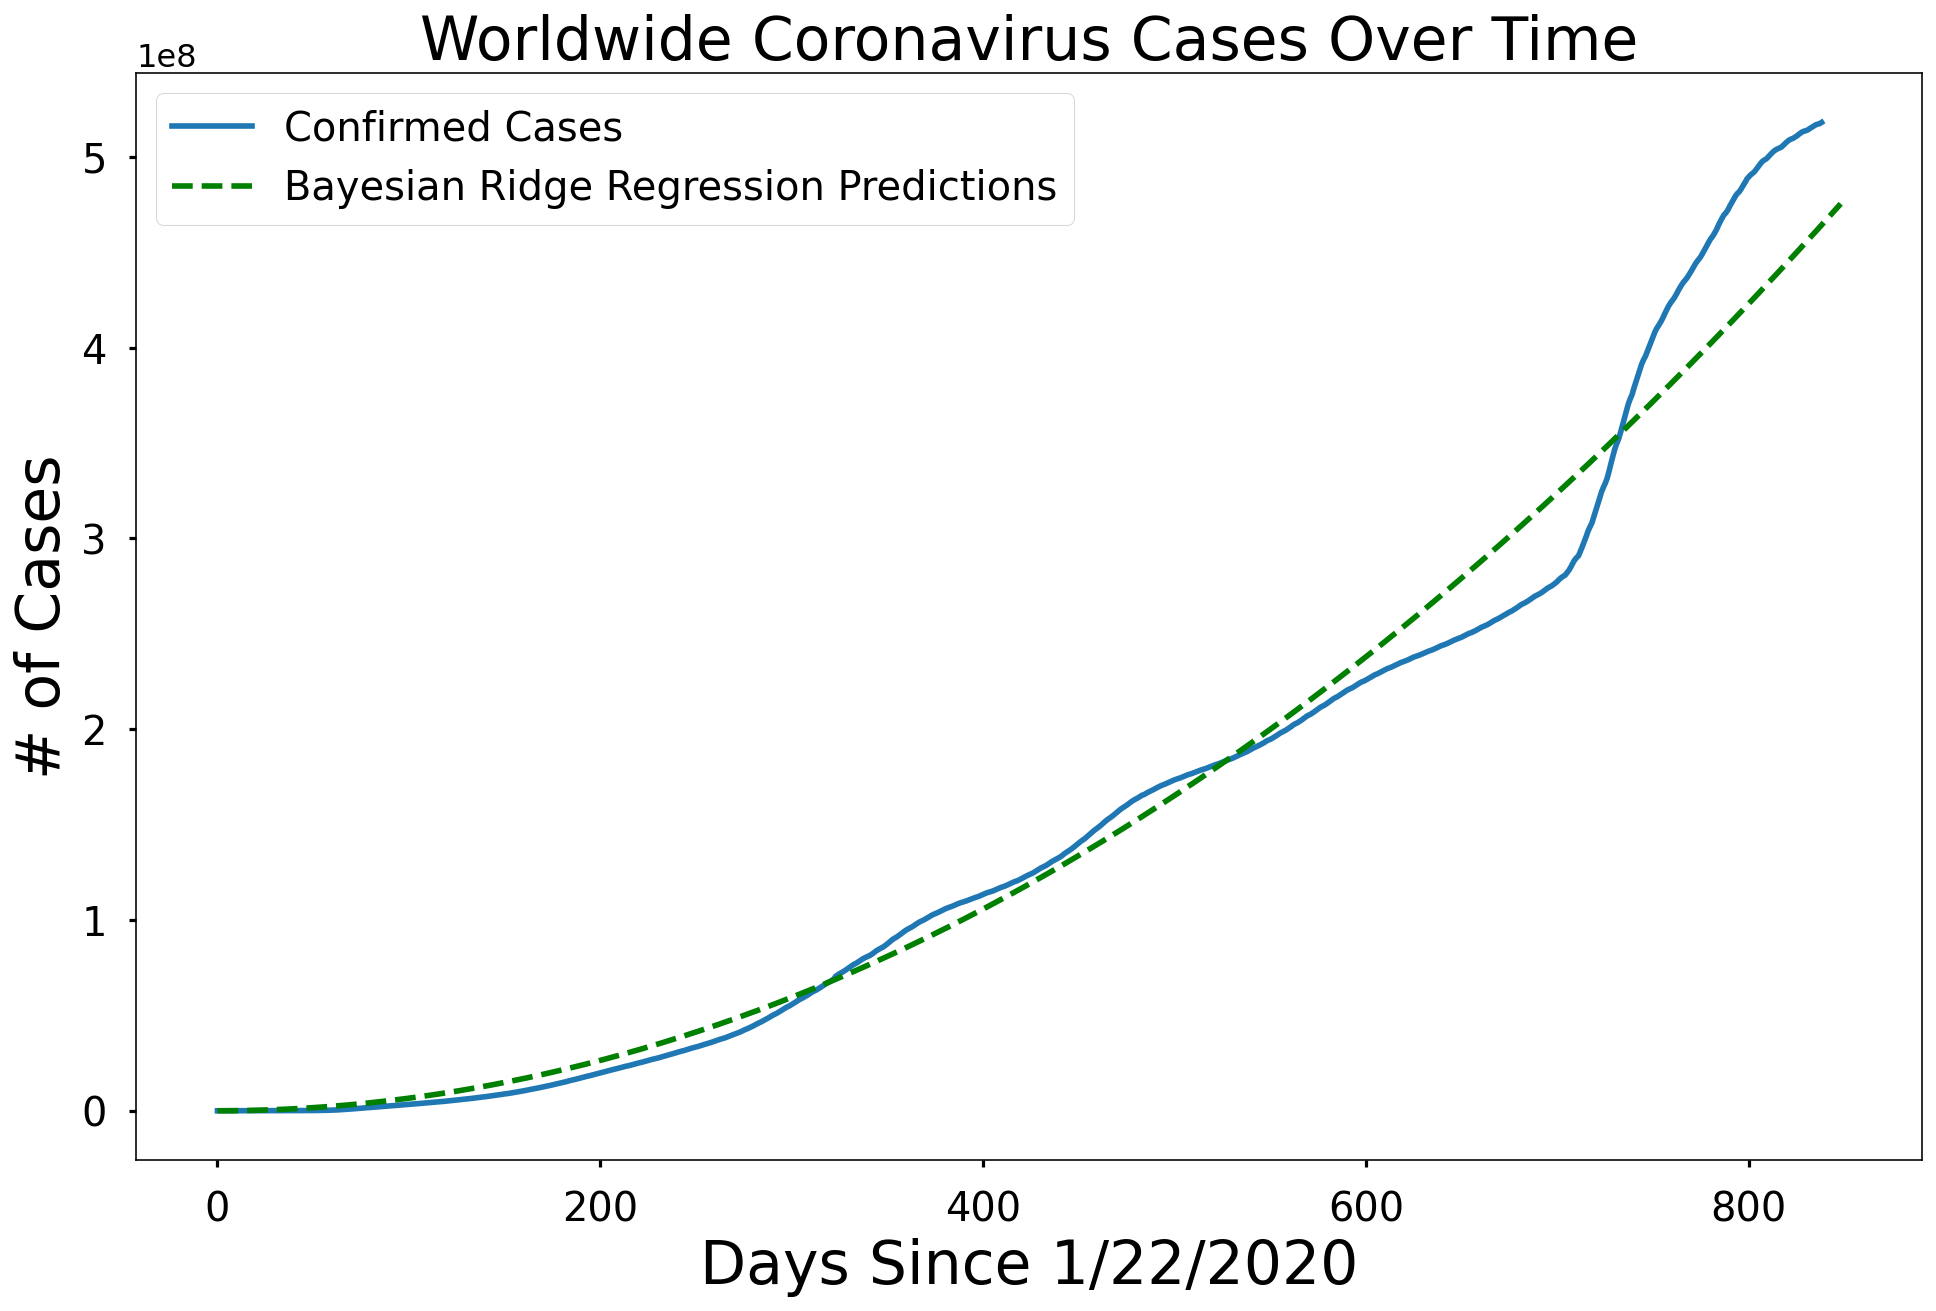

In [ ]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

In [ ]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

Mortality Rate (worldwide) **susceptible to change **

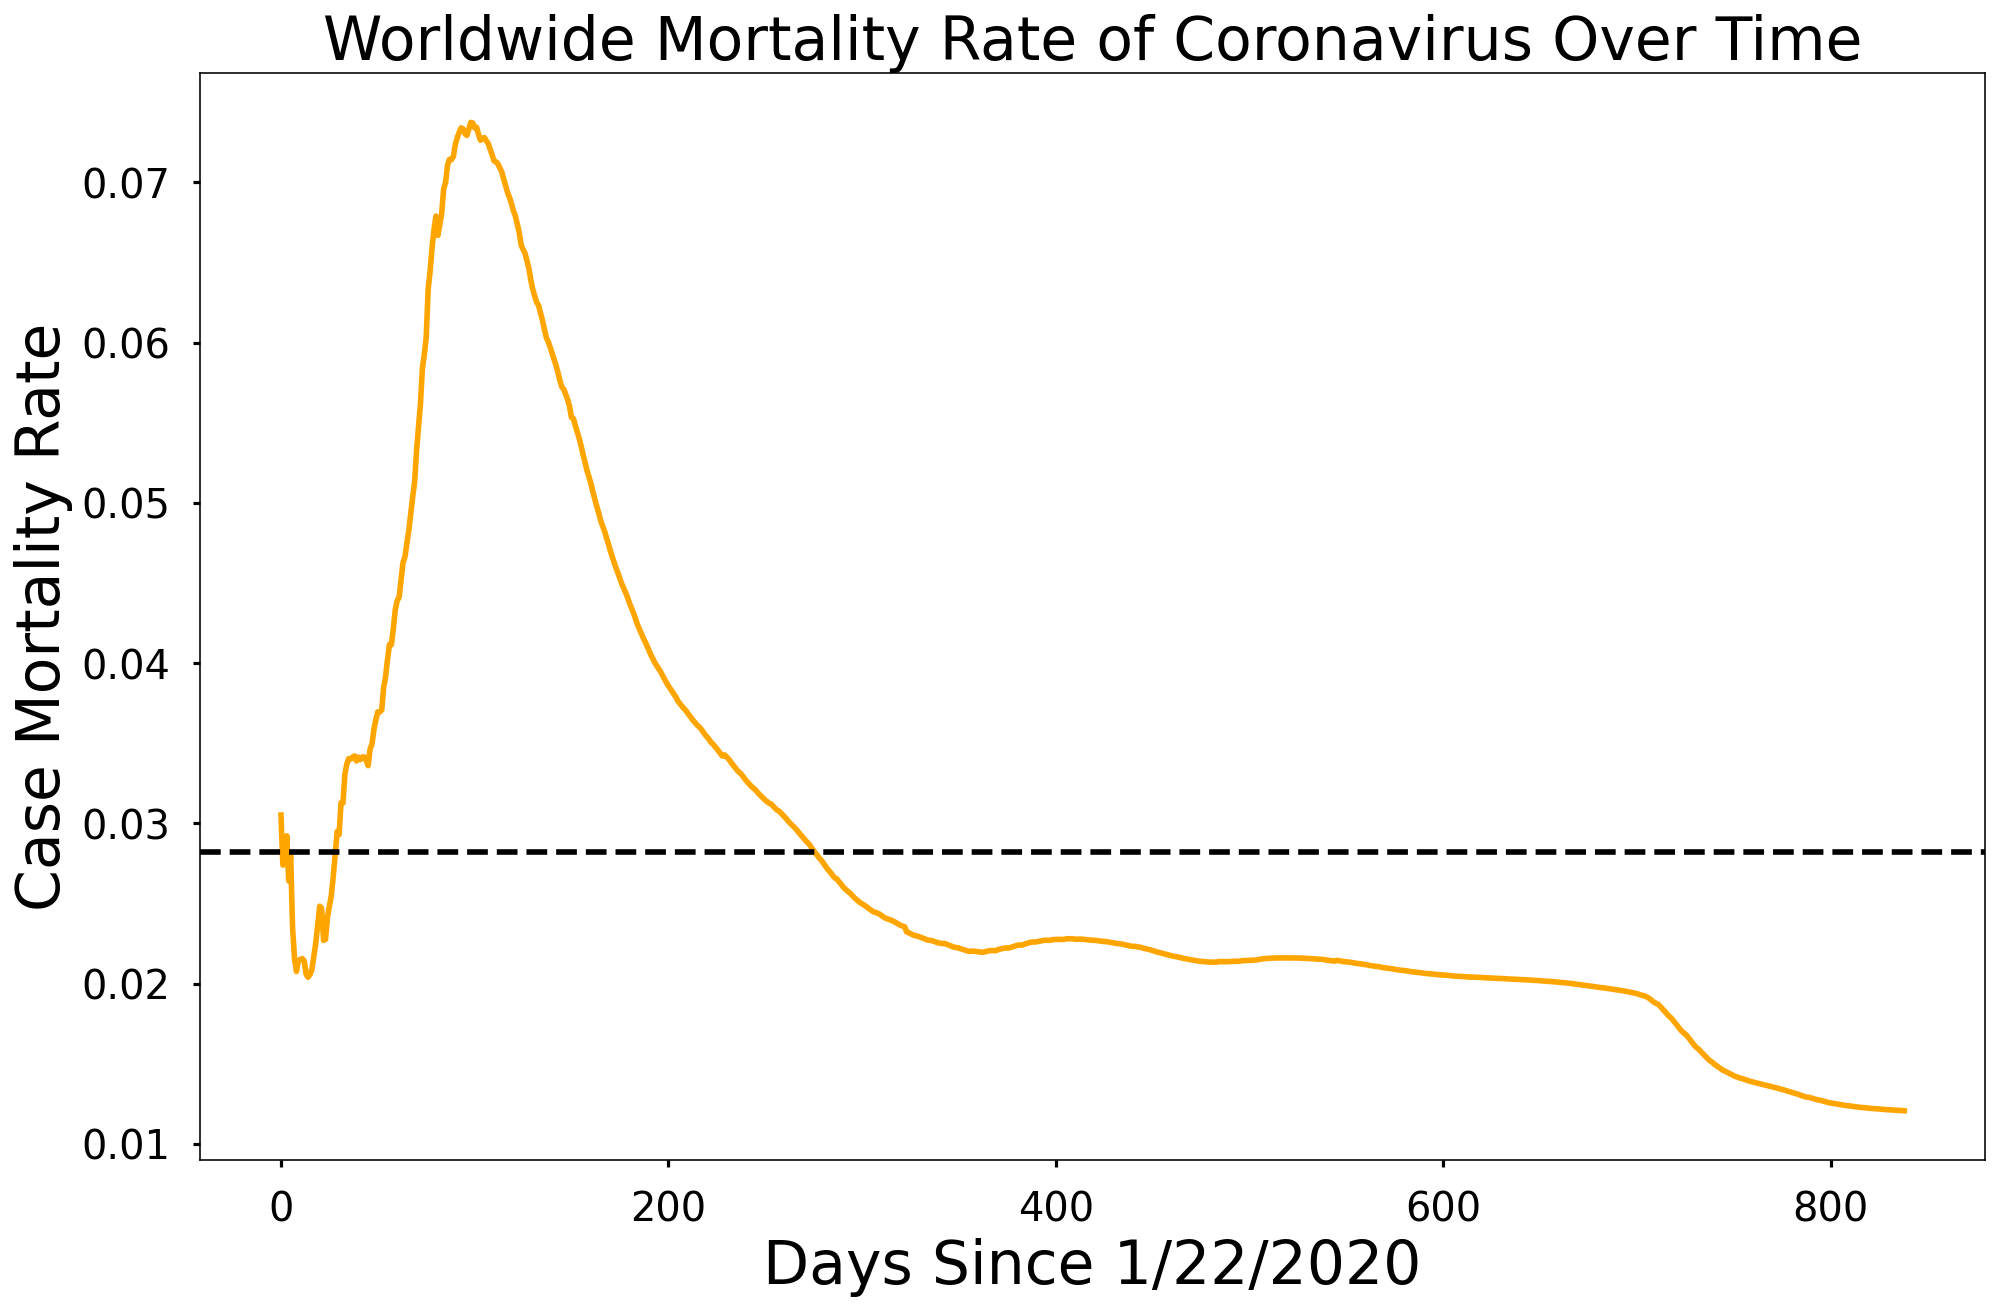

In [ ]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Recovery Rate (worldwide) **suceptible to change **

In [ ]:
# mean_recovery_rate = np.mean(recovery_rate)
# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, recovery_rate, color='blue')
# plt.title('Worldwide Recovery Rate of Coronavirus Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Case Recovery Rate', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

Graphing deaths against recoveries

In [ ]:
# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, total_deaths, color='r')
# plt.plot(adjusted_dates, total_recovered, color='green')
# plt.legend(['death', 'recoveries'], loc='best', fontsize=25)
# plt.title('Worldwide Coronavirus Cases', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

Plotting the number of deaths against the number of recoveries. 

In [ ]:
# plt.figure(figsize=(16, 10))
# plt.plot(total_recovered, total_deaths)
# plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
# plt.xlabel('# of Coronavirus Recoveries', size=30)
# plt.ylabel('# of Coronavirus Deaths', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

Getting information about **countries/regions** that have confirmed coronavirus cases

In [ ]:
latest_data

FIPS Admin2 Province_State        Country_Region          Last_Update  \
0      NaN    NaN            NaN           Afghanistan  2022-04-10 04:20:52   
1      NaN    NaN            NaN               Albania  2022-04-10 04:20:52   
2      NaN    NaN            NaN               Algeria  2022-04-10 04:20:52   
3      NaN    NaN            NaN               Andorra  2022-04-10 04:20:52   
4      NaN    NaN            NaN                Angola  2022-04-10 04:20:52   
...    ...    ...            ...                   ...                  ...   
4005   NaN    NaN            NaN    West Bank and Gaza  2022-04-10 04:20:52   
4006   NaN    NaN            NaN  Winter Olympics 2022  2022-04-10 04:20:52   
4007   NaN    NaN            NaN                 Yemen  2022-04-10 04:20:52   
4008   NaN    NaN            NaN                Zambia  2022-04-10 04:20:52   
4009   NaN    NaN            NaN              Zimbabwe  2022-04-10 04:20:52   

            Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0     33.939110   67.709953     177974    7671        NaN     NaN   
1     41.153300   20.168300     274191    3492        NaN     NaN   
2     28.033900    1.659600     265720    6874        NaN     NaN   
3     42.506300    1.521800      40328     153        NaN     NaN   
4    -11.202700   17.873900      99194    1900        NaN     NaN   
...         ...         ...        ...     ...        ...     ...   
4005  31.952200   35.233200     656287    5655        NaN     NaN   
4006  39.904200  116.407400        535       0        NaN     NaN   
4007  15.552727   48.516388      11813    2147        NaN     NaN   
4008 -13.133897   27.849332     317483    3967        NaN     NaN   
4009 -19.015438   29.154857     246925    5457        NaN     NaN   

              Combined_Key  Incident_Rate  Case_Fatality_Ratio  
0              Afghanistan     457.183624             4.310180  
1                  Albania    9527.799013             1.273565  
2                  Algeria     605.960501             2.586934  
3                  Andorra   52194.395910             0.379389  
4                   Angola     301.810963             1.915438  
...                    ...            ...                  ...  
4005    West Bank and Gaza   12864.800675             0.861666  
4006  Winter Olympics 2022            NaN             0.000000  
4007                 Yemen      39.606426            18.174892  
4008                Zambia    1726.956918             1.249516  
4009              Zimbabwe    1661.348401             2.209983  

[4010 rows x 14 columns]

In [ ]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [ ]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
# country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
#     country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
#     country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

# Data table
<a id='data_table'></a>
This shows covid data for several countries. The table includes the number of confirmed cases, deaths, incidence rate, and mortality rate. 

In [ ]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': [format(int(i), ',d') for i in country_confirmed_cases],
                          'Number of Deaths': [format(int(i), ',d') for i in country_death_cases], 
                          'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

In [ ]:
unique_provinces =  list(latest_data['Province_State'].unique())

Getting the latest information about **provinces/states** that have confirmed coronavirus cases

In [ ]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
# province_recovery_cases = []
# province_active = [] 
province_incidence_rate = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
#     province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
#     province_active.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Incident_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [ ]:
# nan_indices = [] 

# # handle nan if there is any, it is usually a float: float('nan')

# for i in range(len(unique_provinces)):
#     if type(unique_provinces[i]) == float:
#         nan_indices.append(i)

# unique_provinces = list(unique_provinces)
# province_confirmed_cases = list(province_confirmed_cases)

# for i in nan_indices:
#     unique_provinces.pop(i)
#     province_confirmed_cases.pop(i)

In [ ]:
# number of cases per province/state/city top 100 
province_limit = 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': [format(int(i), ',d') for i in province_confirmed_cases[:province_limit]],
                          'Number of Deaths': [format(int(i), ',d') for i in province_death_cases[:province_limit]], 
                        'Incidence Rate' : province_incidence_rate[:province_limit], 'Mortality Rate': province_mortality_rate[:province_limit]})
# number of cases per country/region

province_df.style.background_gradient(cmap='Oranges')

In [ ]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    # state_recovery_cases = []
#     state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
    #     state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
#         state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

Data table for **India**

In [ ]:
india_table = country_table('India')
india_table.style.background_gradient(cmap='Oranges')

Data table for the **United States**

In [ ]:
us_table = country_table('US')
us_table.style.background_gradient(cmap='Oranges')

Data table for **Brazil**

In [ ]:
brazil_table = country_table('Brazil')
brazil_table.style.background_gradient(cmap='Oranges')

Data table for **Russia**

In [ ]:
russia_table = country_table('Russia')
russia_table.style.background_gradient(cmap='Oranges')

Data table for **United Kingdom**

In [ ]:
uk_table = country_table('United Kingdom')
uk_table.style.background_gradient(cmap='Oranges')

Data table for **France**

In [ ]:
france_table = country_table('France')
france_table.style.background_gradient(cmap='Oranges')

Data table for **Italy**

In [ ]:
italy_table = country_table('Italy')
italy_table.style.background_gradient(cmap='Oranges')

Data table for **Spain**

In [ ]:
spain_table = country_table('Spain')
spain_table.style.background_gradient(cmap='Oranges')

Data table for **Germany**

In [ ]:
germany_table = country_table('Germany')
germany_table.style.background_gradient(cmap='Oranges')

Data table for **the Netherlands**

In [ ]:
netherlands_table = country_table('Netherlands')
netherlands_table.style.background_gradient(cmap='Oranges')

Data table for **China**

In [ ]:
china_table = country_table('China')
china_table.style.background_gradient(cmap='Oranges')

Data table for **Colombia**

In [ ]:
colombia_table = country_table('Colombia')
colombia_table.style.background_gradient(cmap='Oranges')

Data table for **Mexico**

In [ ]:
mexico_table = country_table('Mexico')
mexico_table.style.background_gradient(cmap='Oranges')

<a id='bar_charts'></a>
# Bar Chart Visualizations for COVID-19
This offers us some insights for how different countries/regions compare in terms of covid cases.

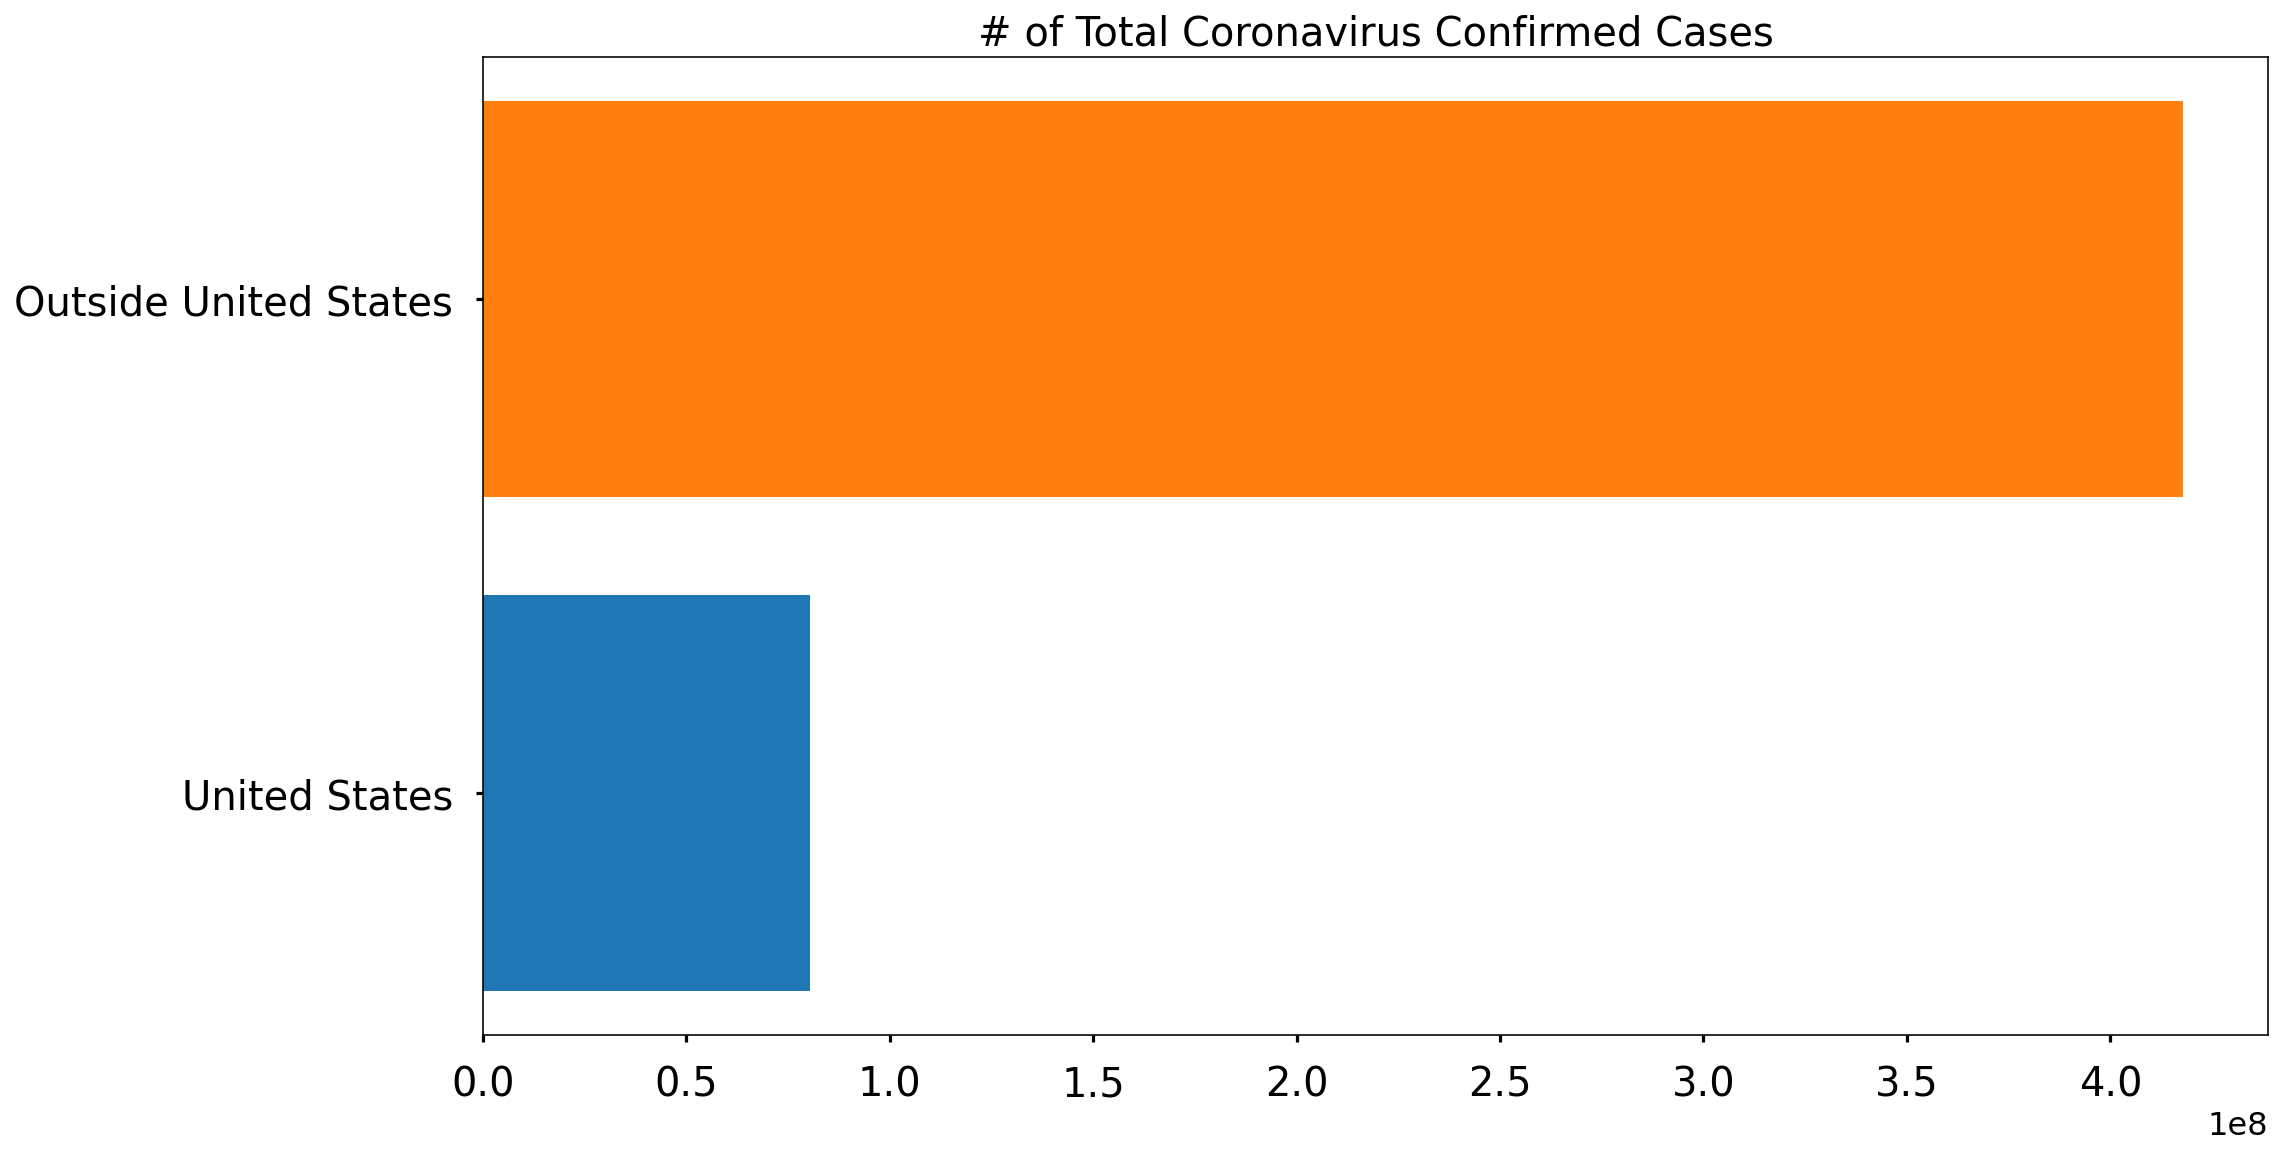

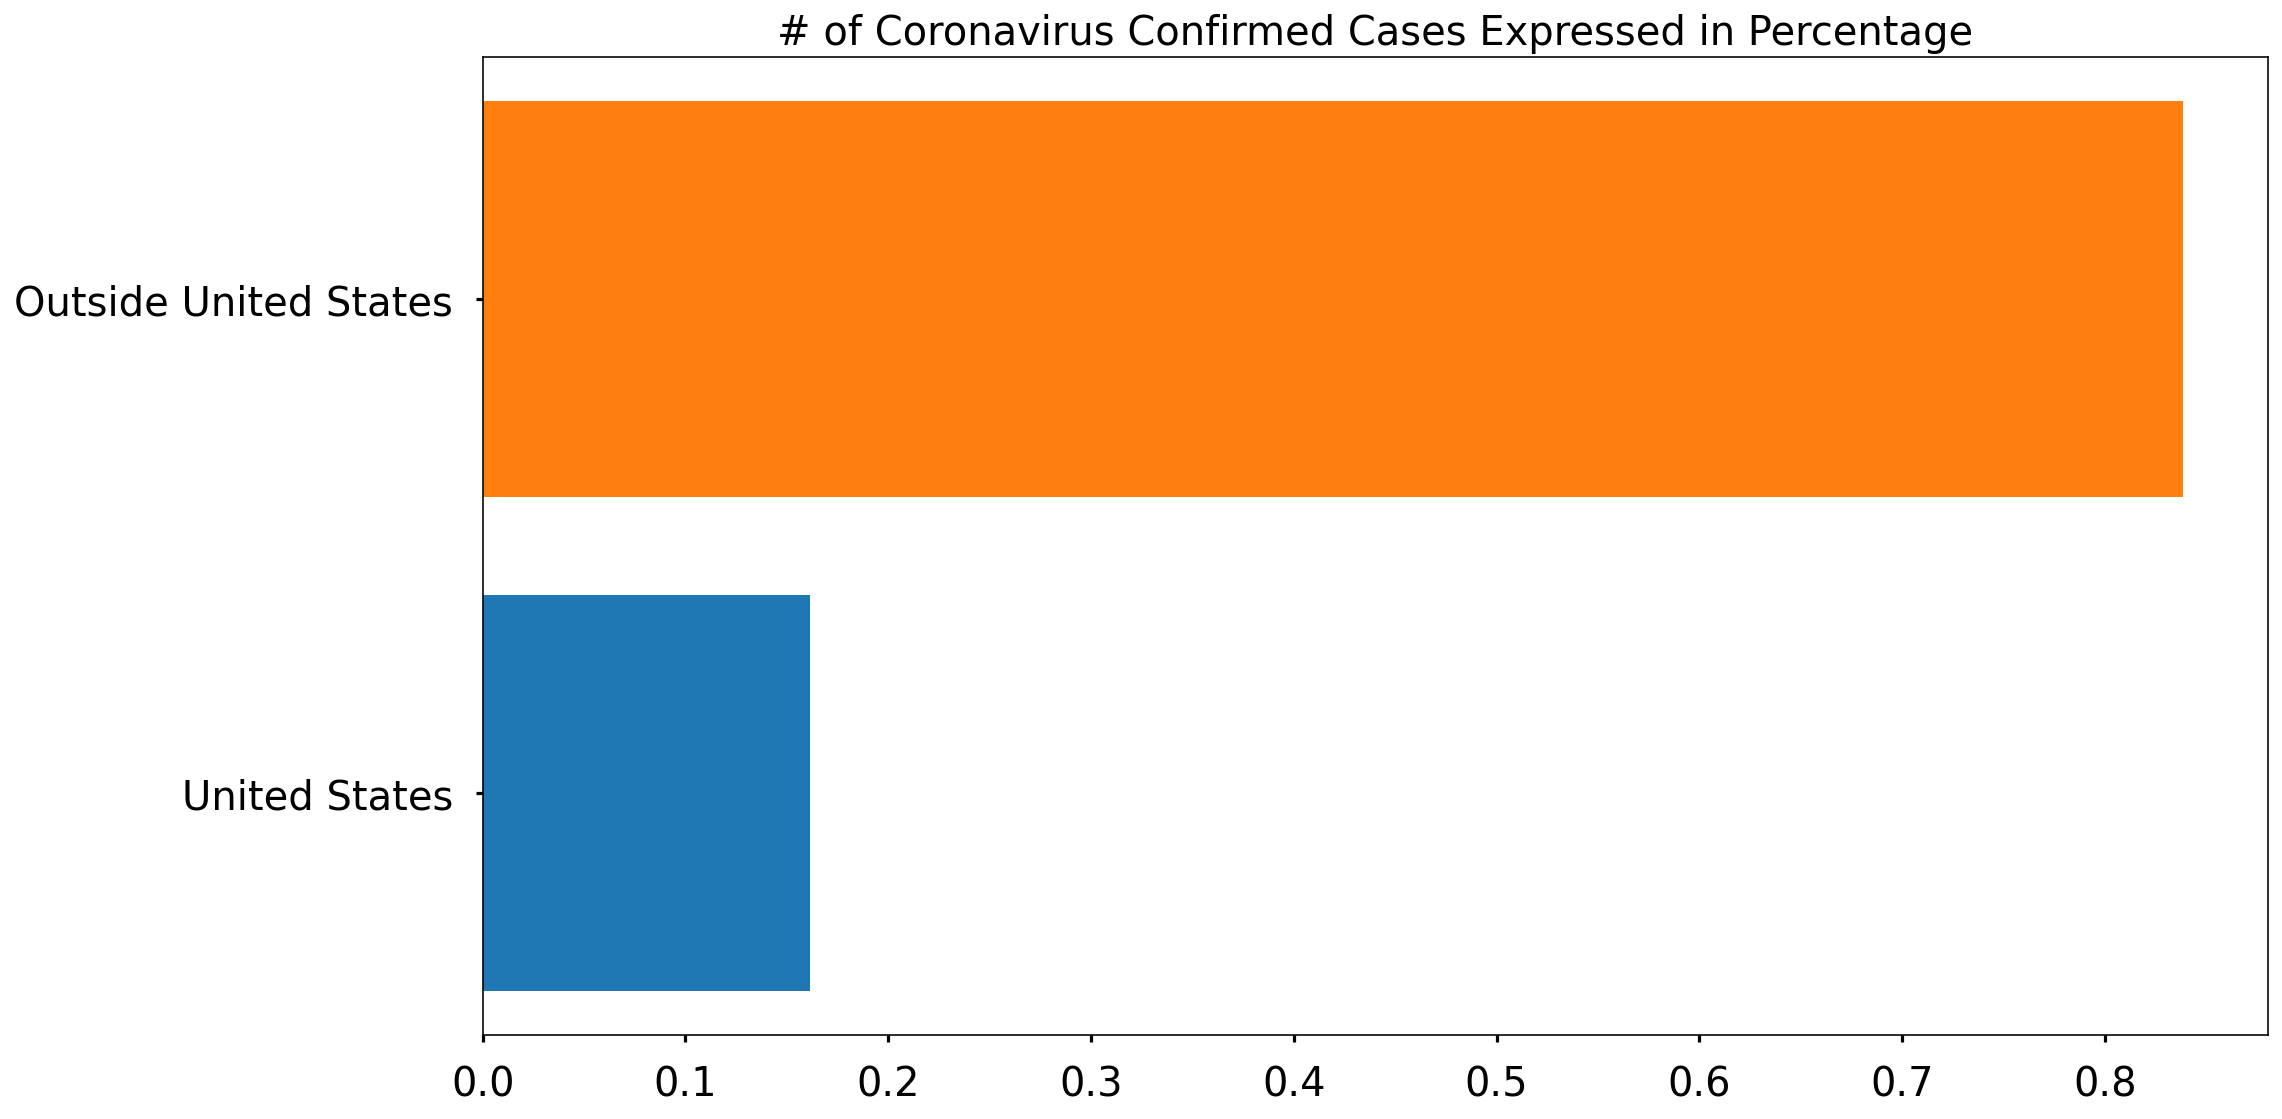

In [ ]:
total_world_cases = np.sum(country_confirmed_cases)
us_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_us_confirmed = total_world_cases - us_confirmed

plt.figure(figsize=(16, 9))
plt.barh('United States', us_confirmed)
plt.barh('Outside United States', outside_us_confirmed)
plt.title('# of Total Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


plt.figure(figsize=(16, 9))
plt.barh('United States', us_confirmed/total_world_cases)
plt.barh('Outside United States', outside_us_confirmed/total_world_cases)
plt.title('# of Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print('Outside United States {} cases ({}%):'.format(outside_us_confirmed, np.round((outside_us_confirmed/total_world_cases)*100, 1)))
print('United States {} cases ({}%)'.format(us_confirmed, np.round((us_confirmed/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside United States 417910441 cases (83.9%):
United States 80402150 cases (16.1%)
Total: 498312591 cases


In [ ]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [ ]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 12))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(19, 18))
    plt.barh(x, y)
    plt.title(title, size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()

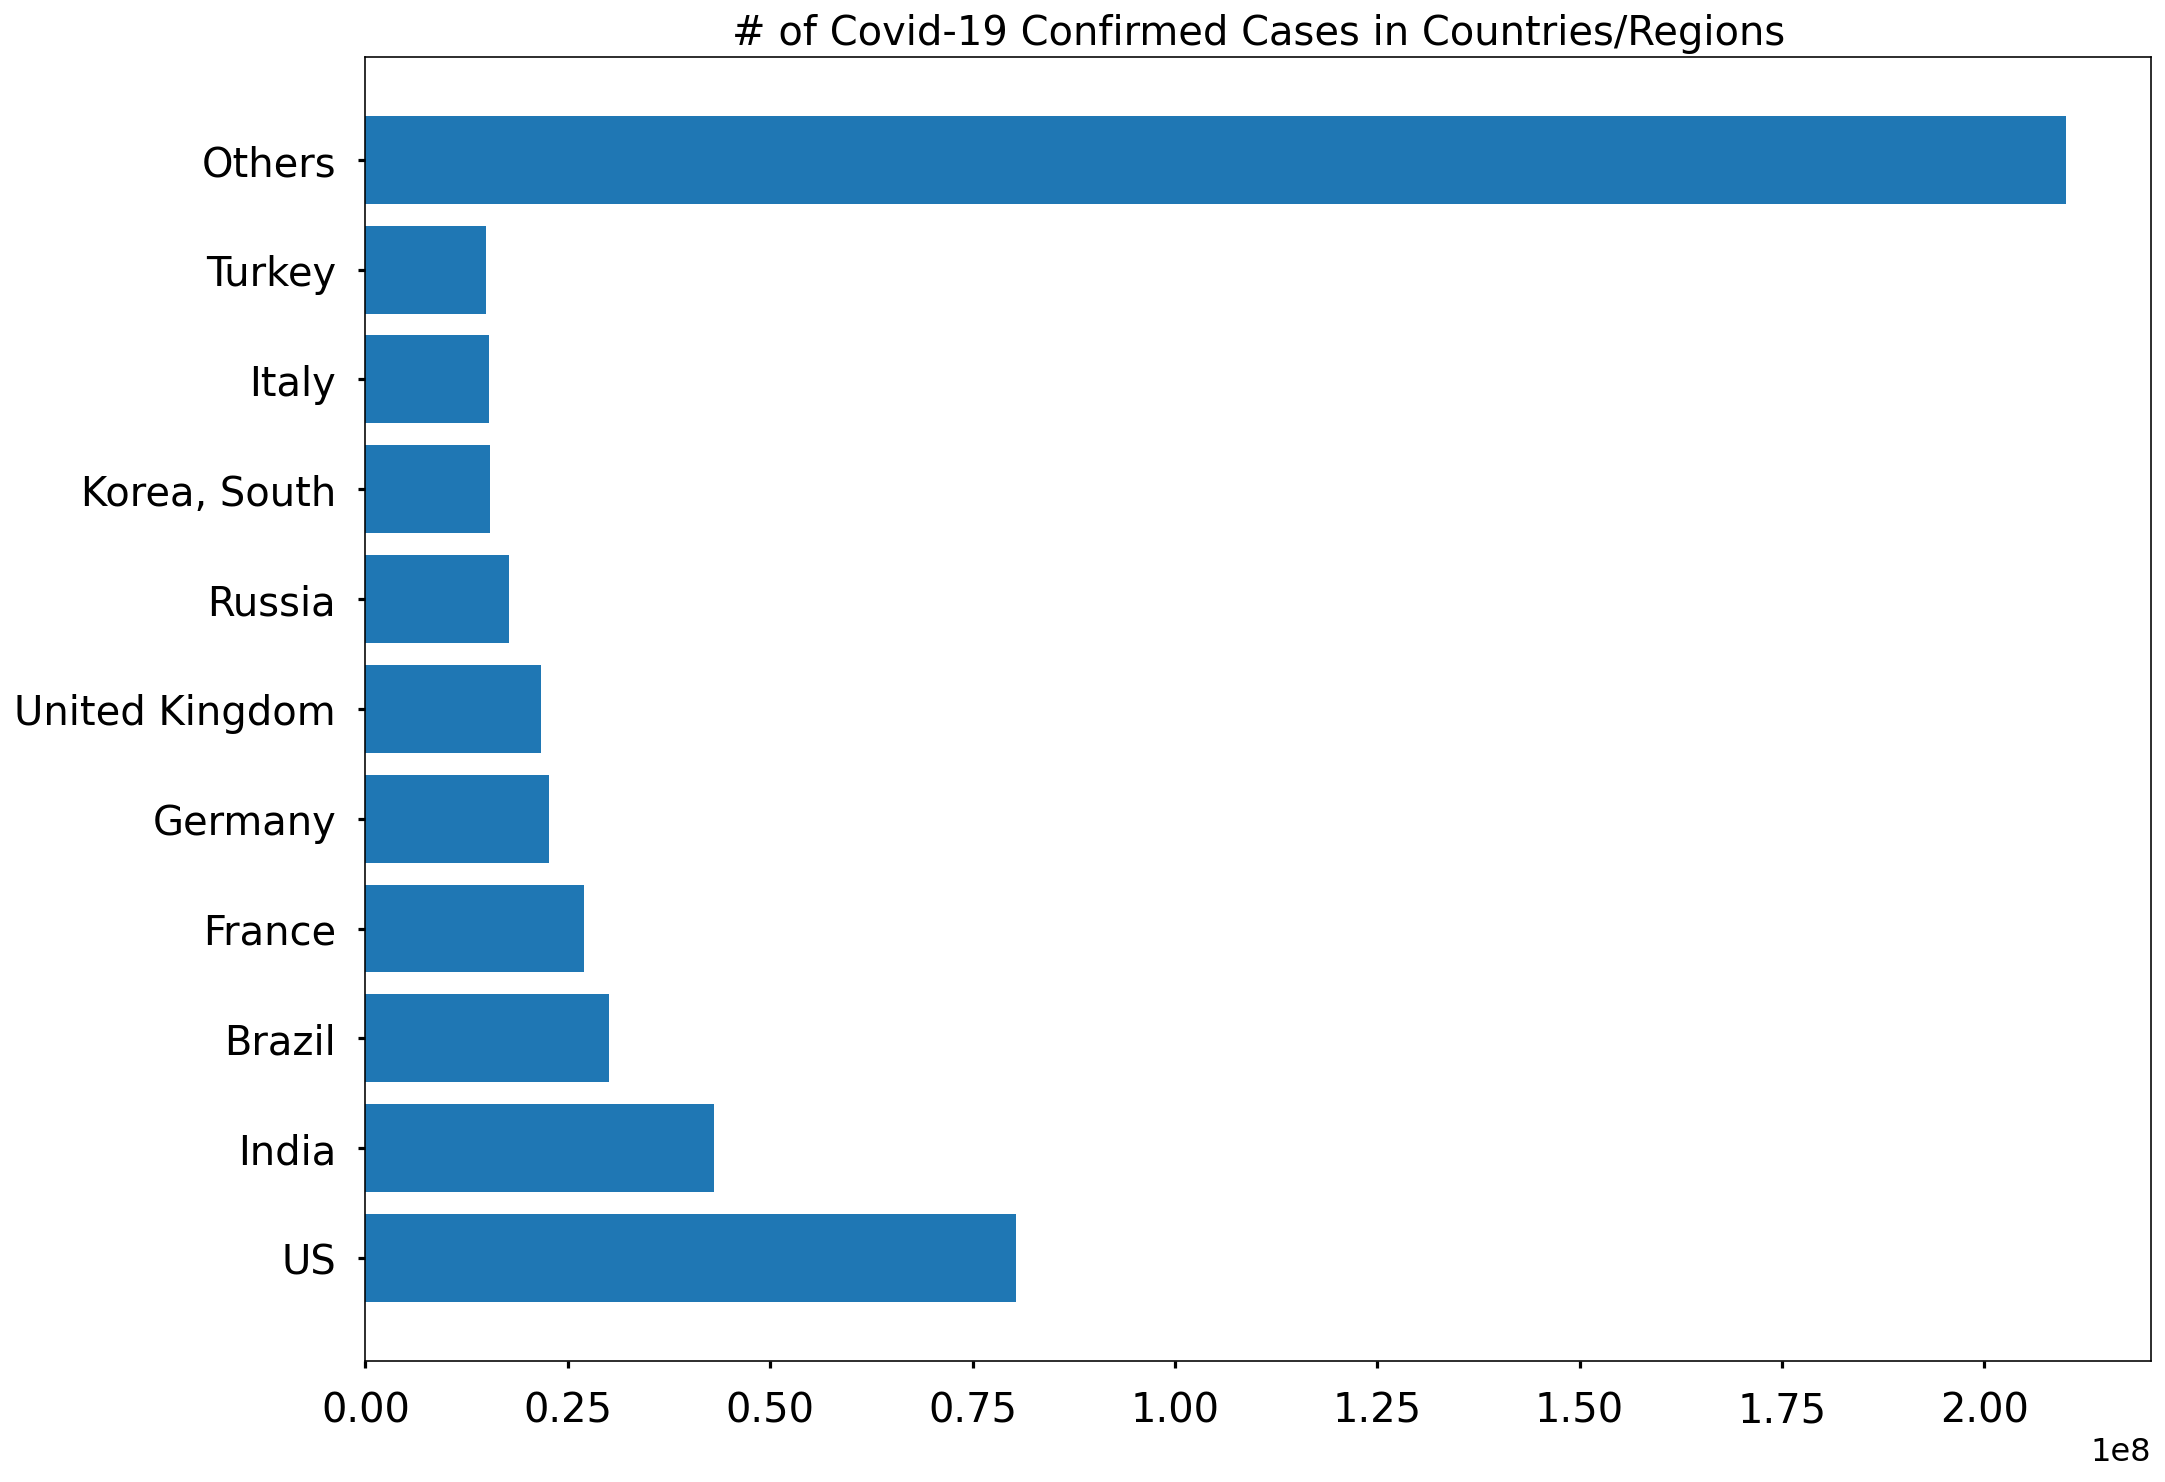

In [ ]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

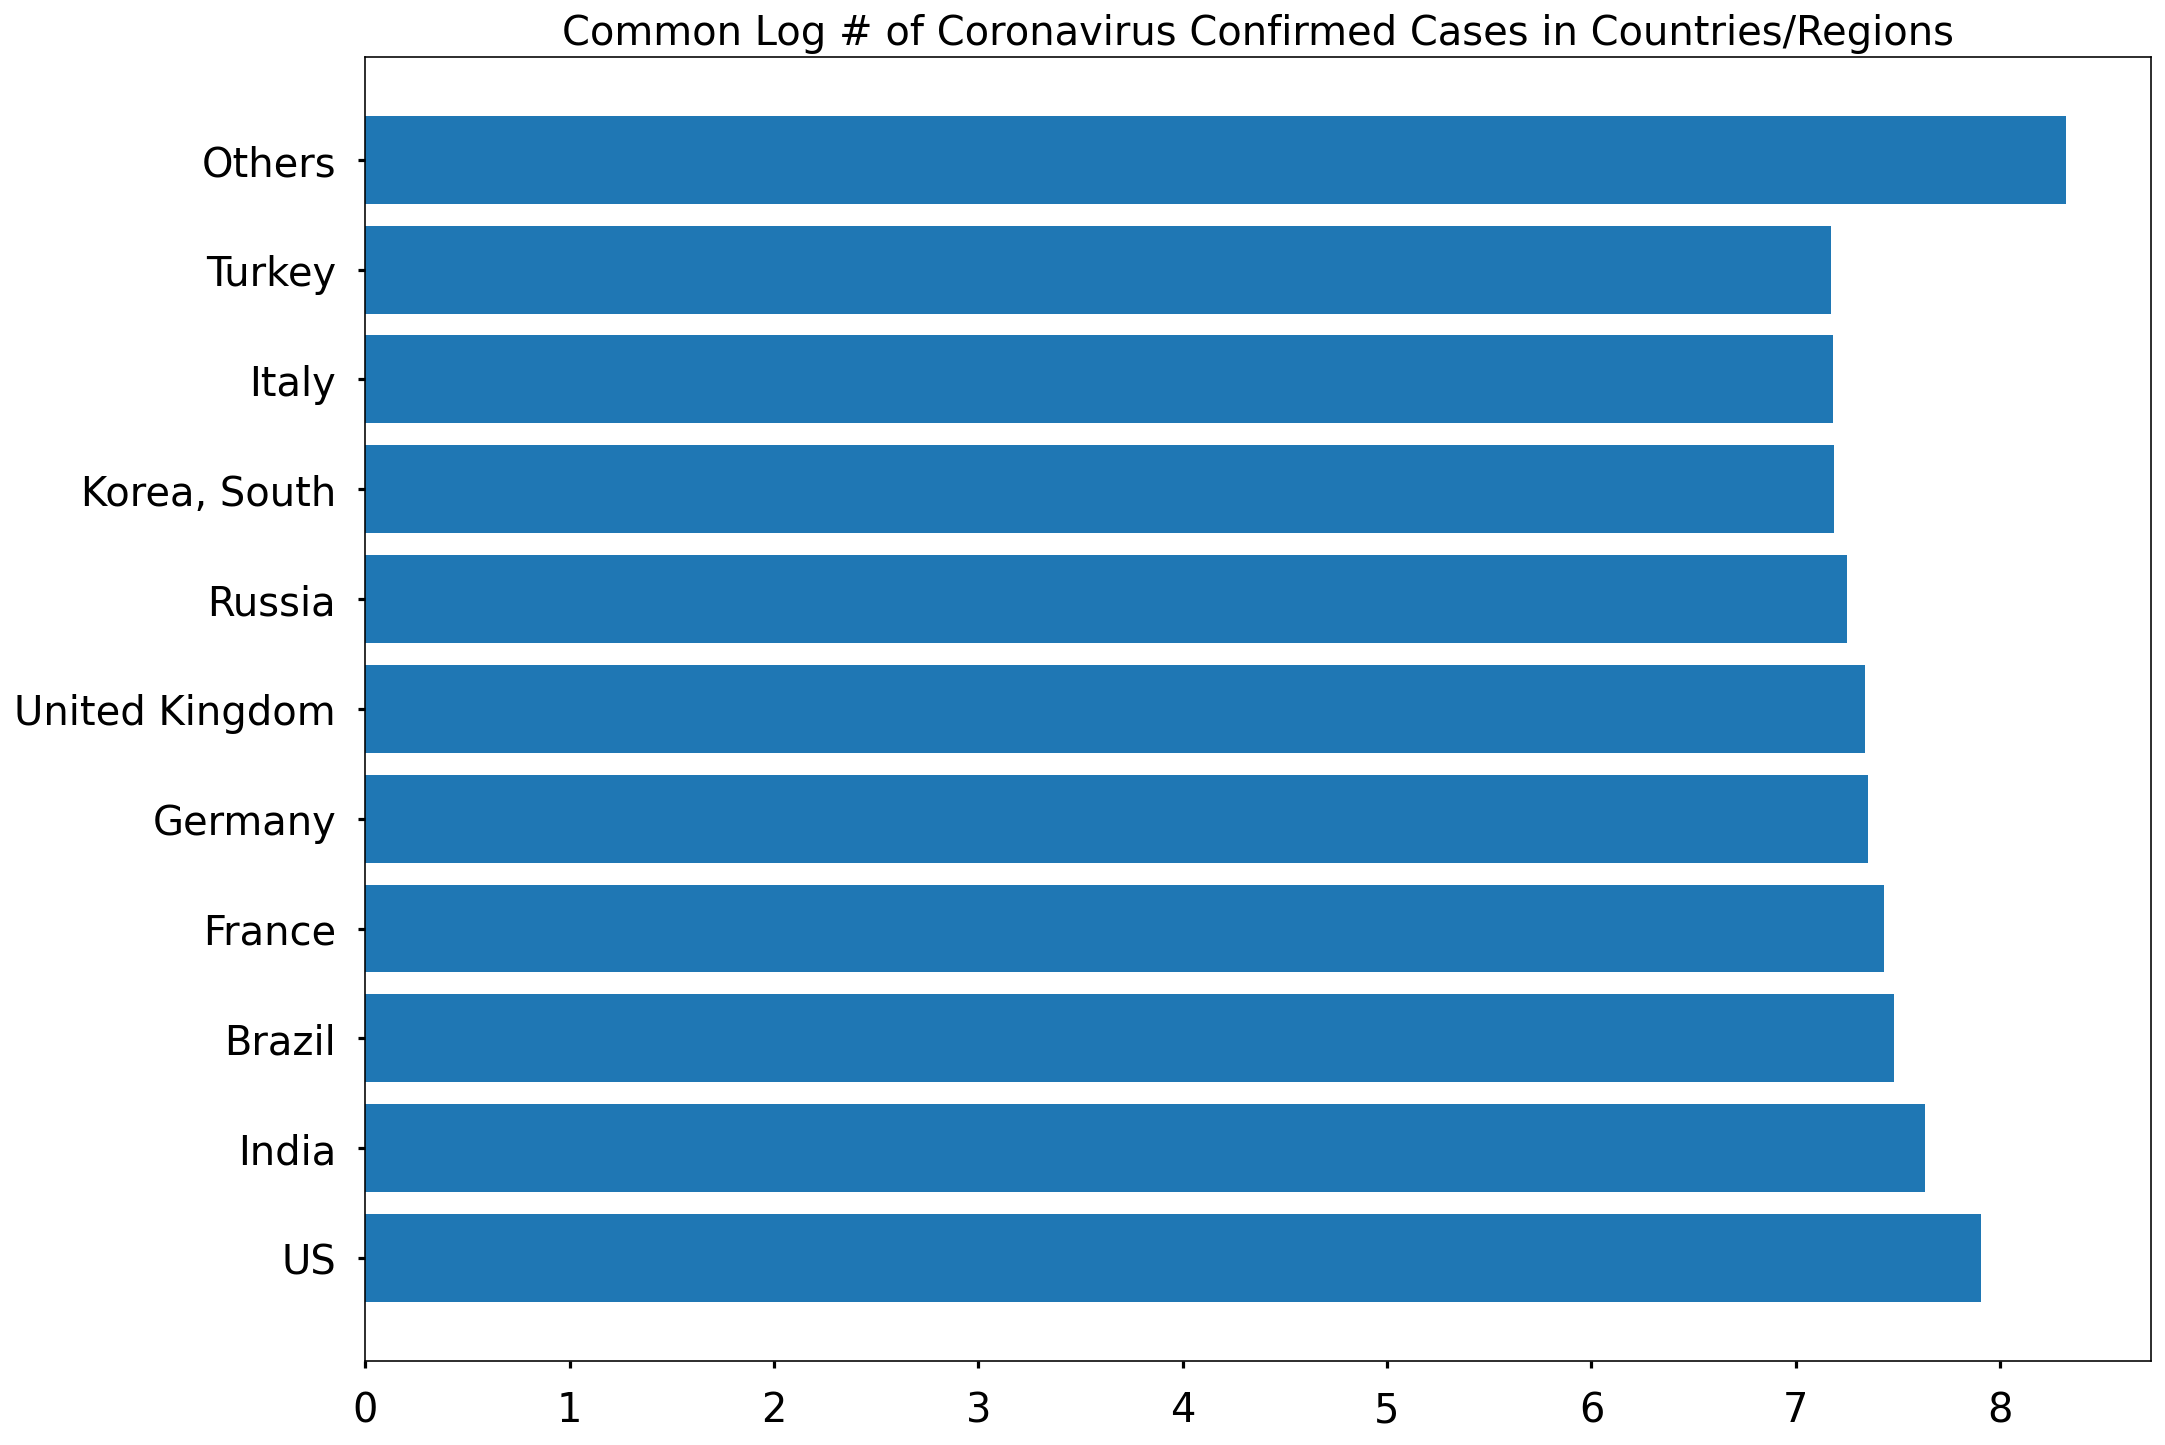

In [ ]:
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plot_bar_graphs(visual_unique_countries, log_country_confirmed_cases, 'Common Log # of Coronavirus Confirmed Cases in Countries/Regions')

In [ ]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

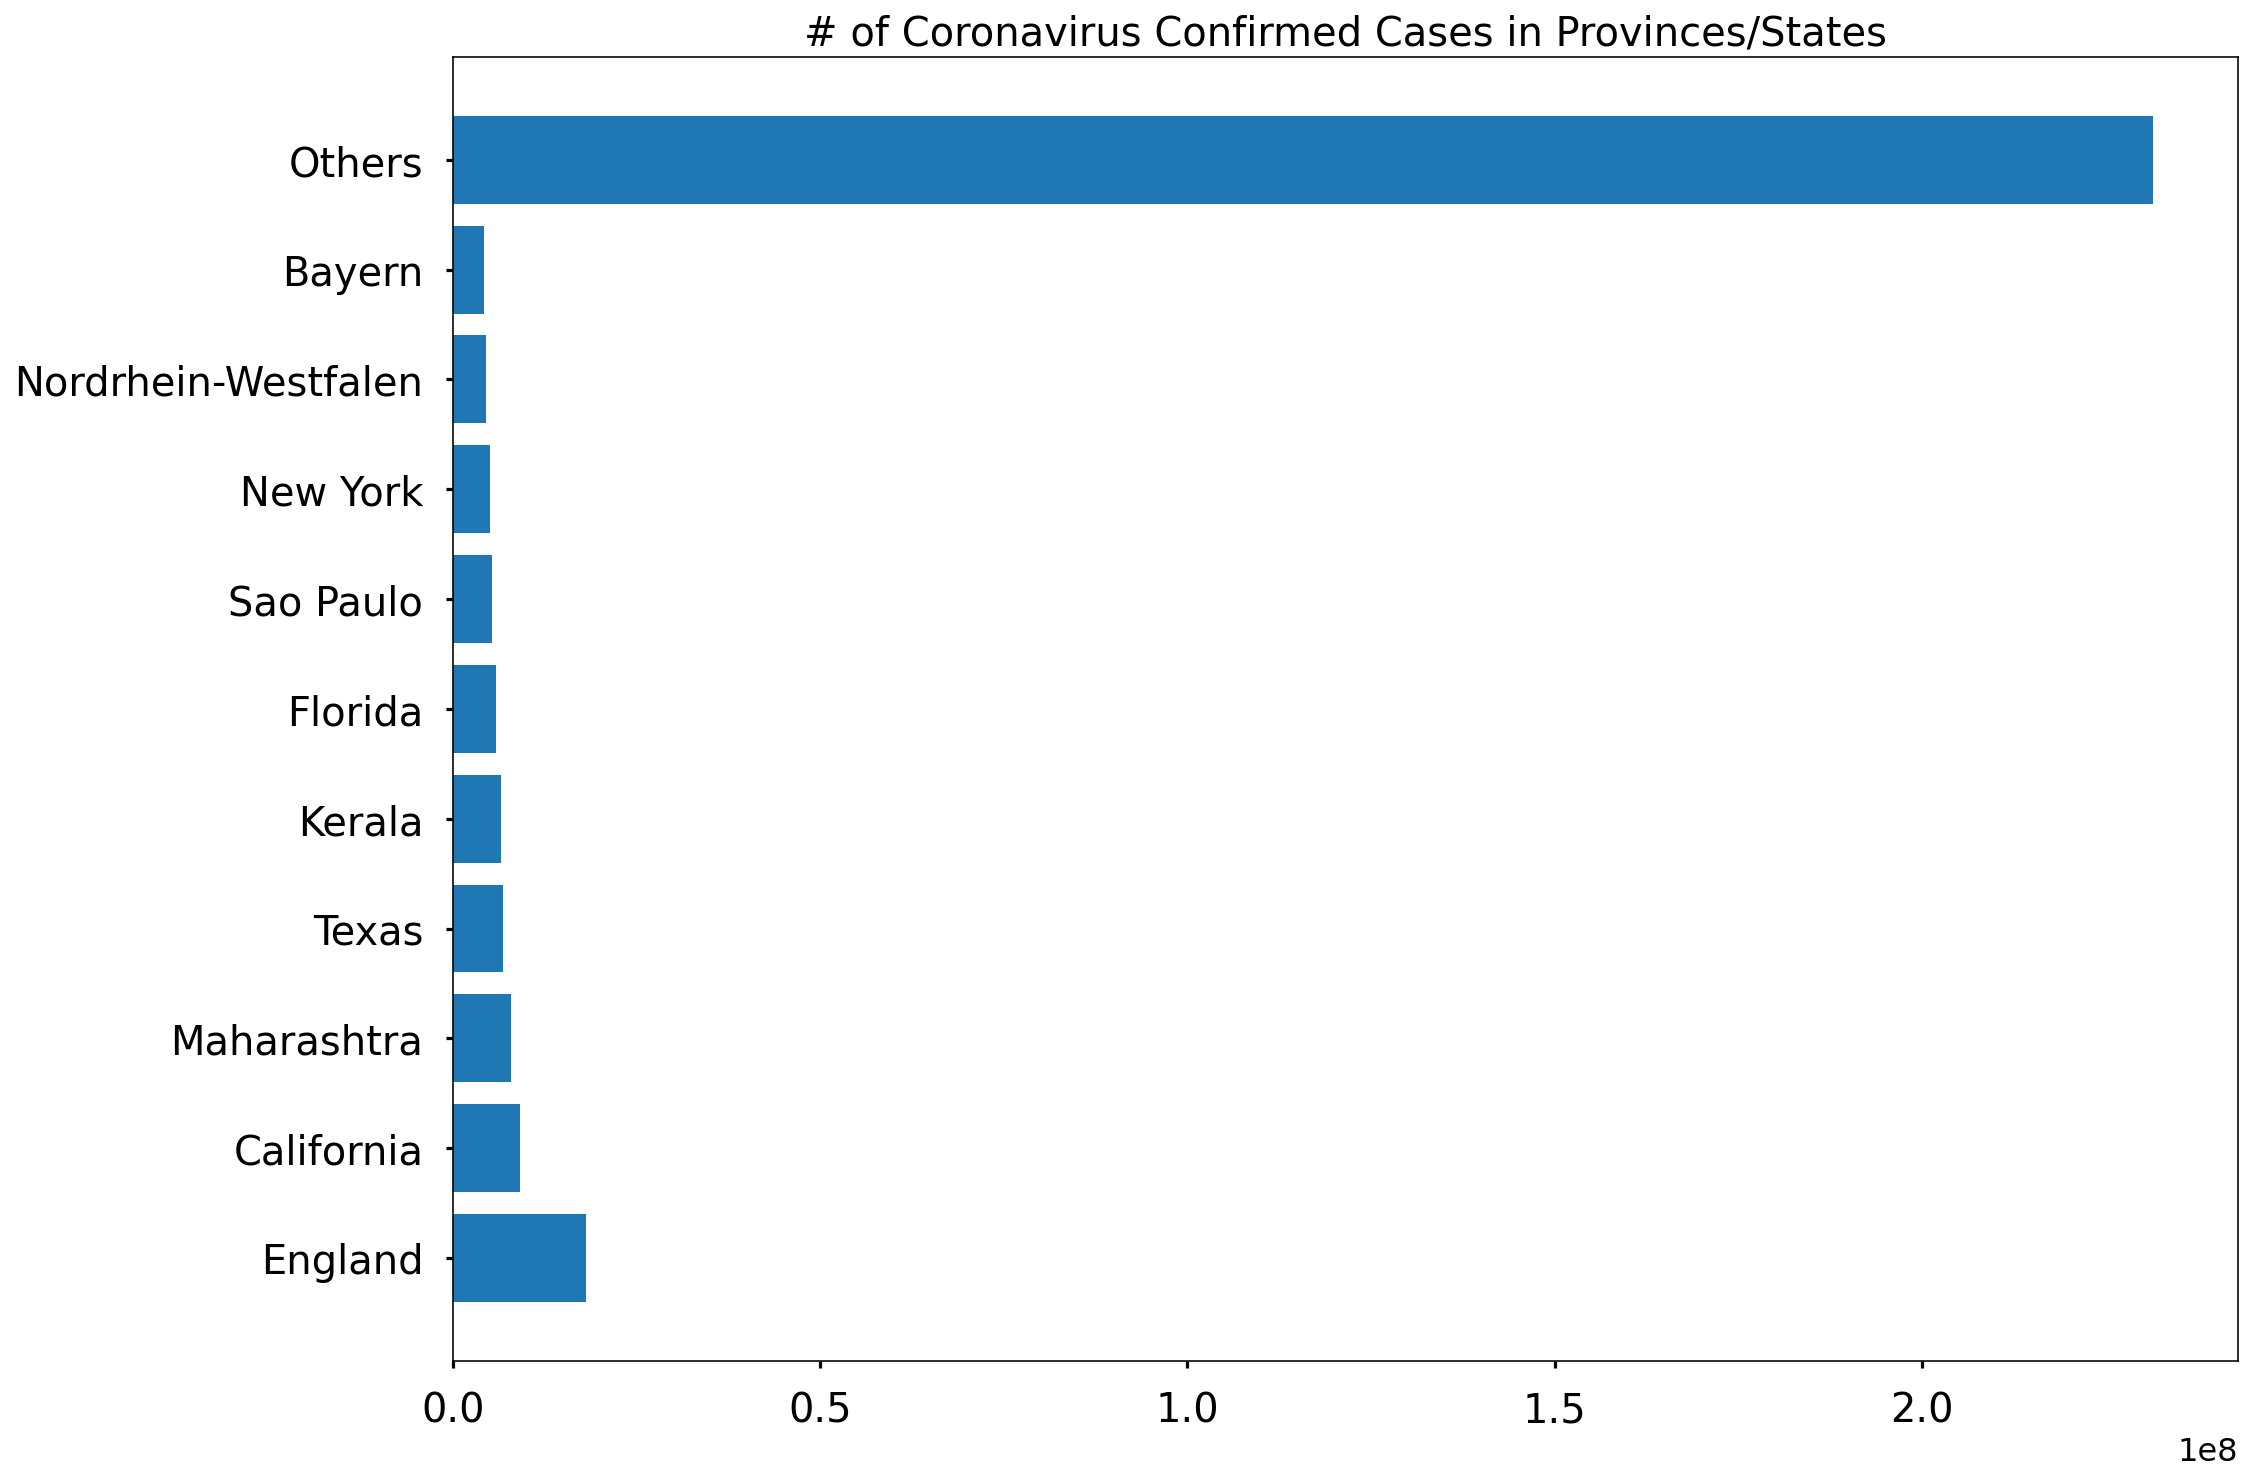

In [ ]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, '# of Coronavirus Confirmed Cases in Provinces/States')

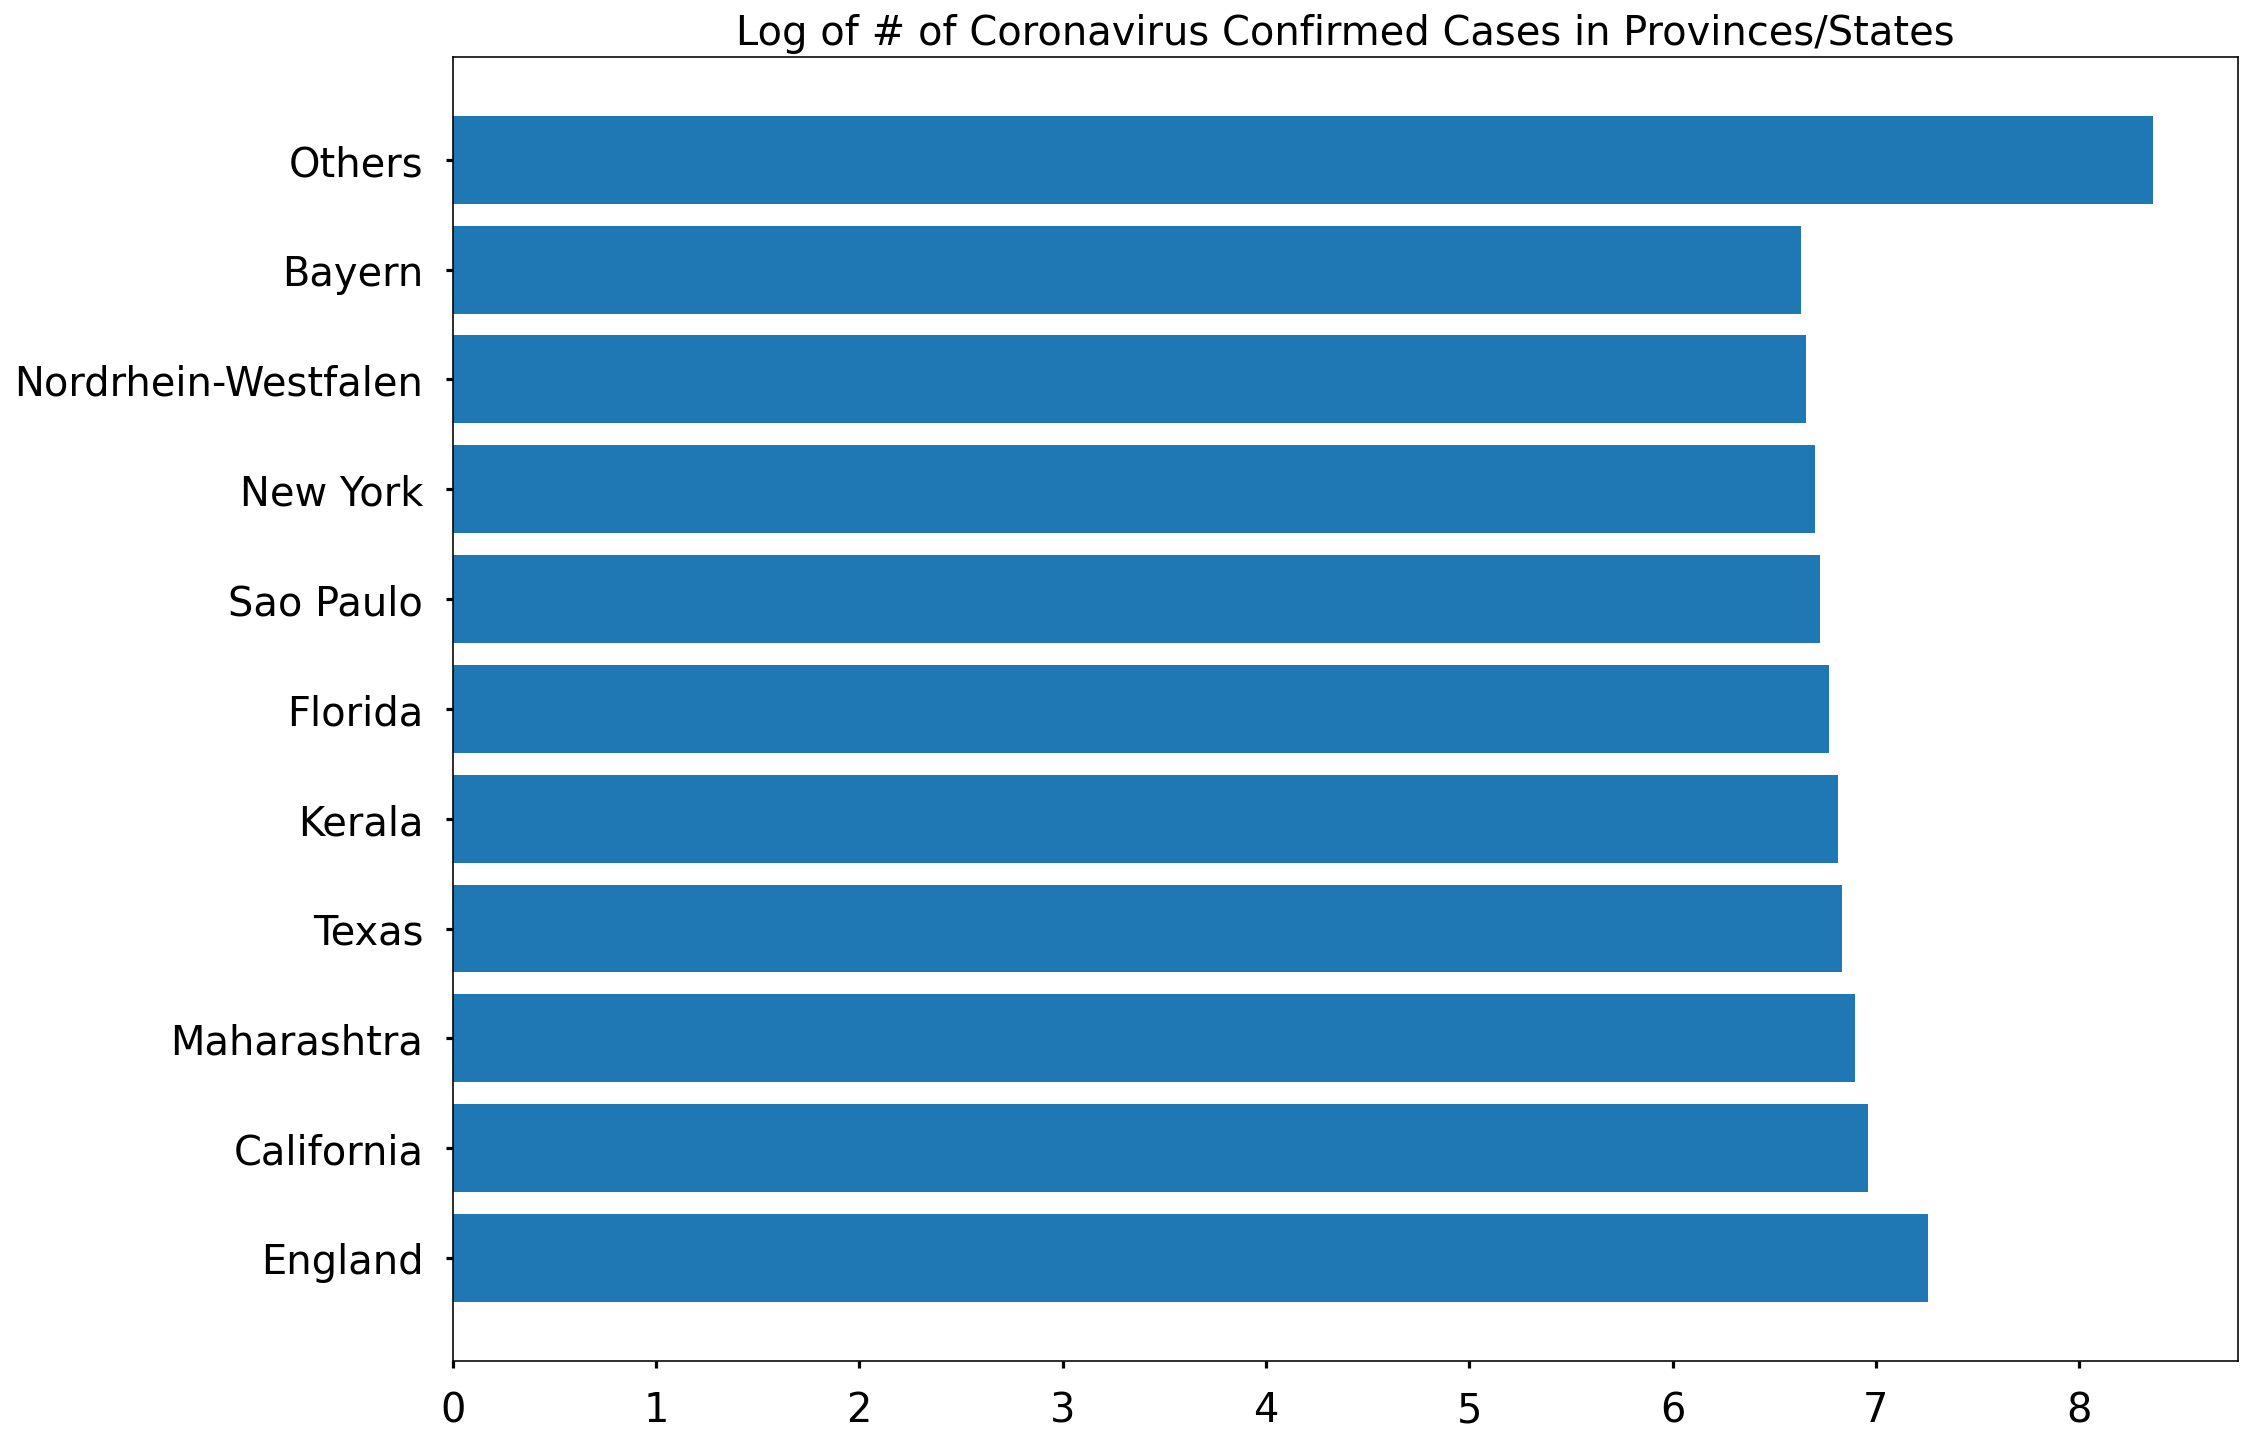

In [ ]:
log_province_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases2]
plot_bar_graphs(visual_unique_provinces, log_province_confirmed_cases, 'Log of # of Coronavirus Confirmed Cases in Provinces/States')

<a id='pie_charts'></a>
# Pie Chart Visualizations for COVID-19
Although pie charts are not necessarily the most informative visualizations, I added them to increase some variety for the visualizations. 

In [ ]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

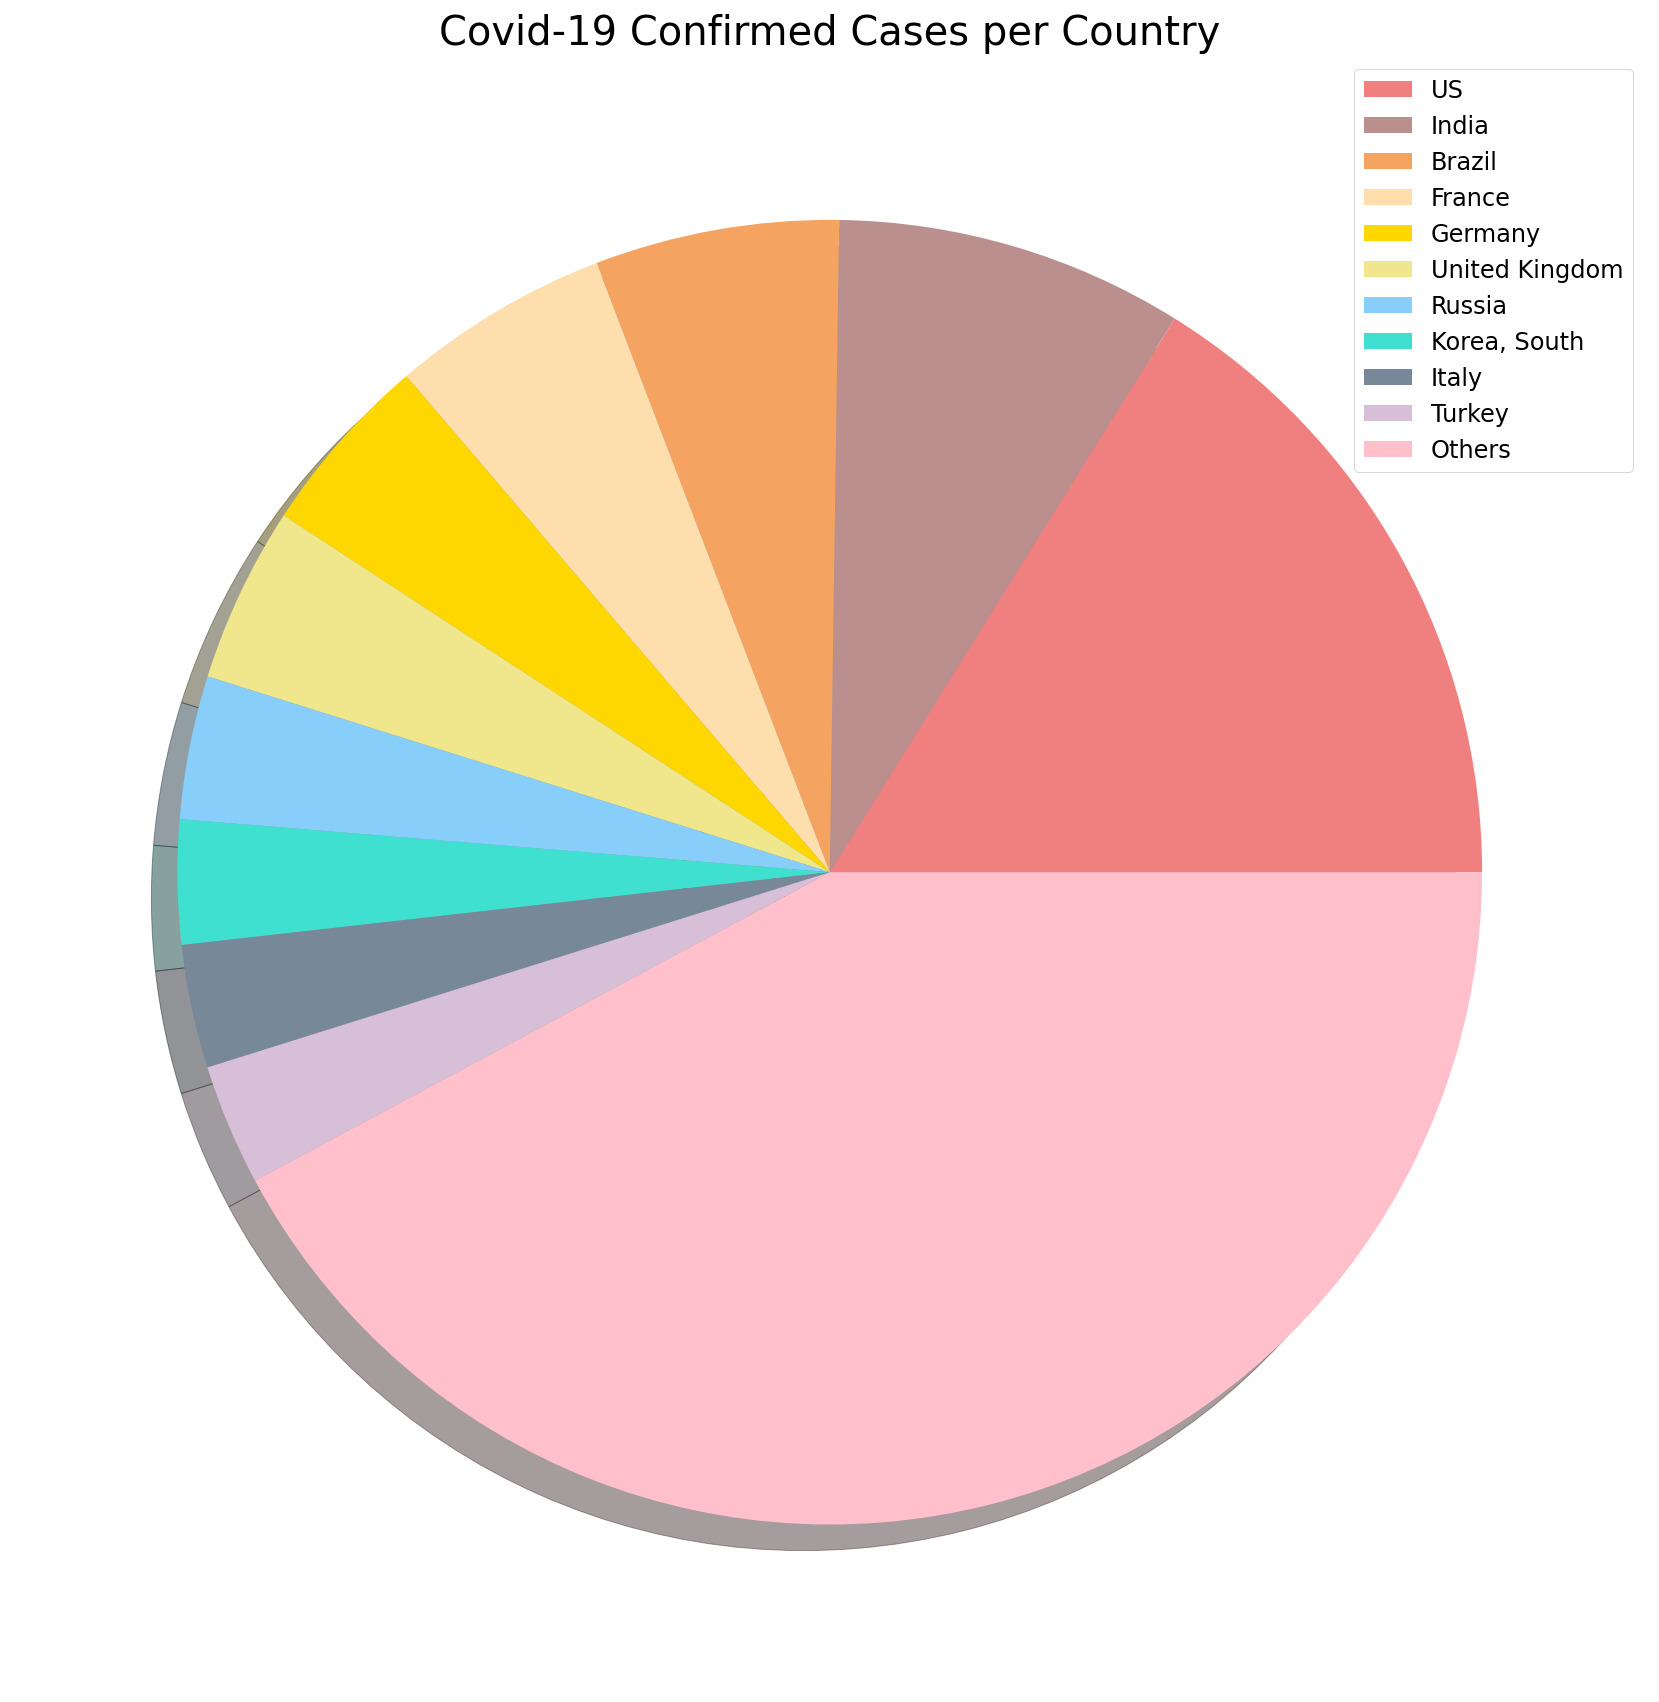

In [ ]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

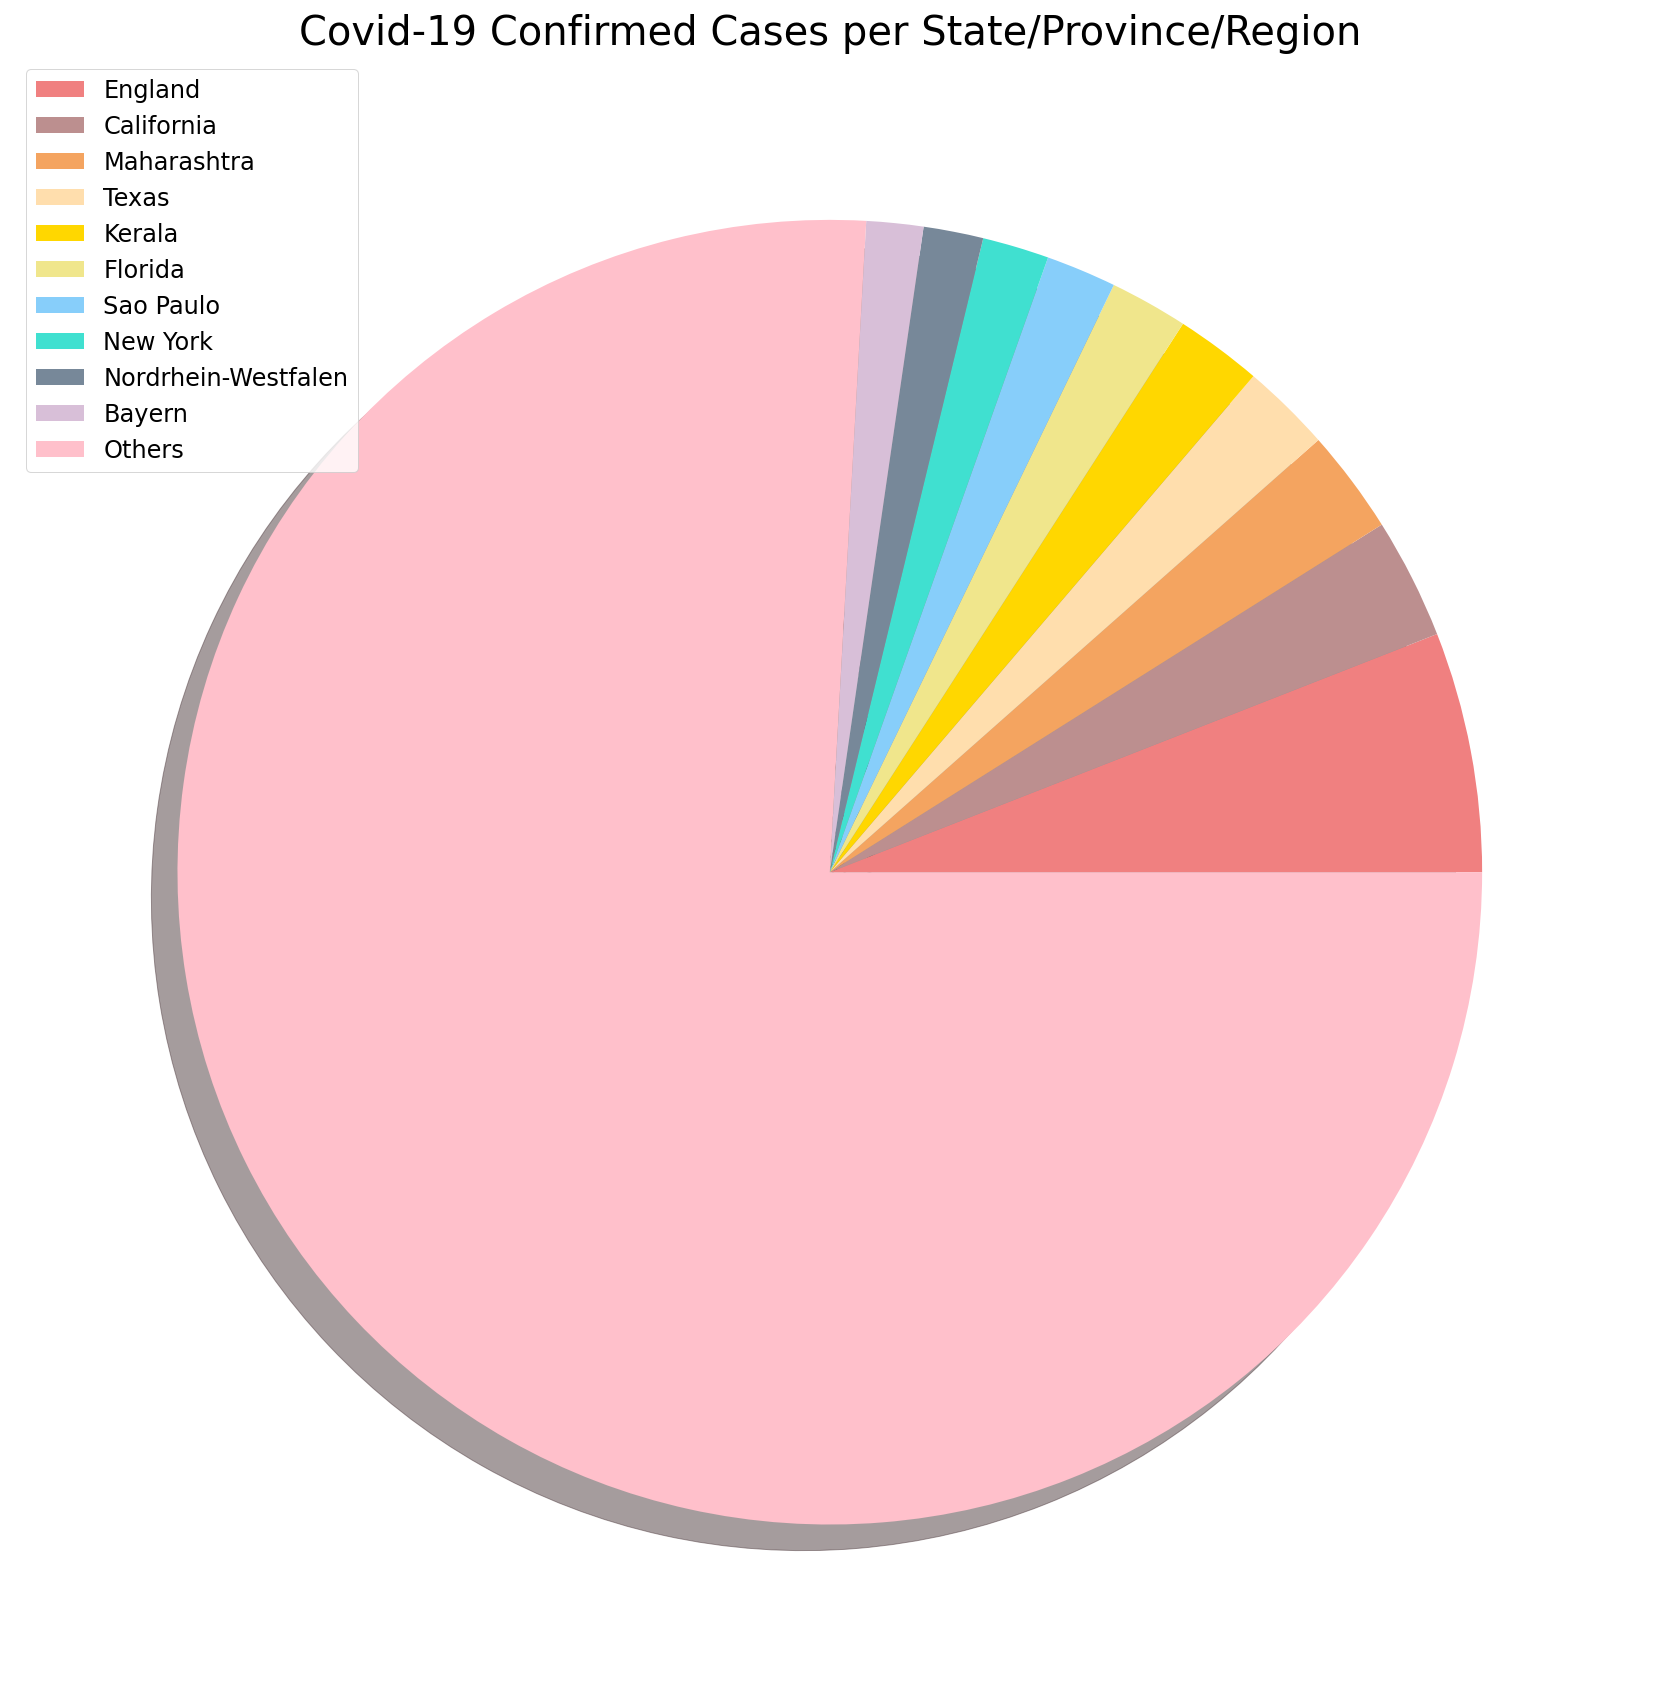

In [ ]:
plot_pie_charts(visual_unique_provinces, visual_confirmed_cases2, 'Covid-19 Confirmed Cases per State/Province/Region')

In [ ]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_pie_charts(regions_5,confirmed_cases_5, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

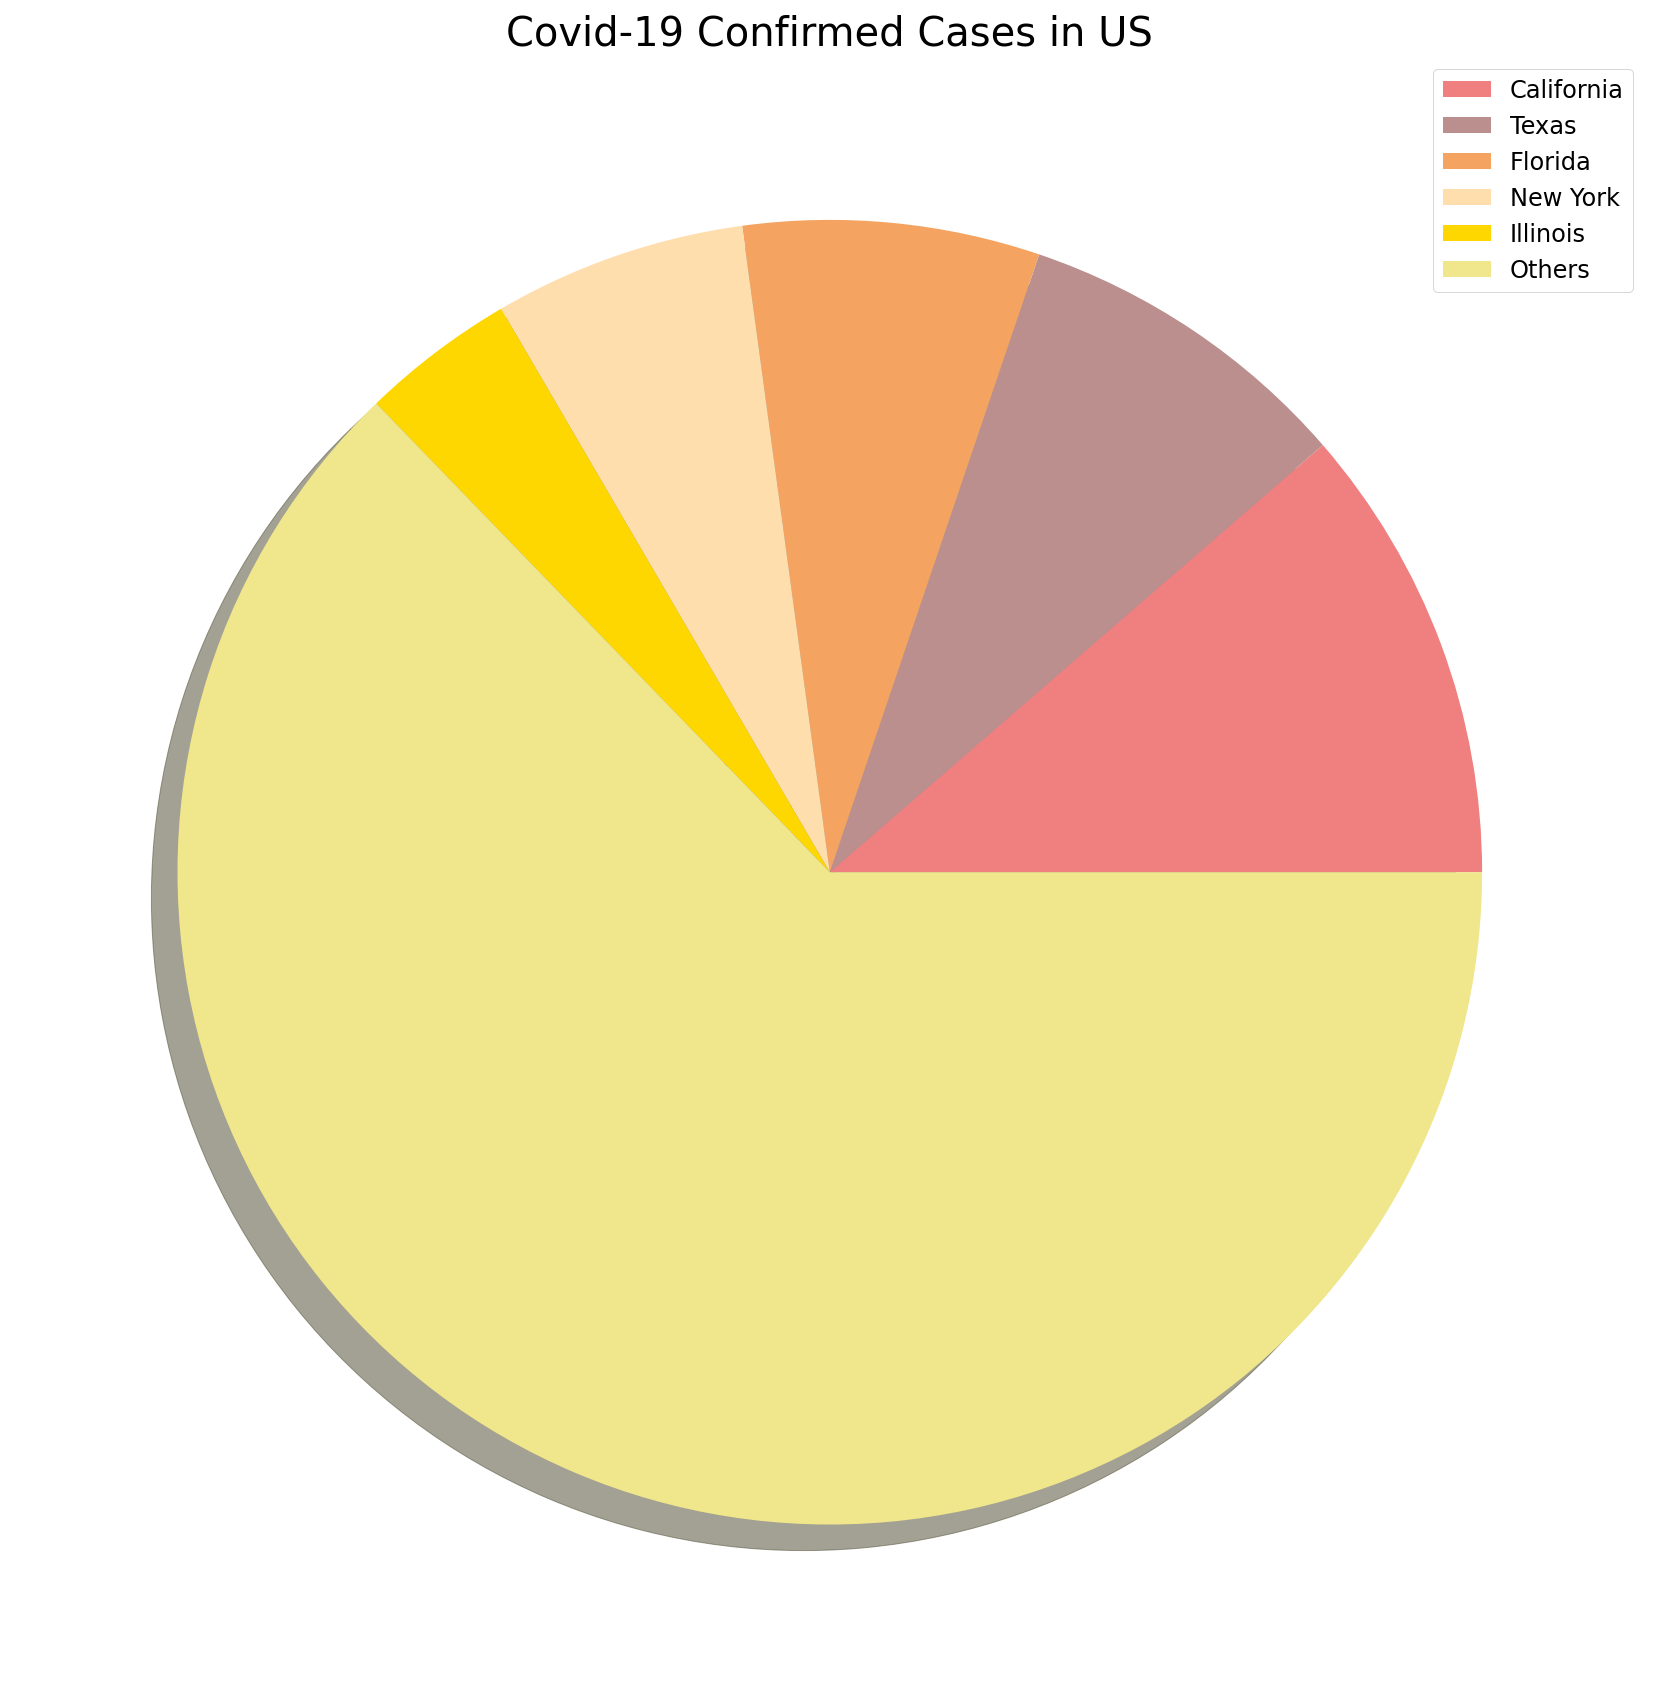

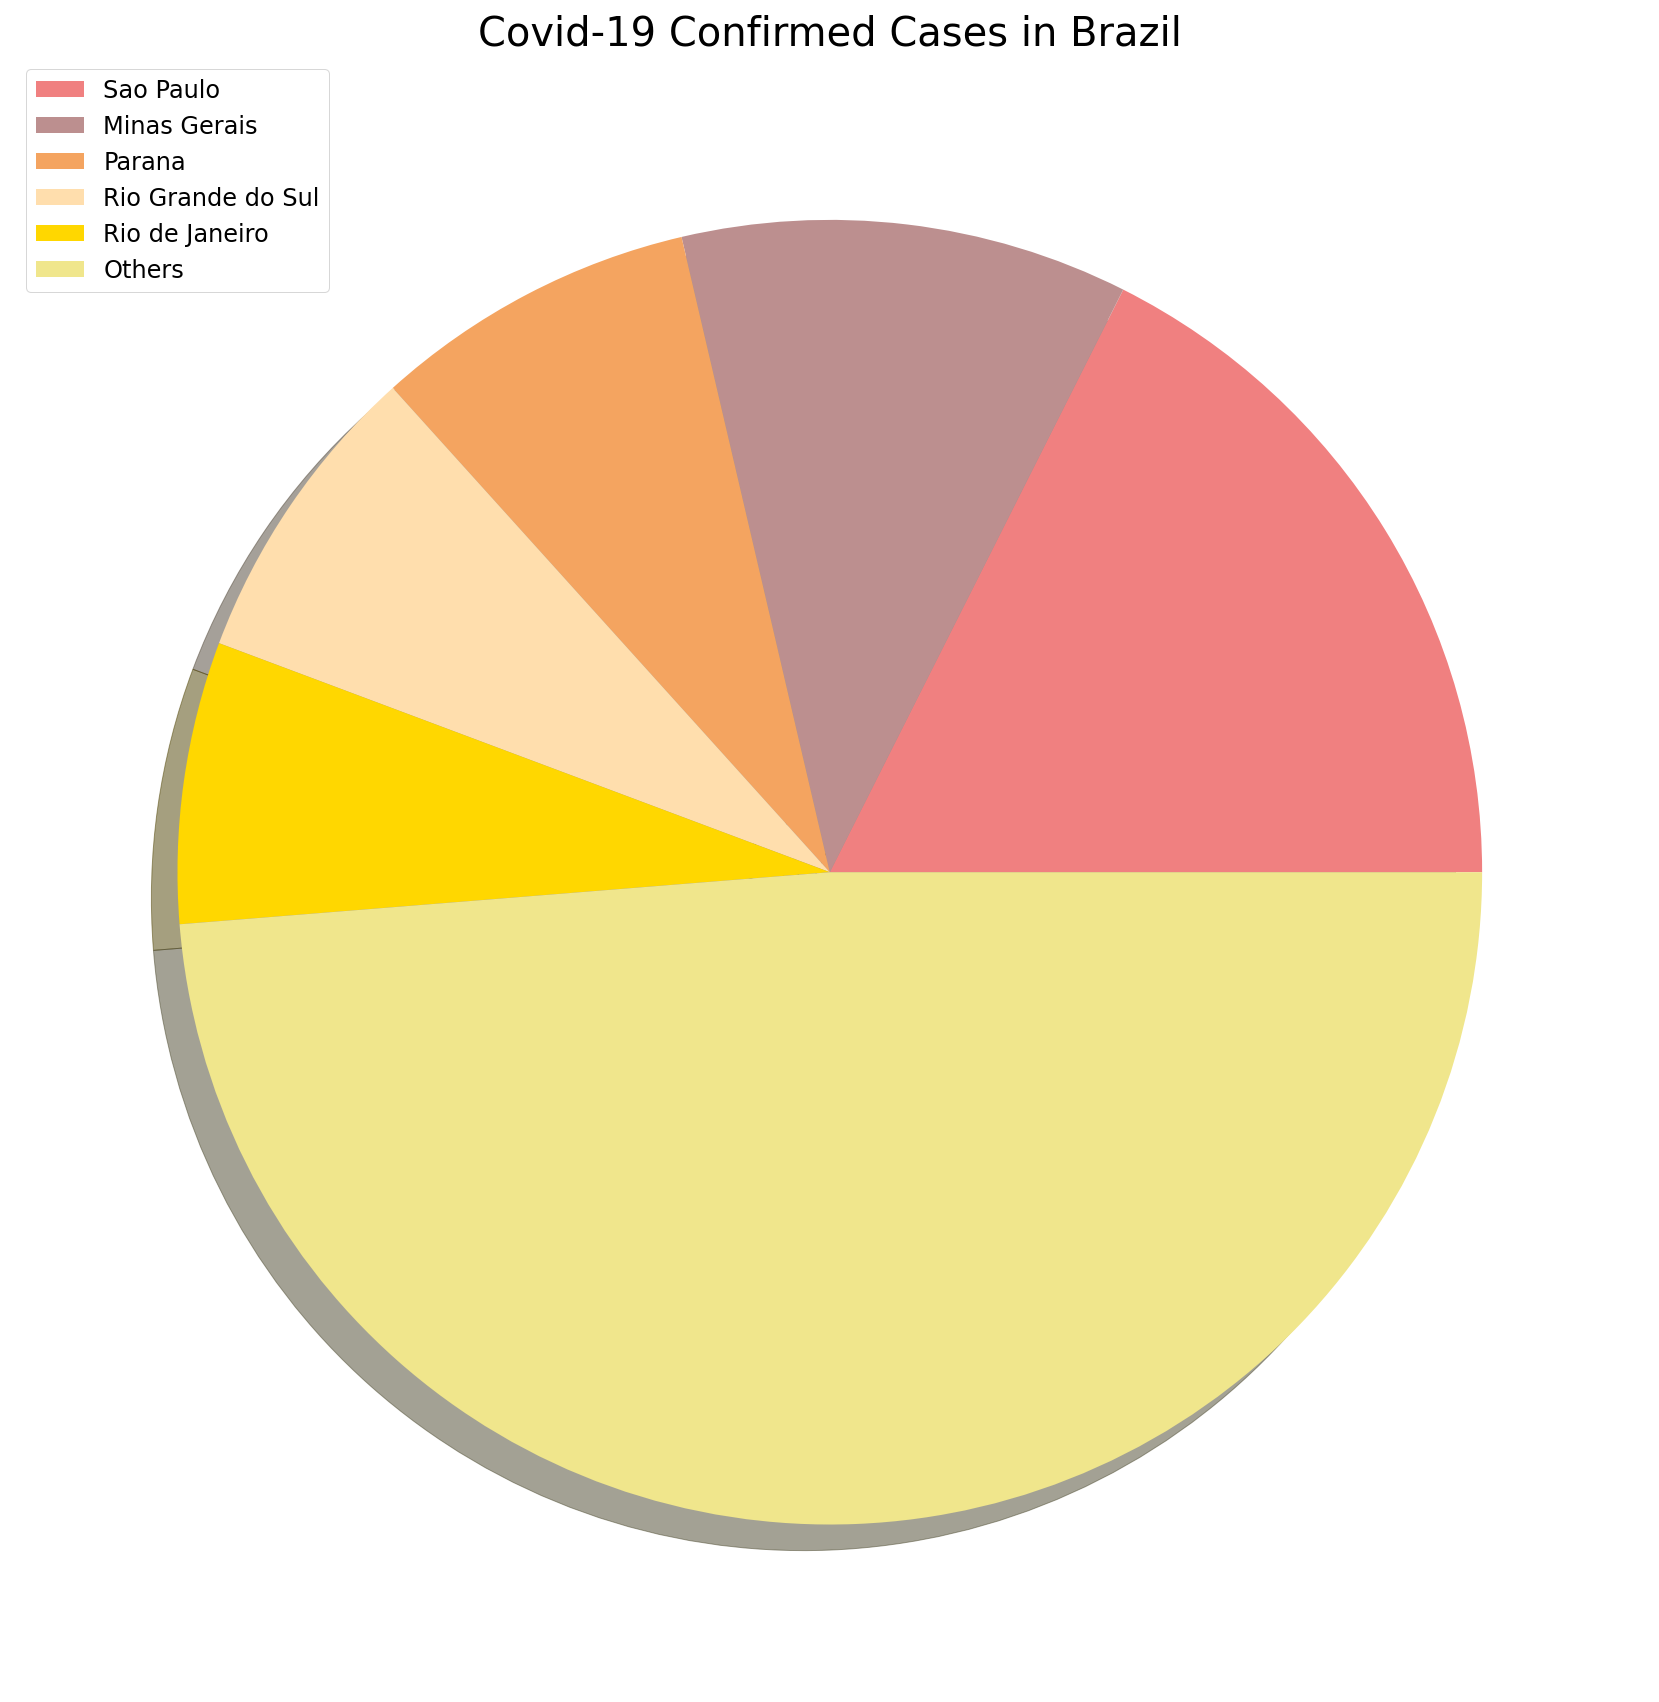

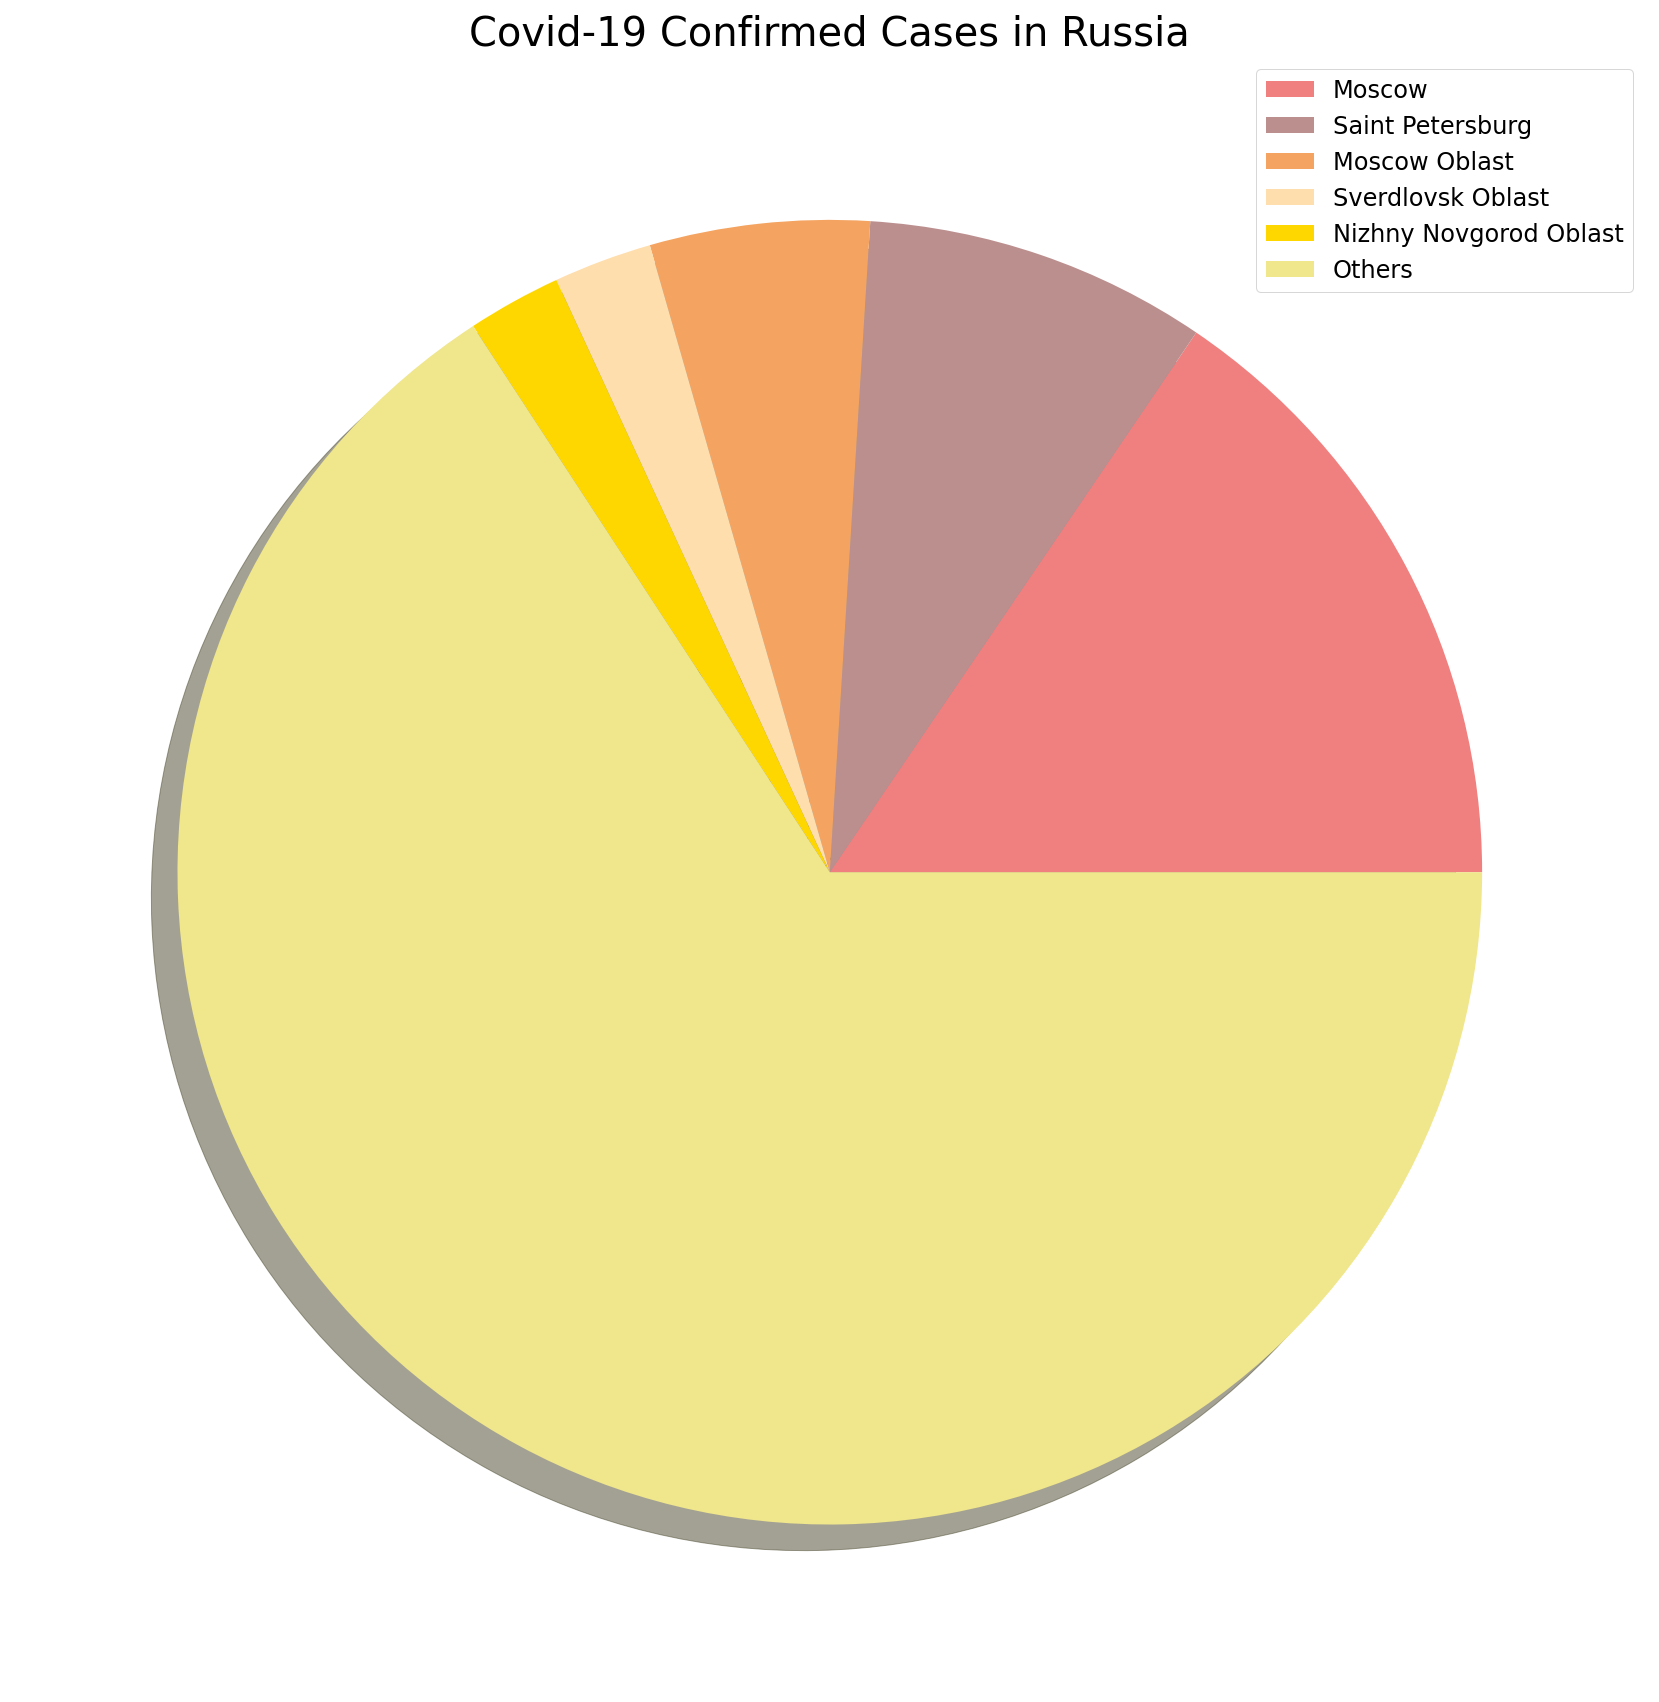

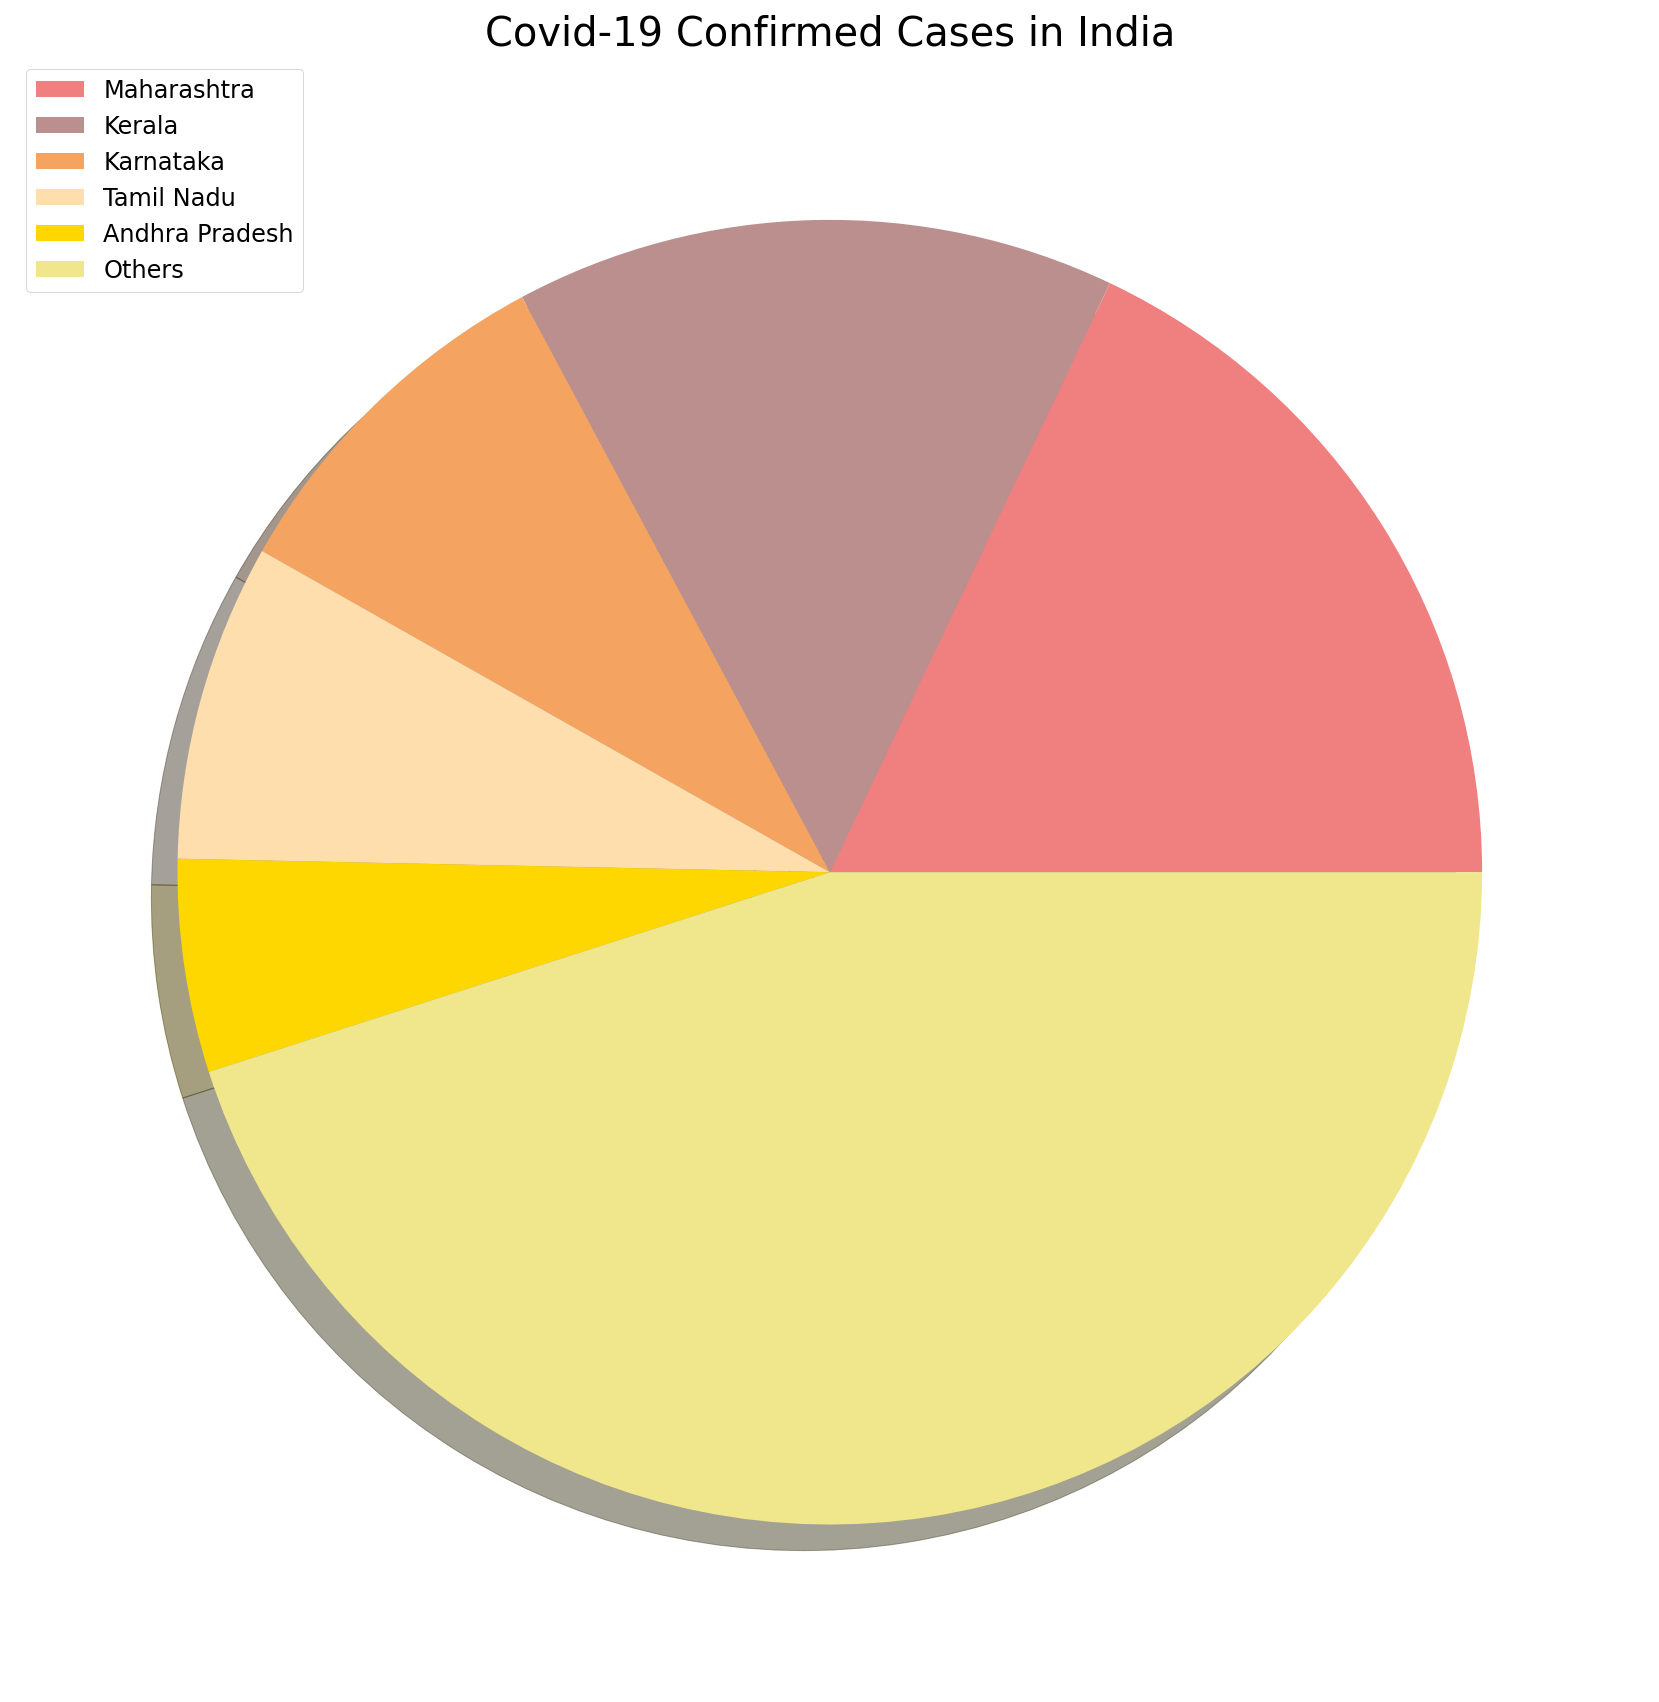

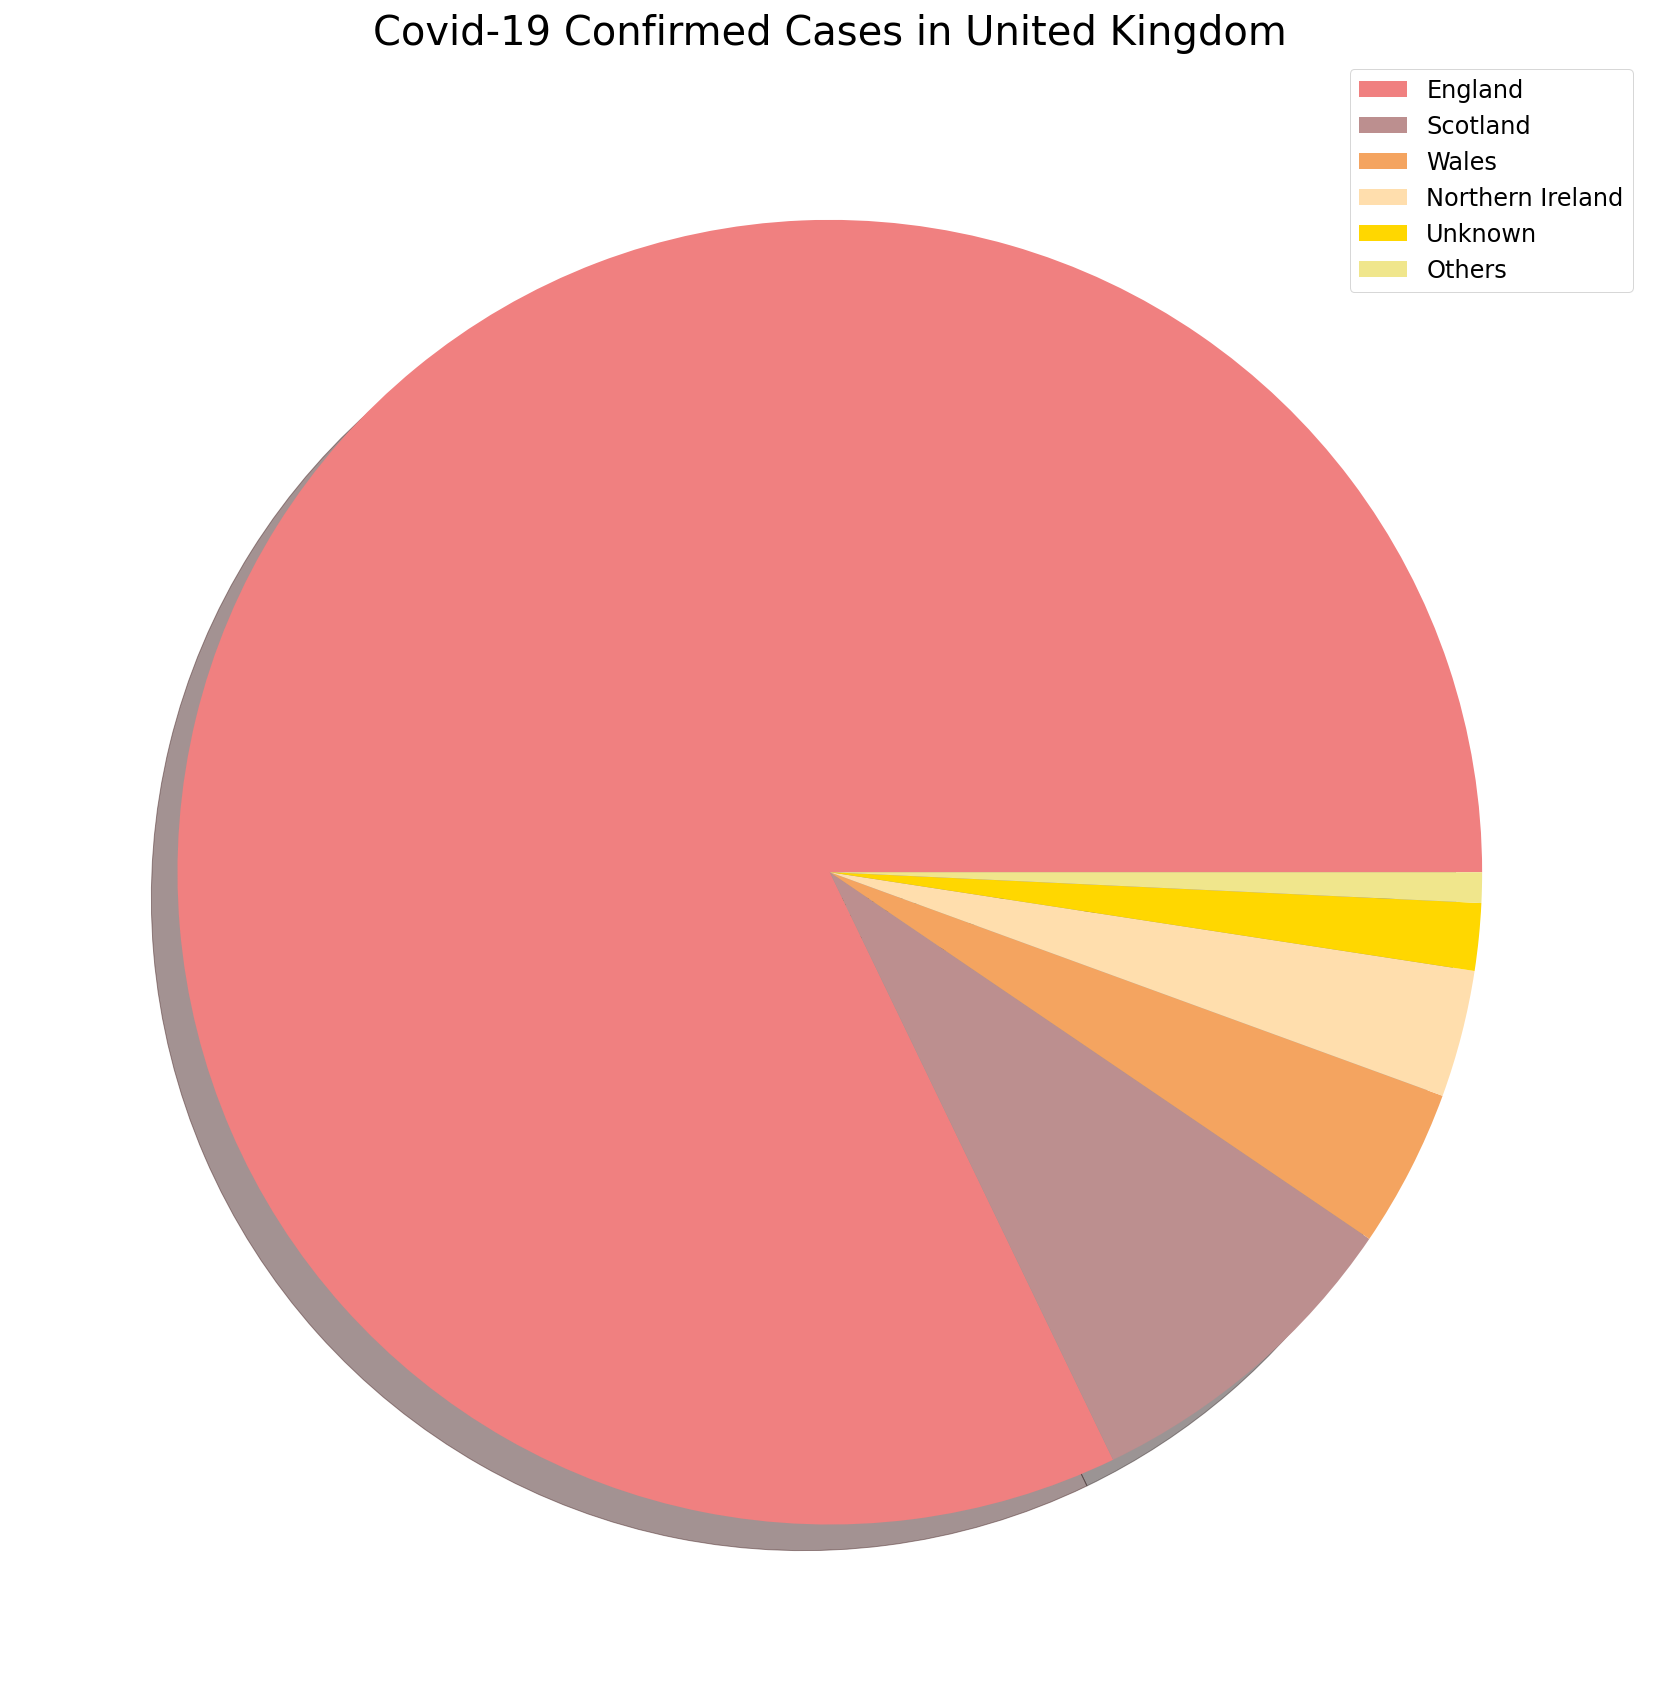

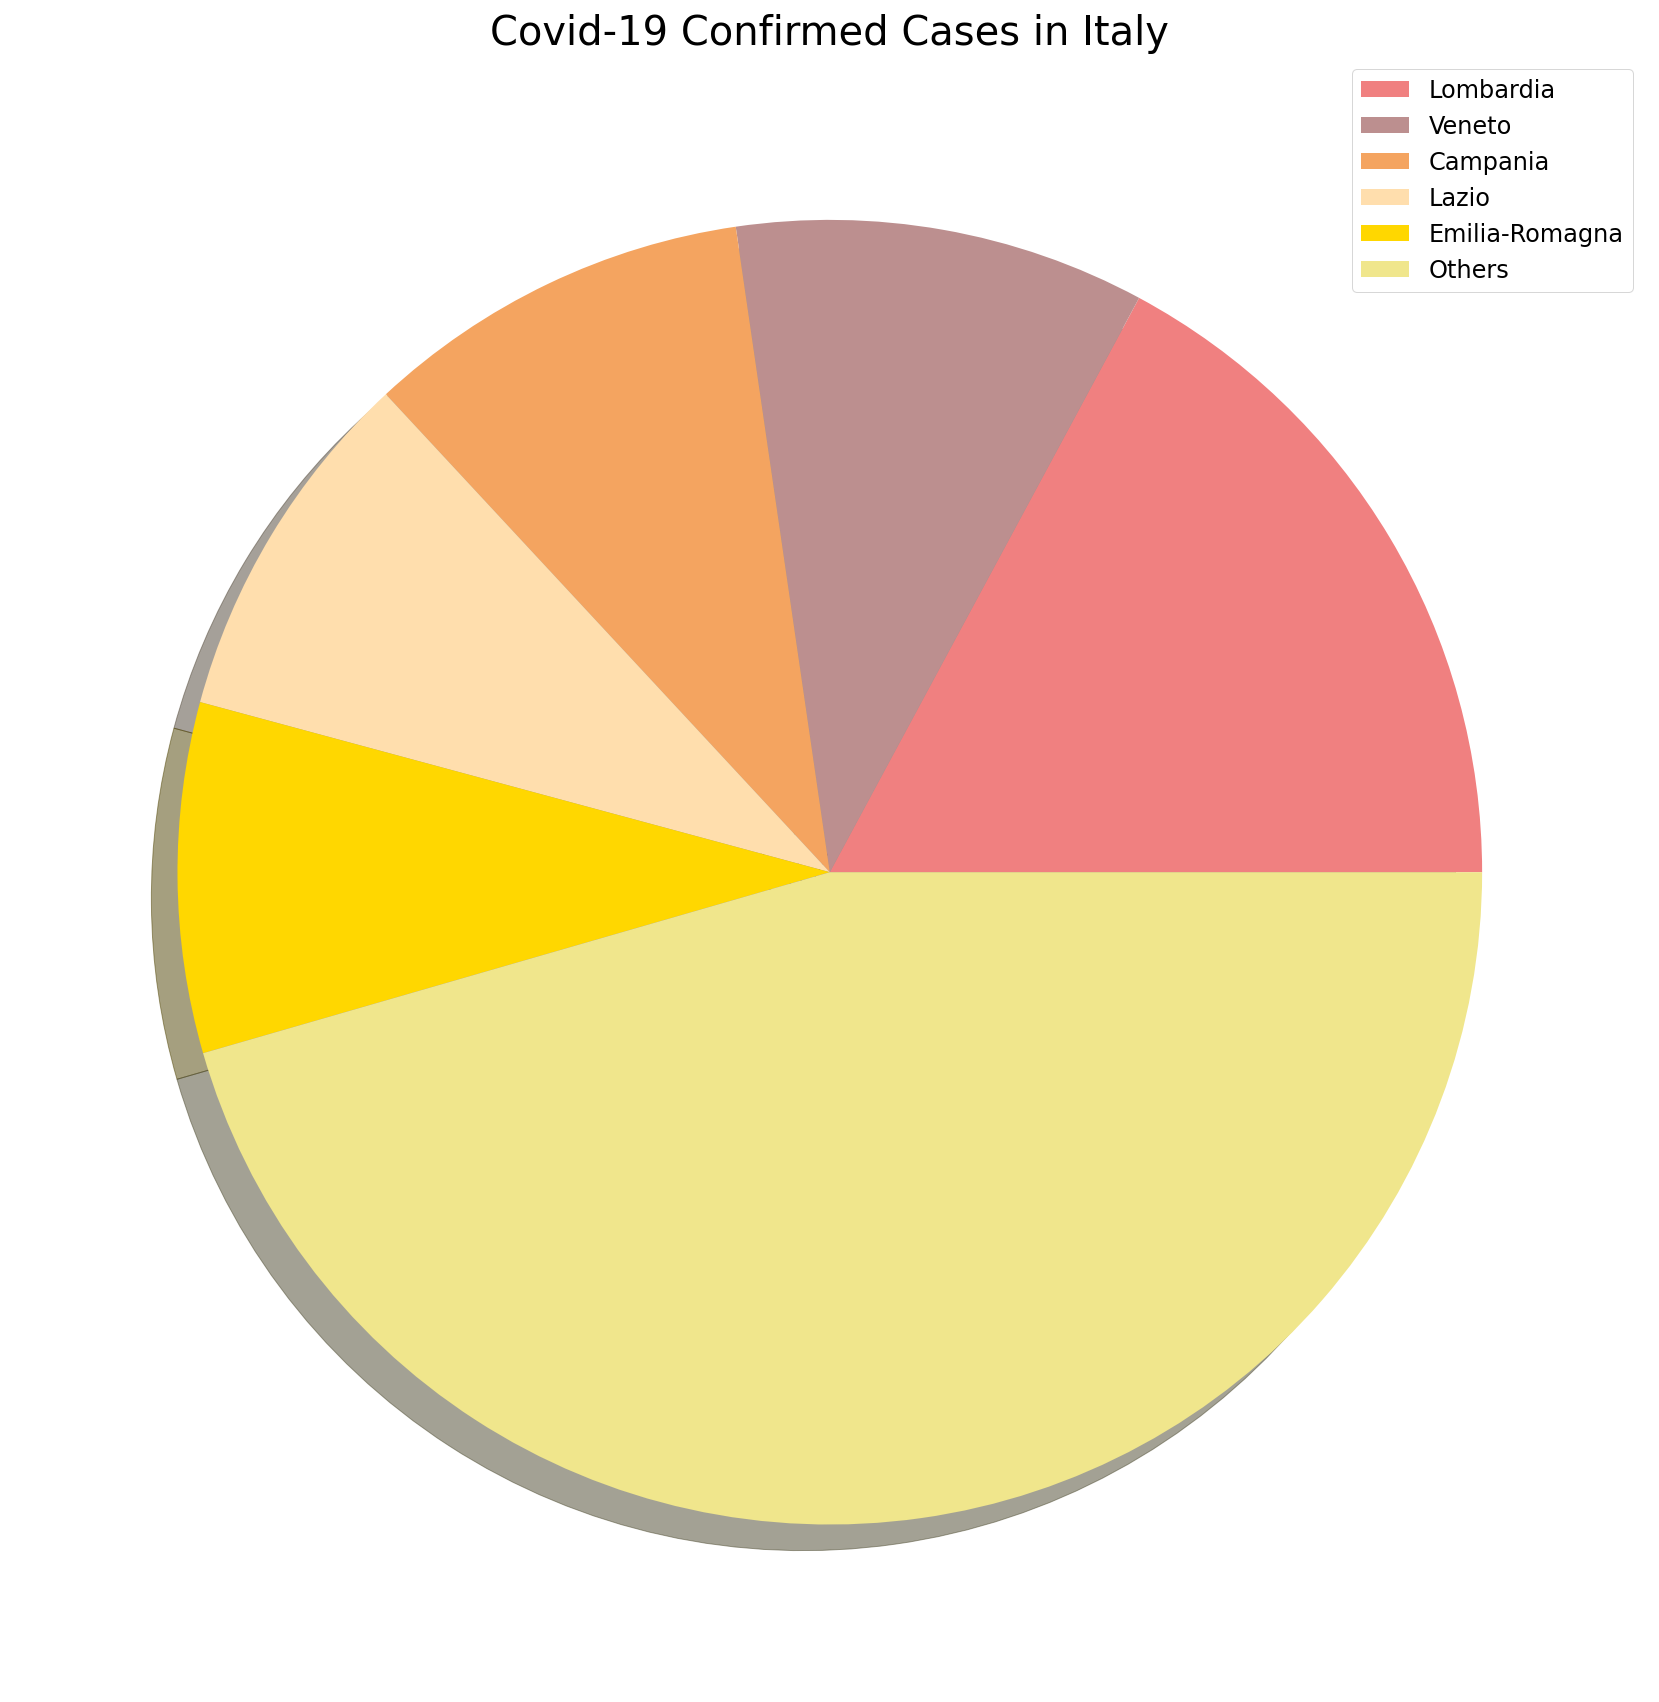

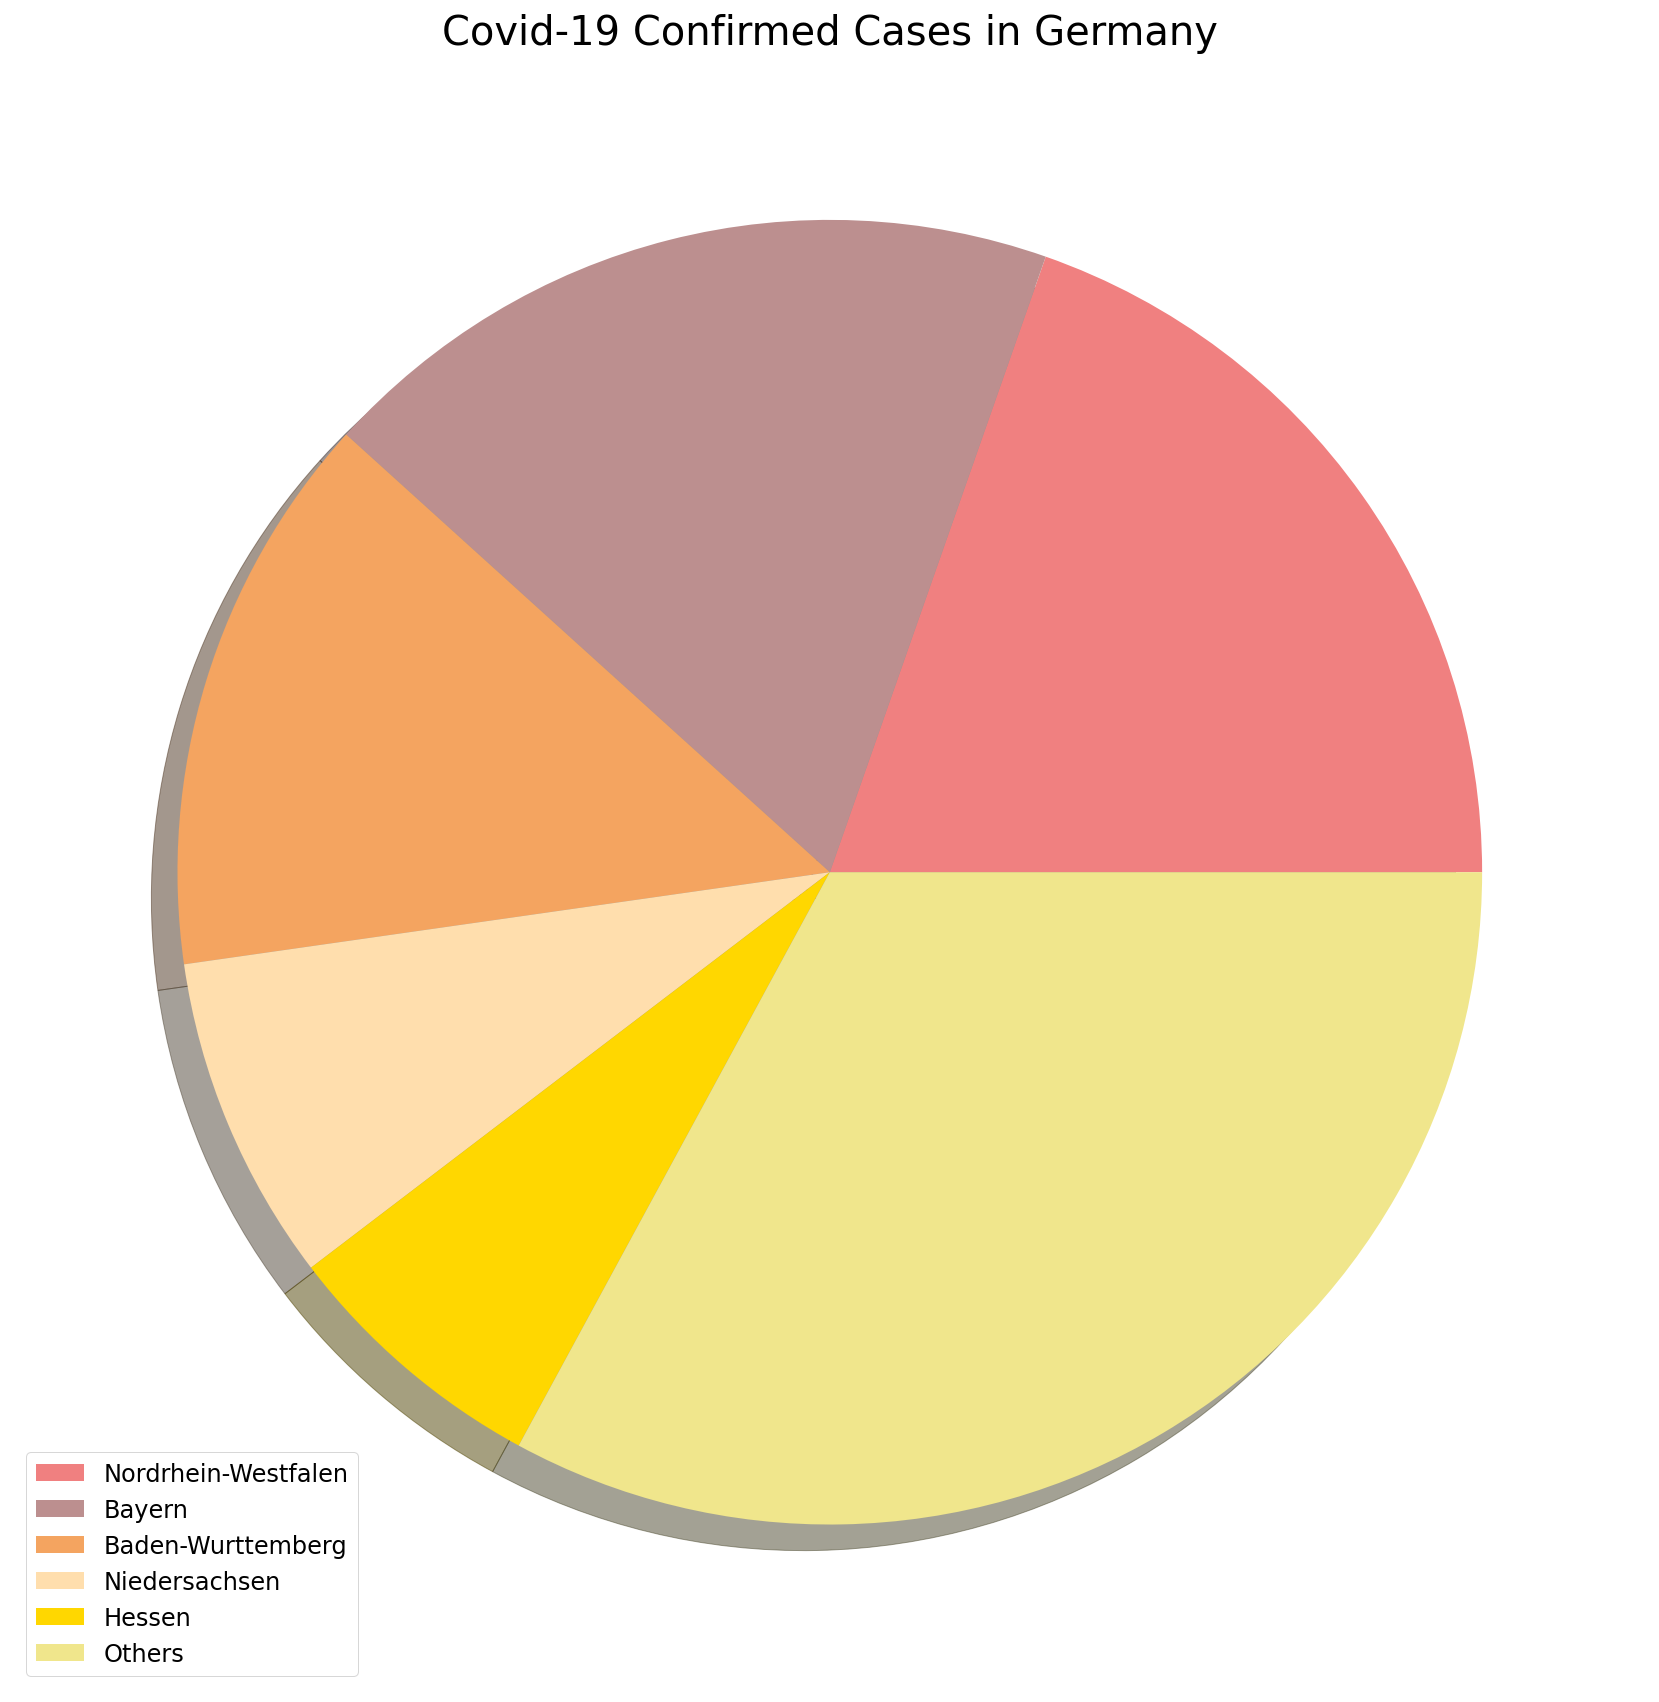

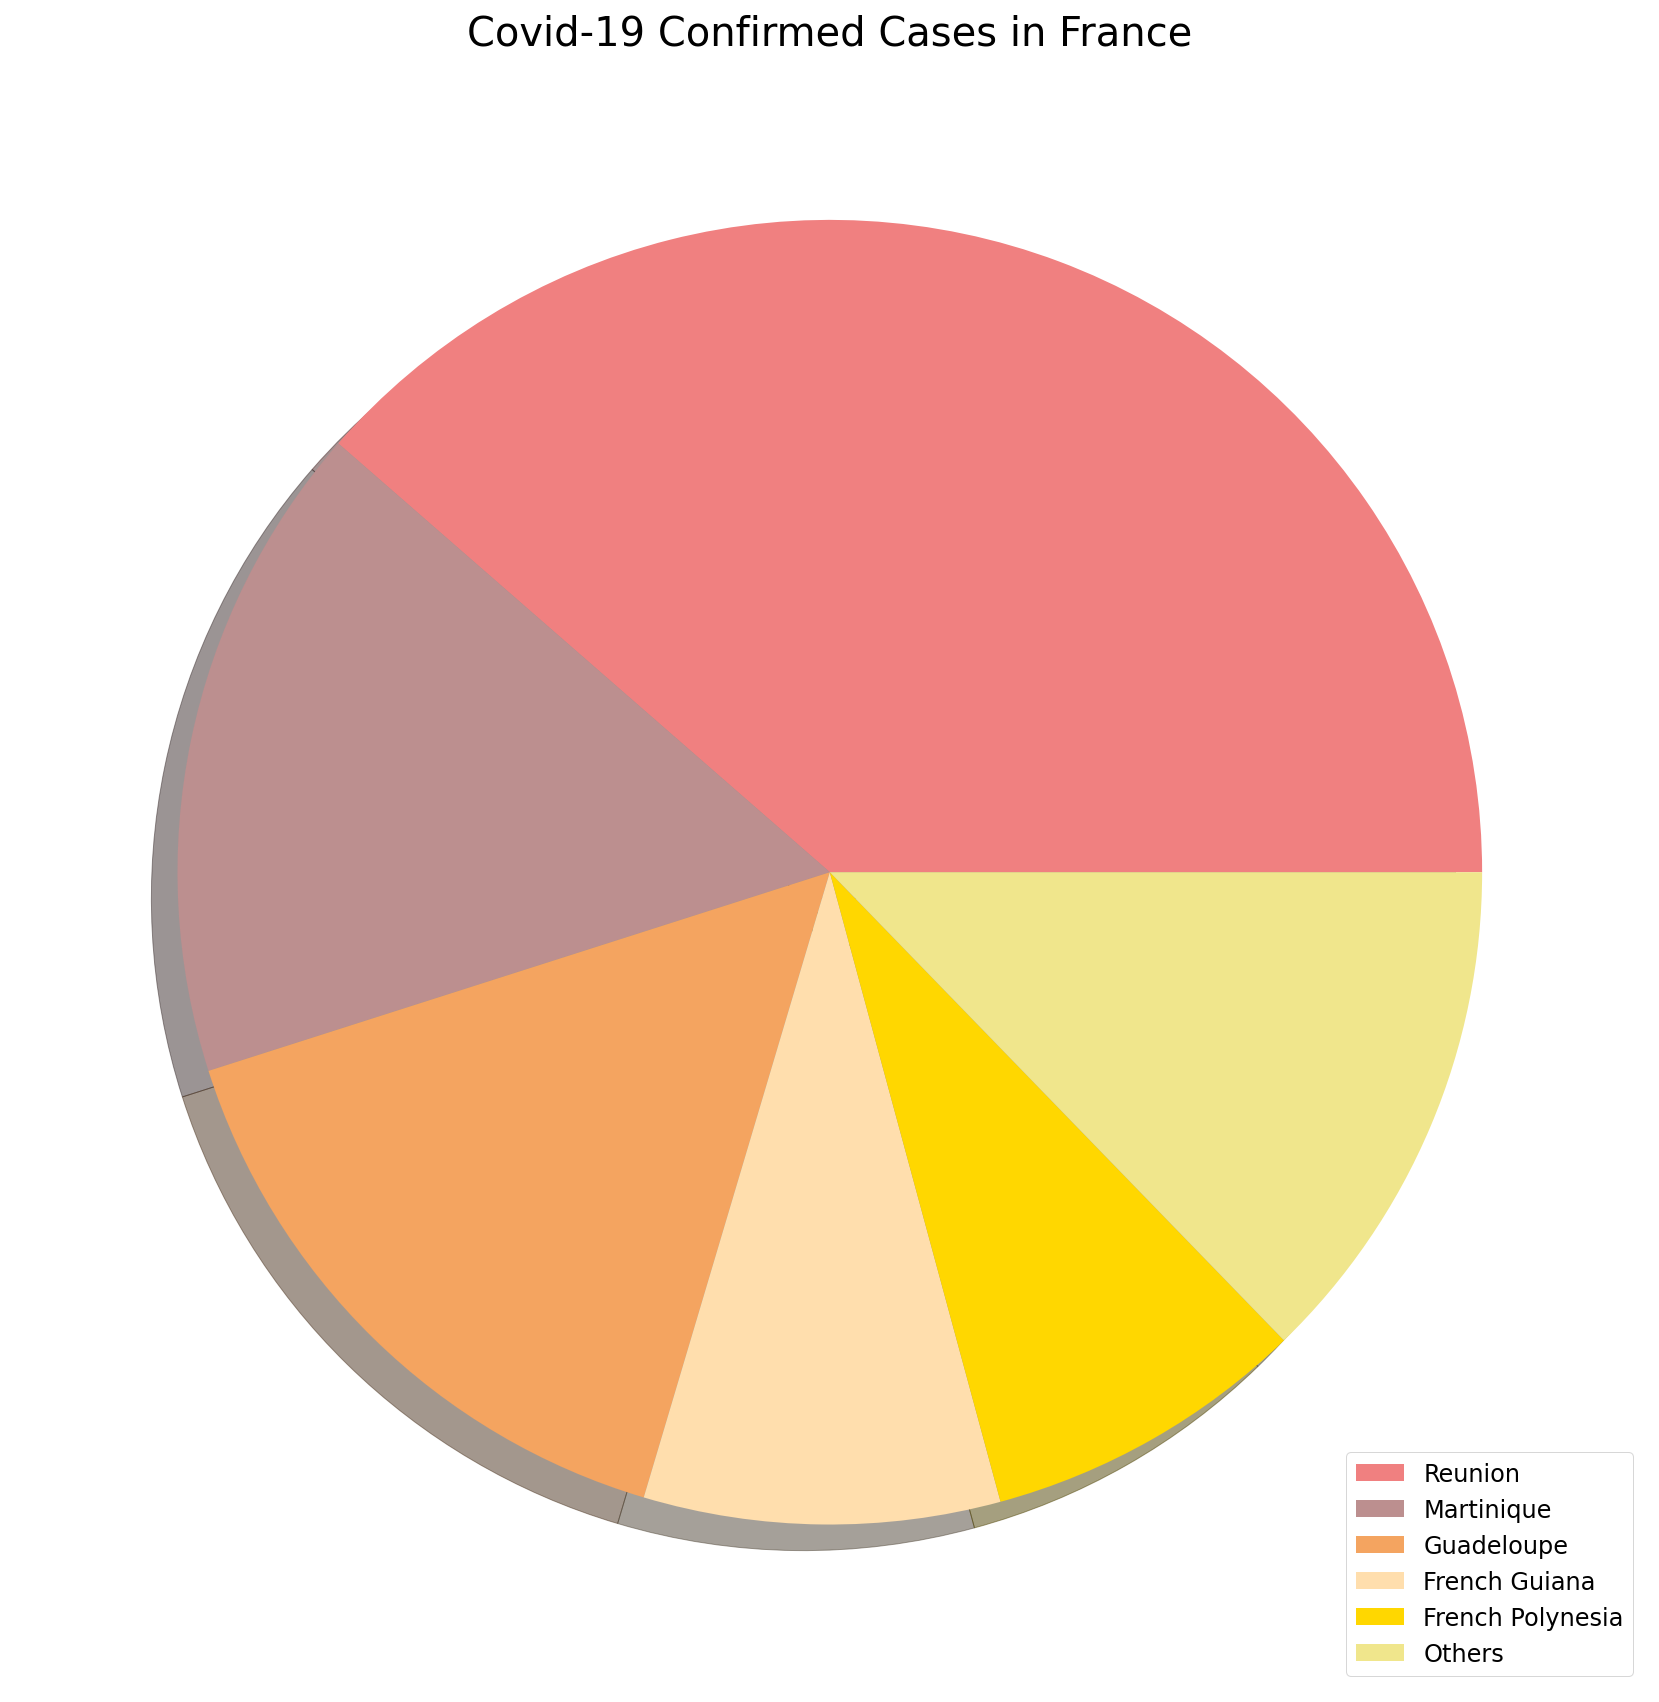

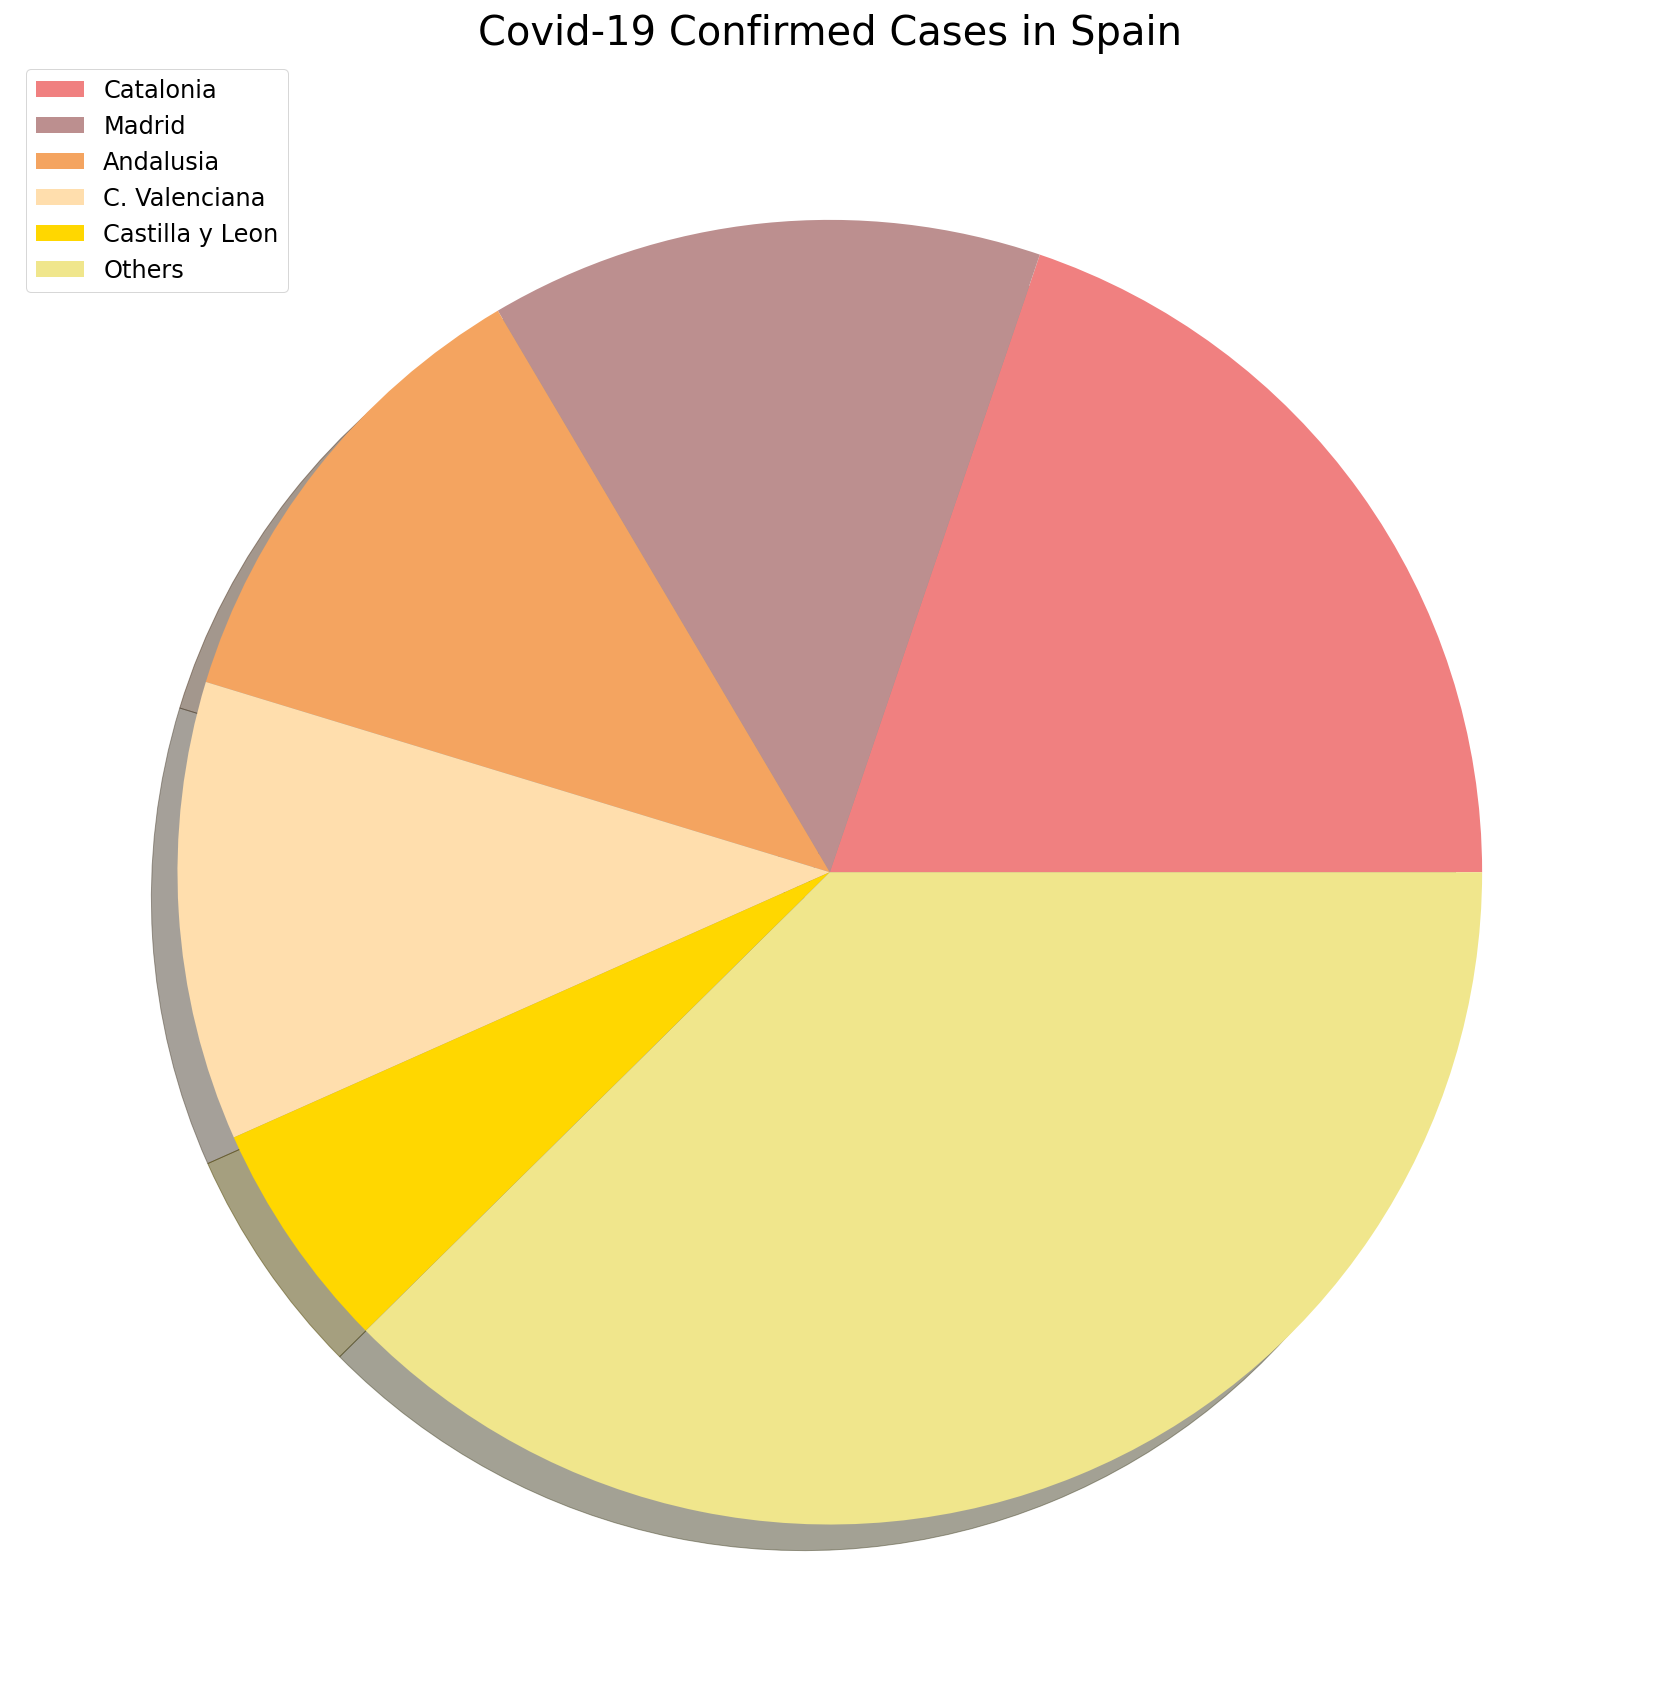

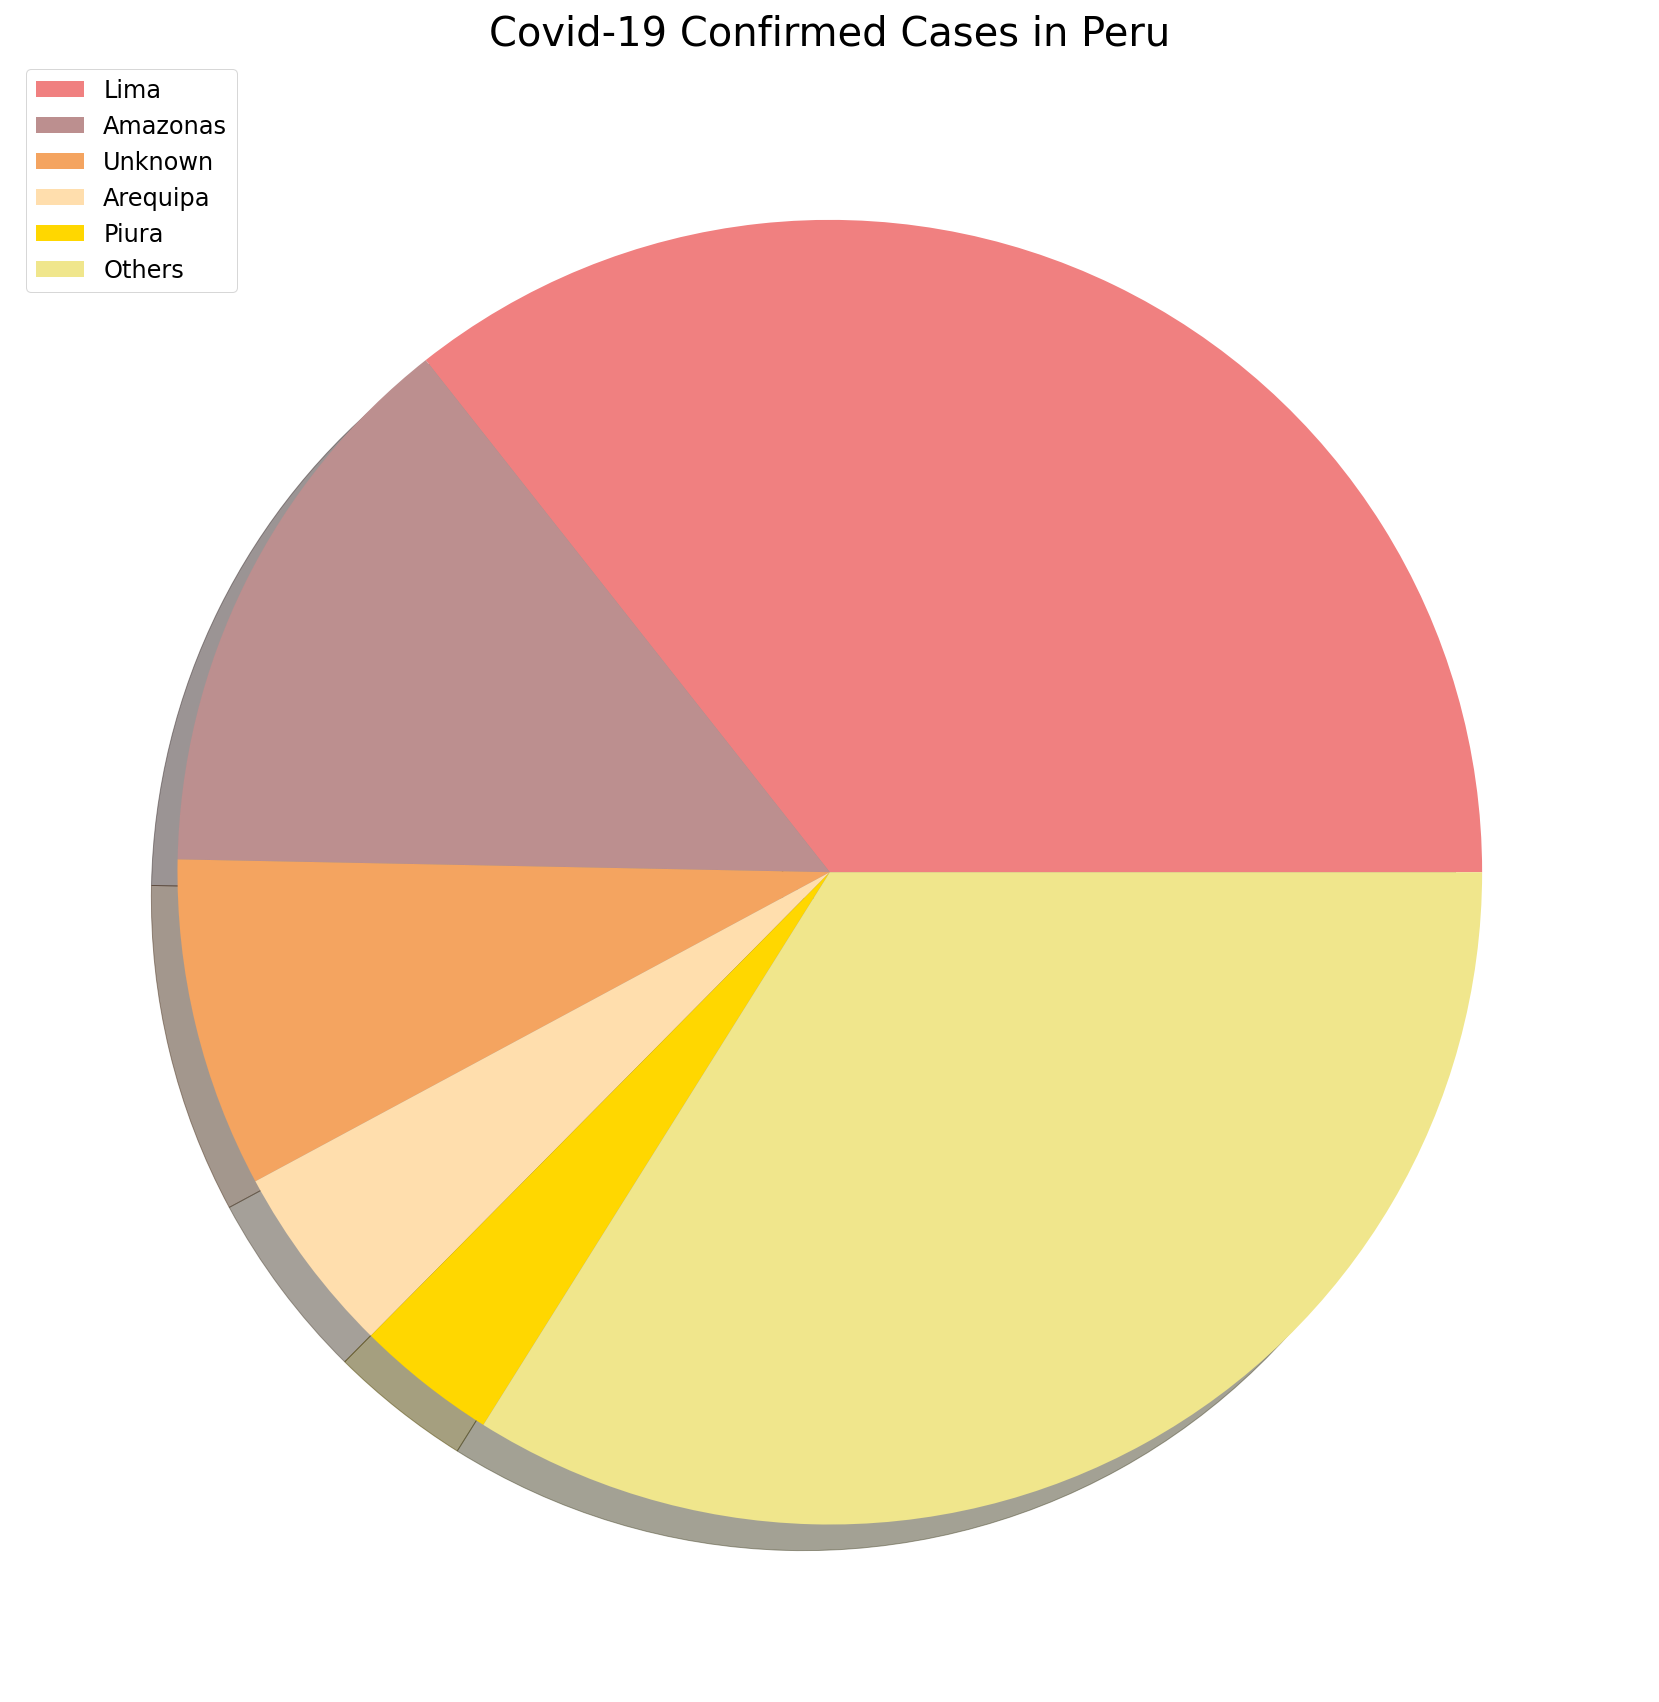

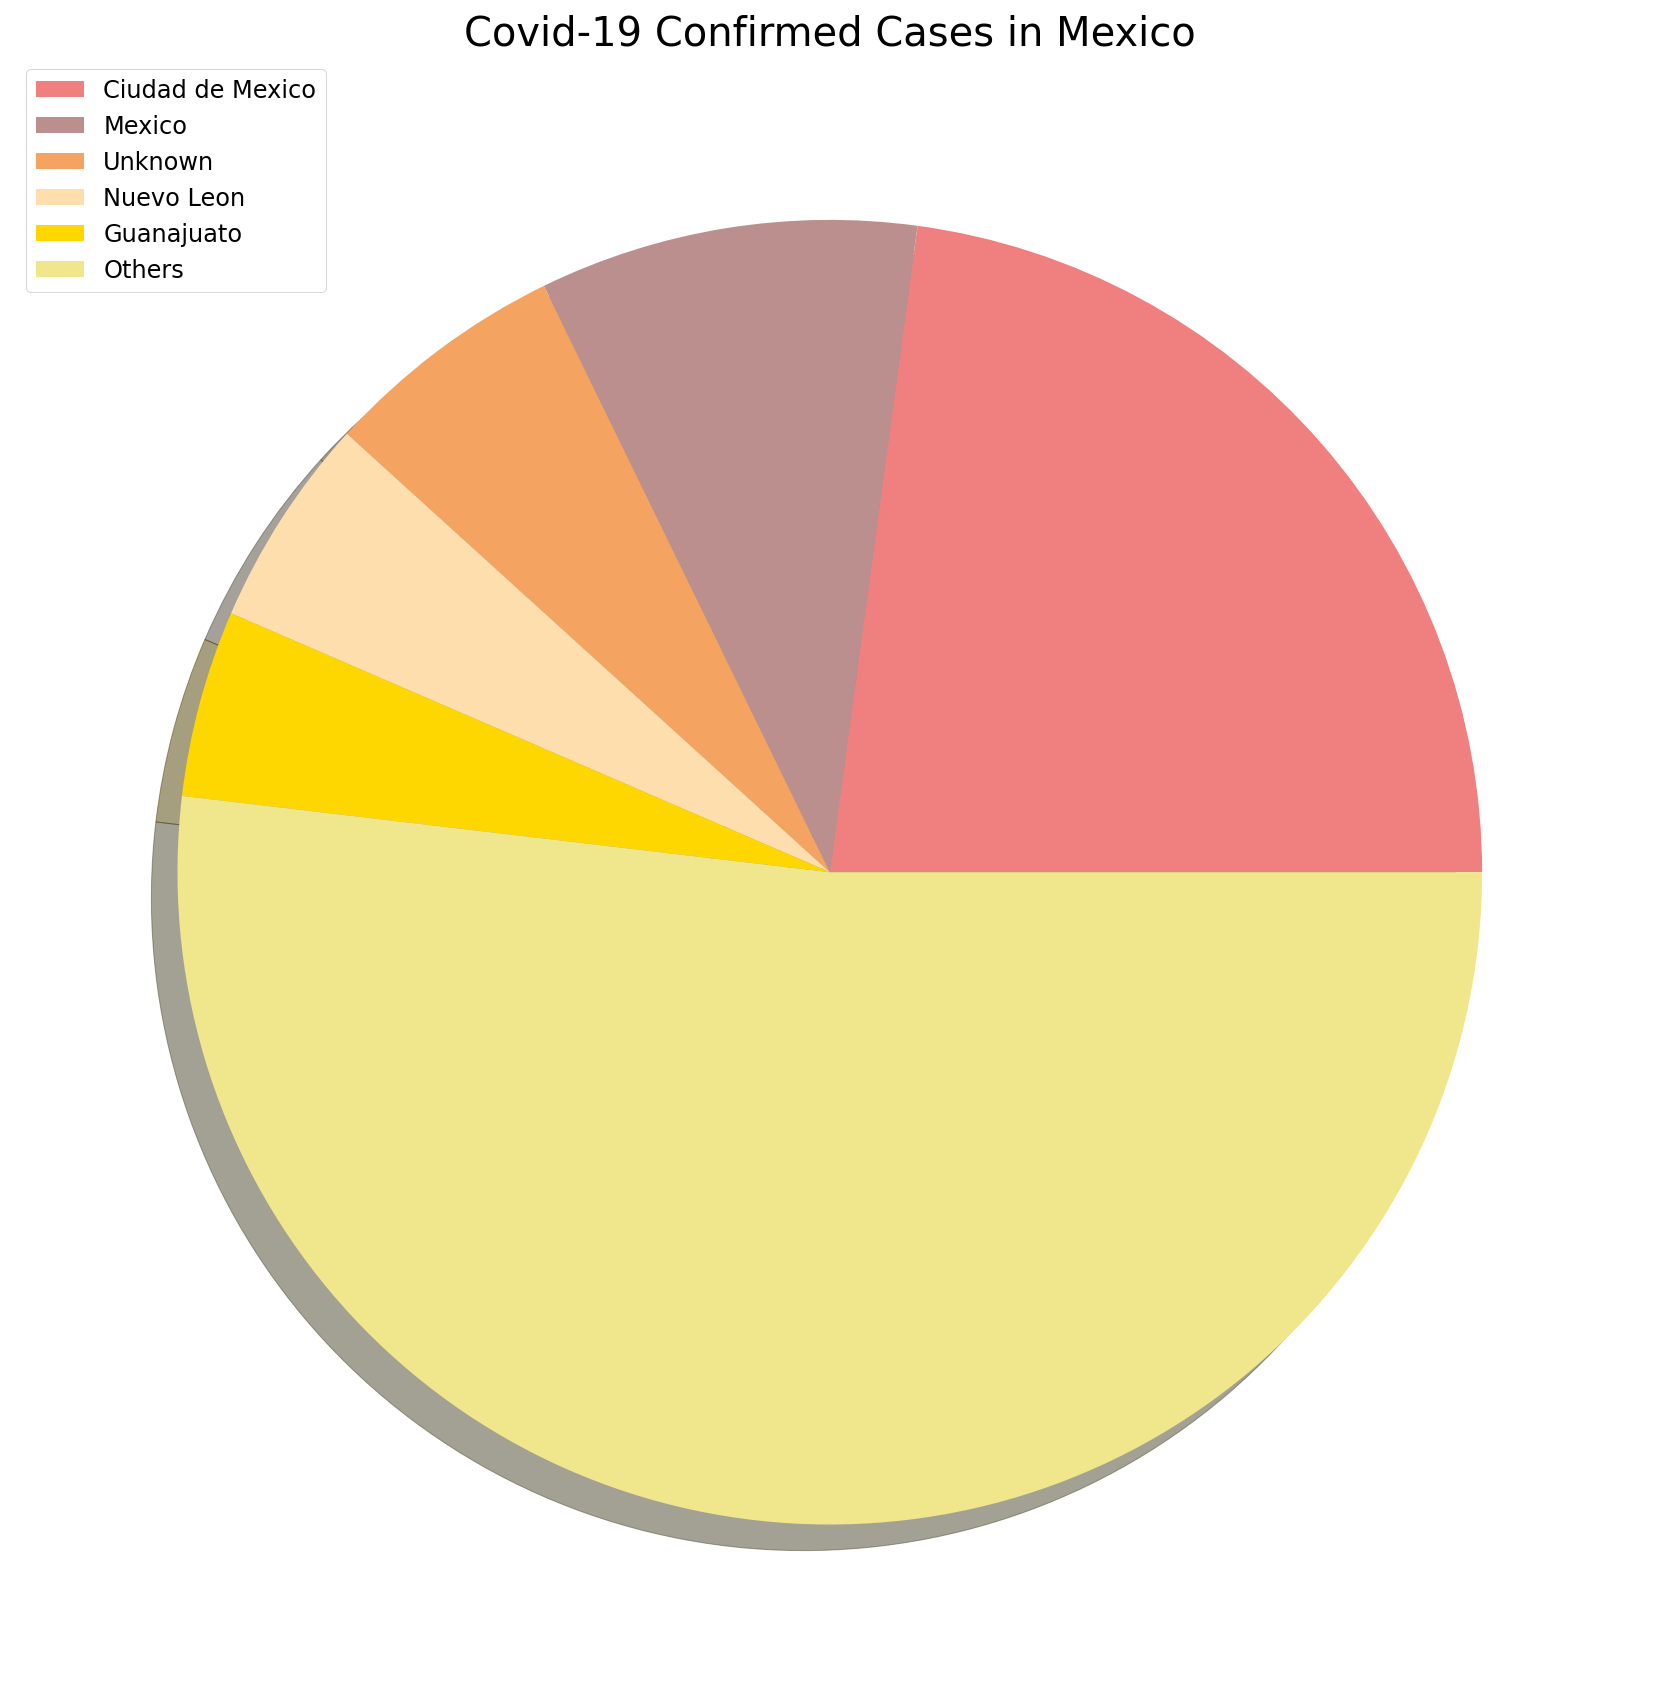

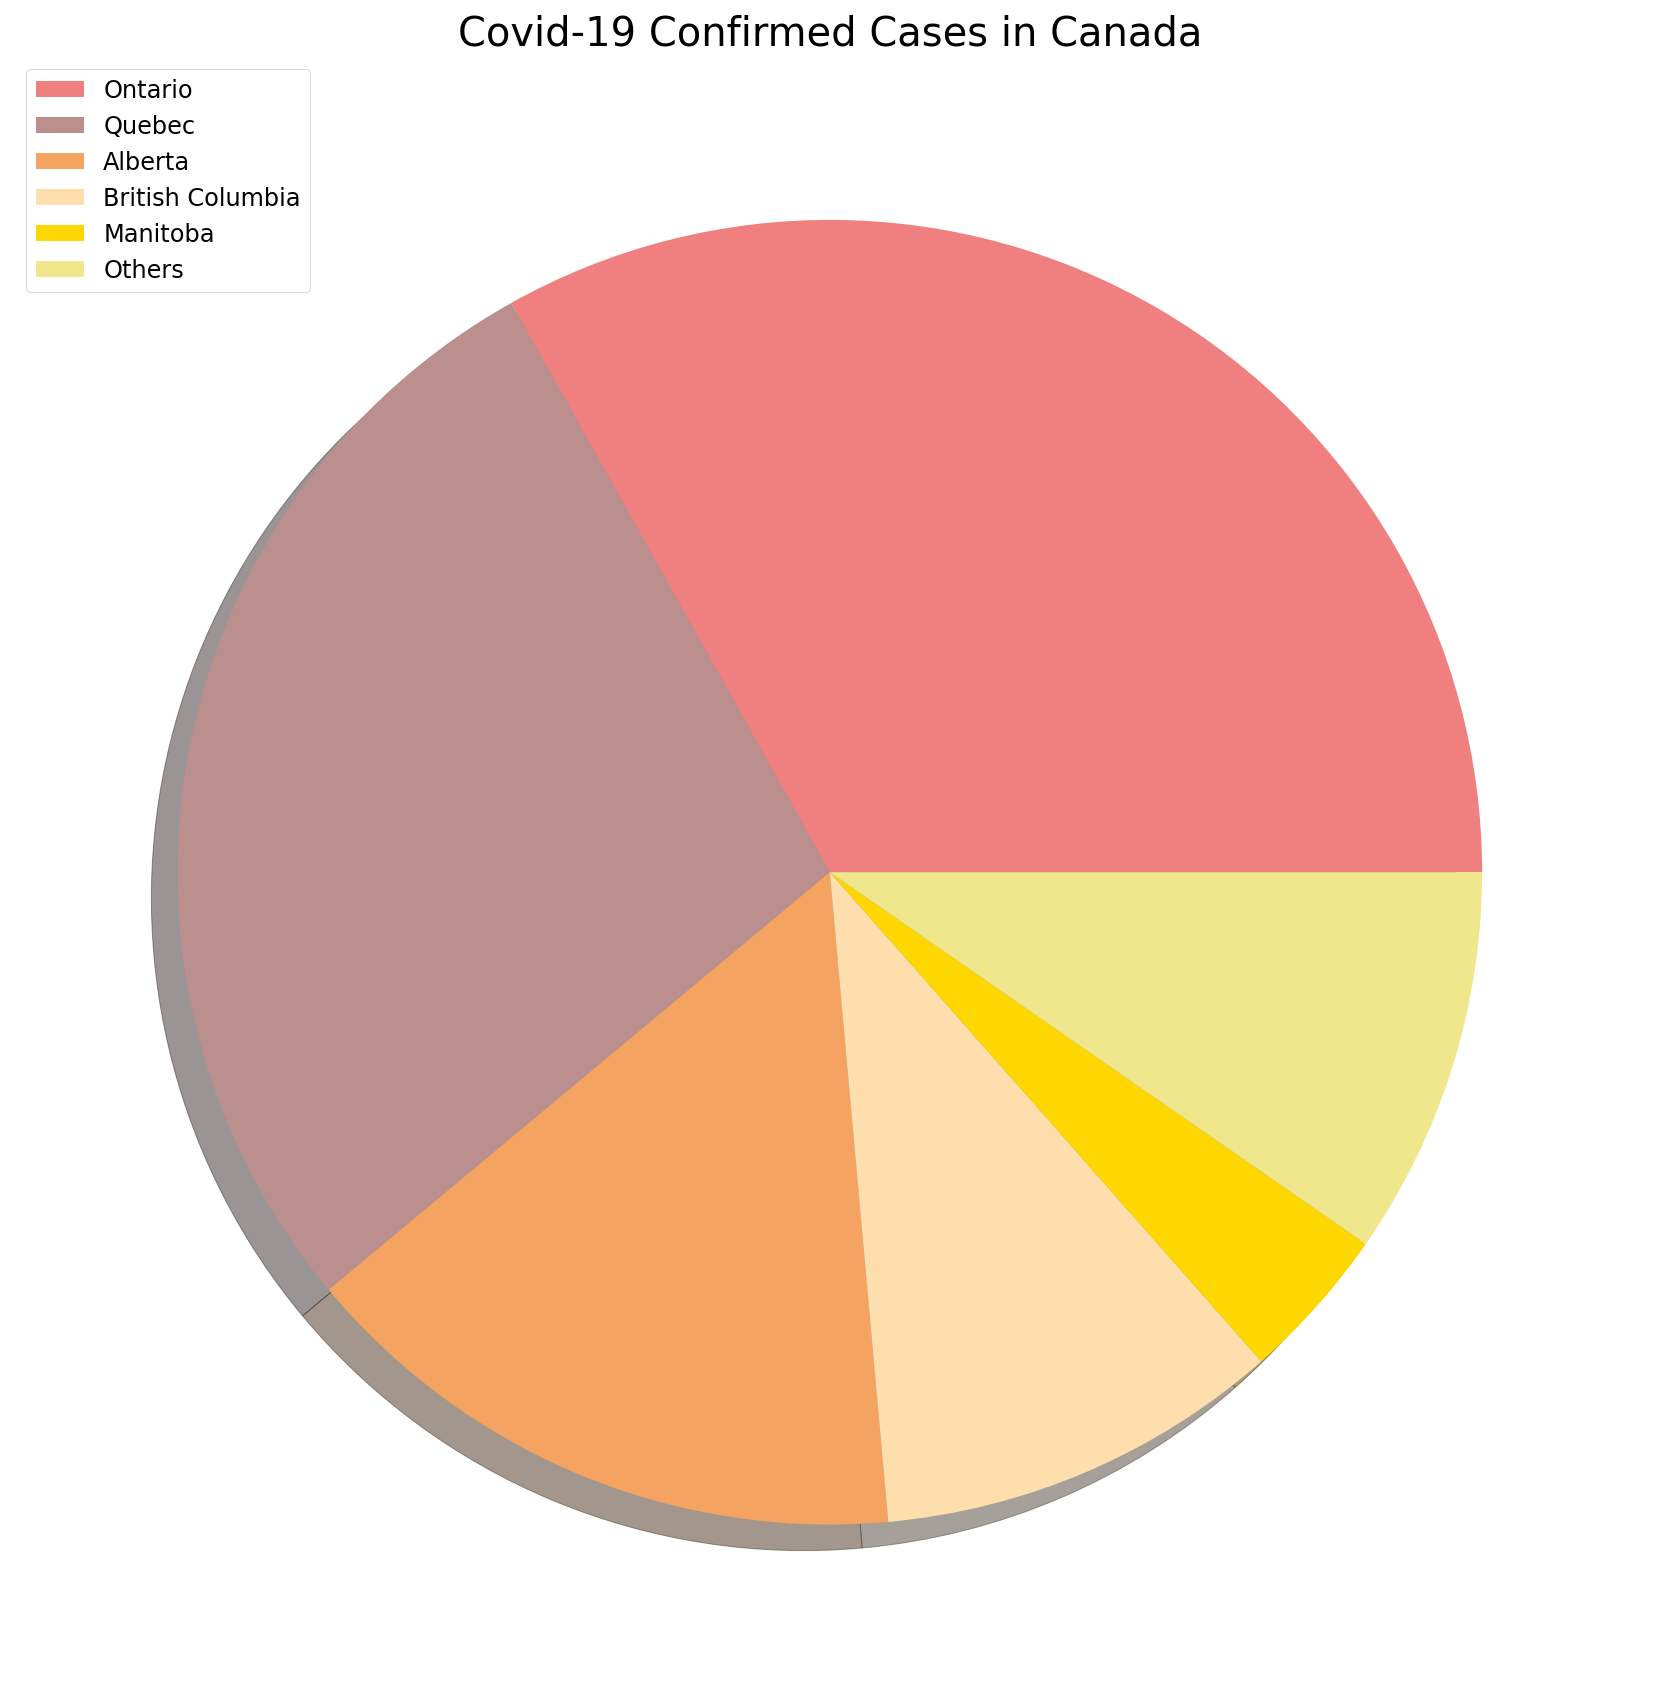

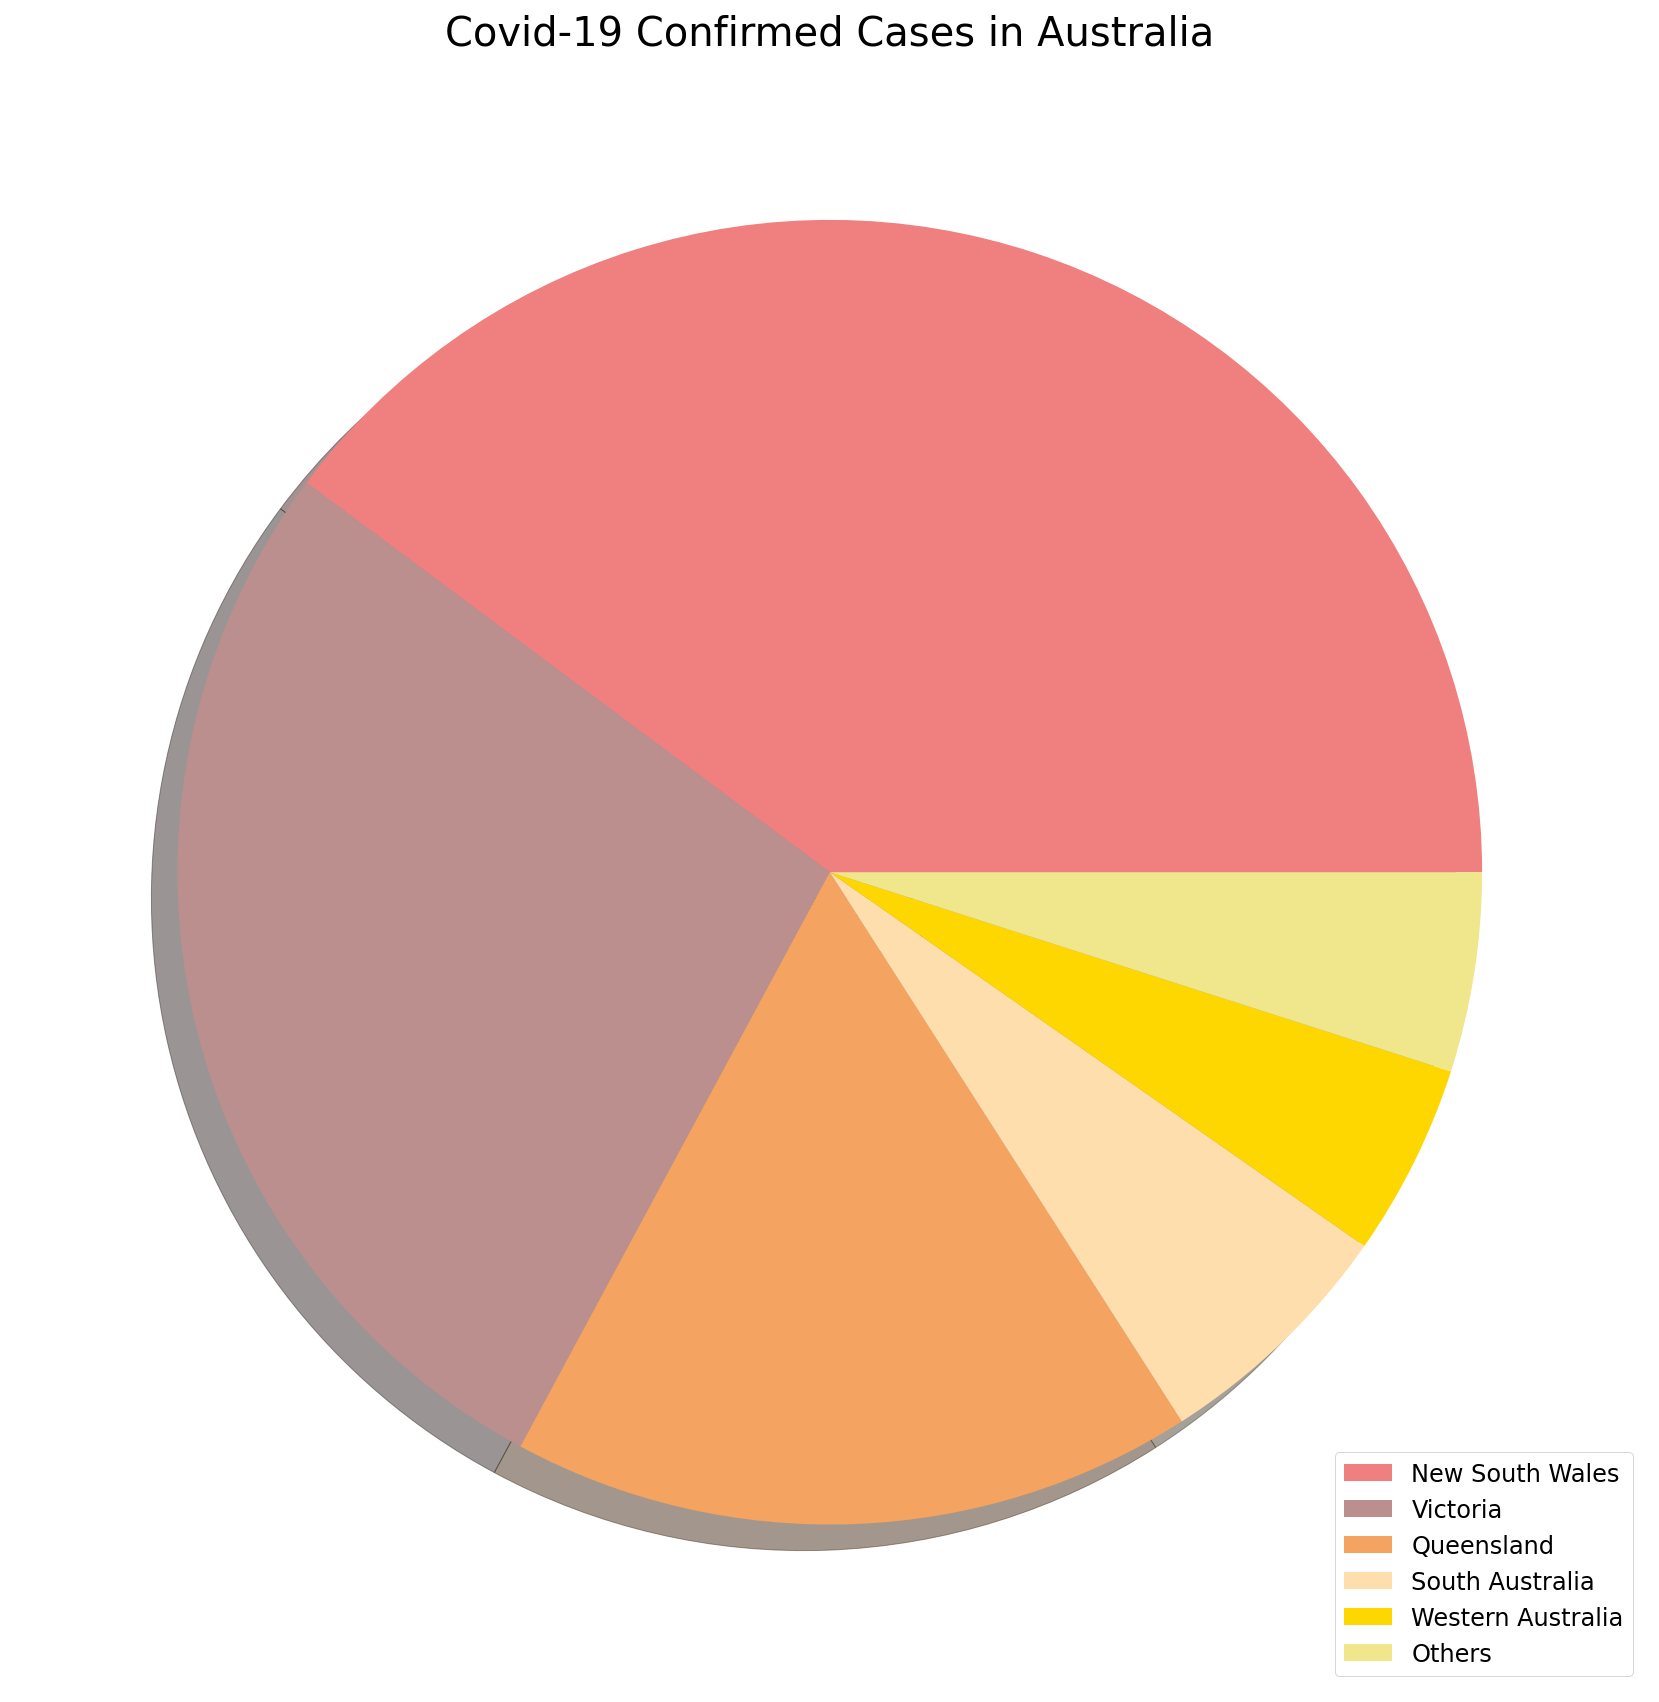

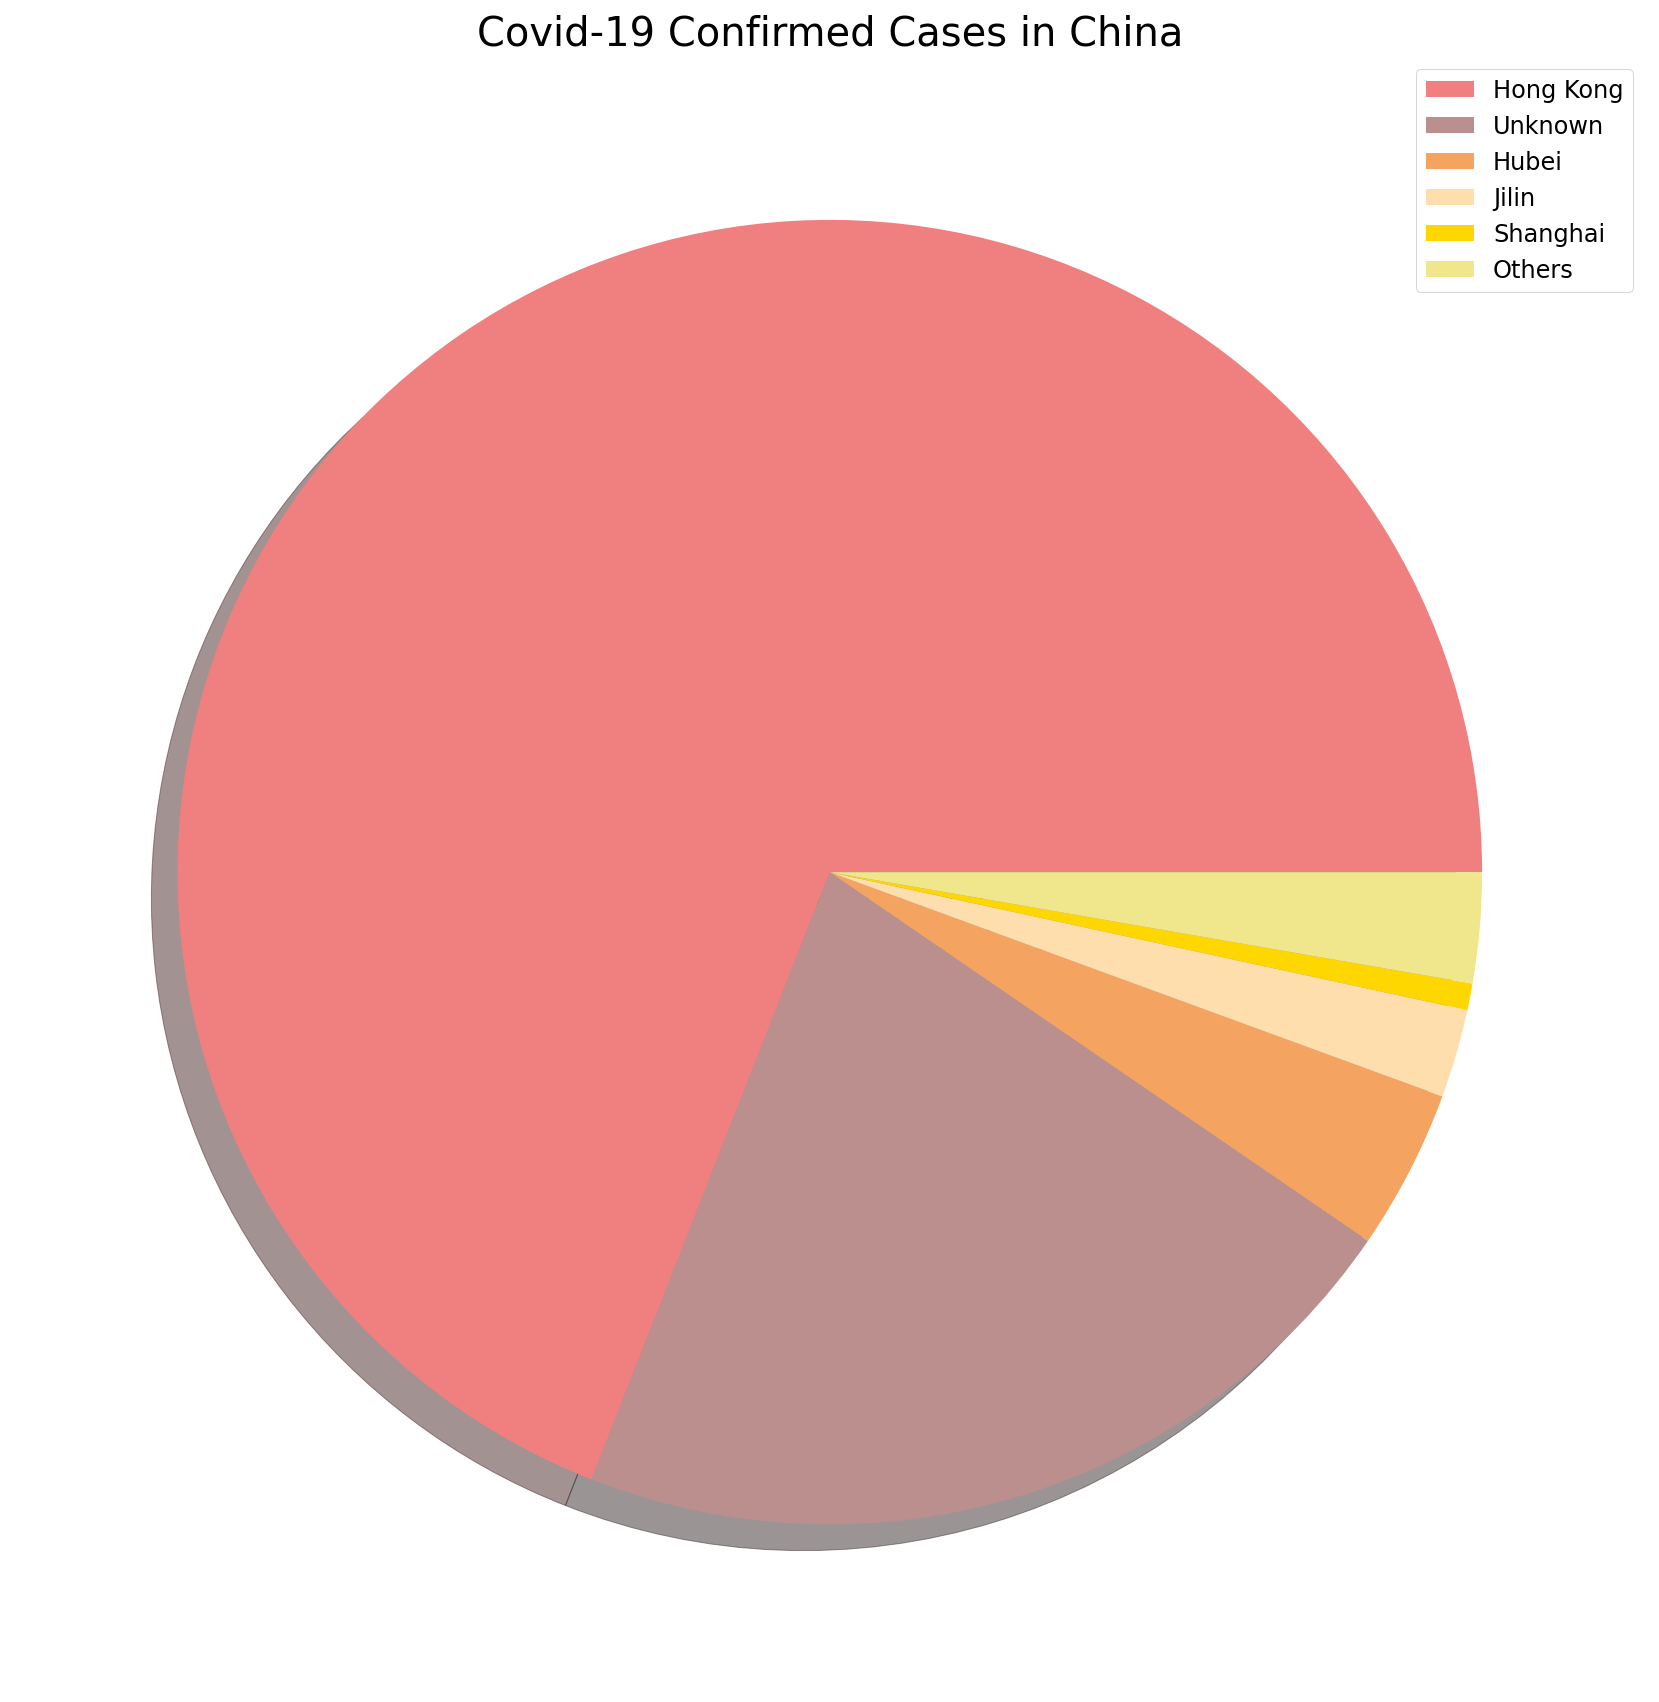

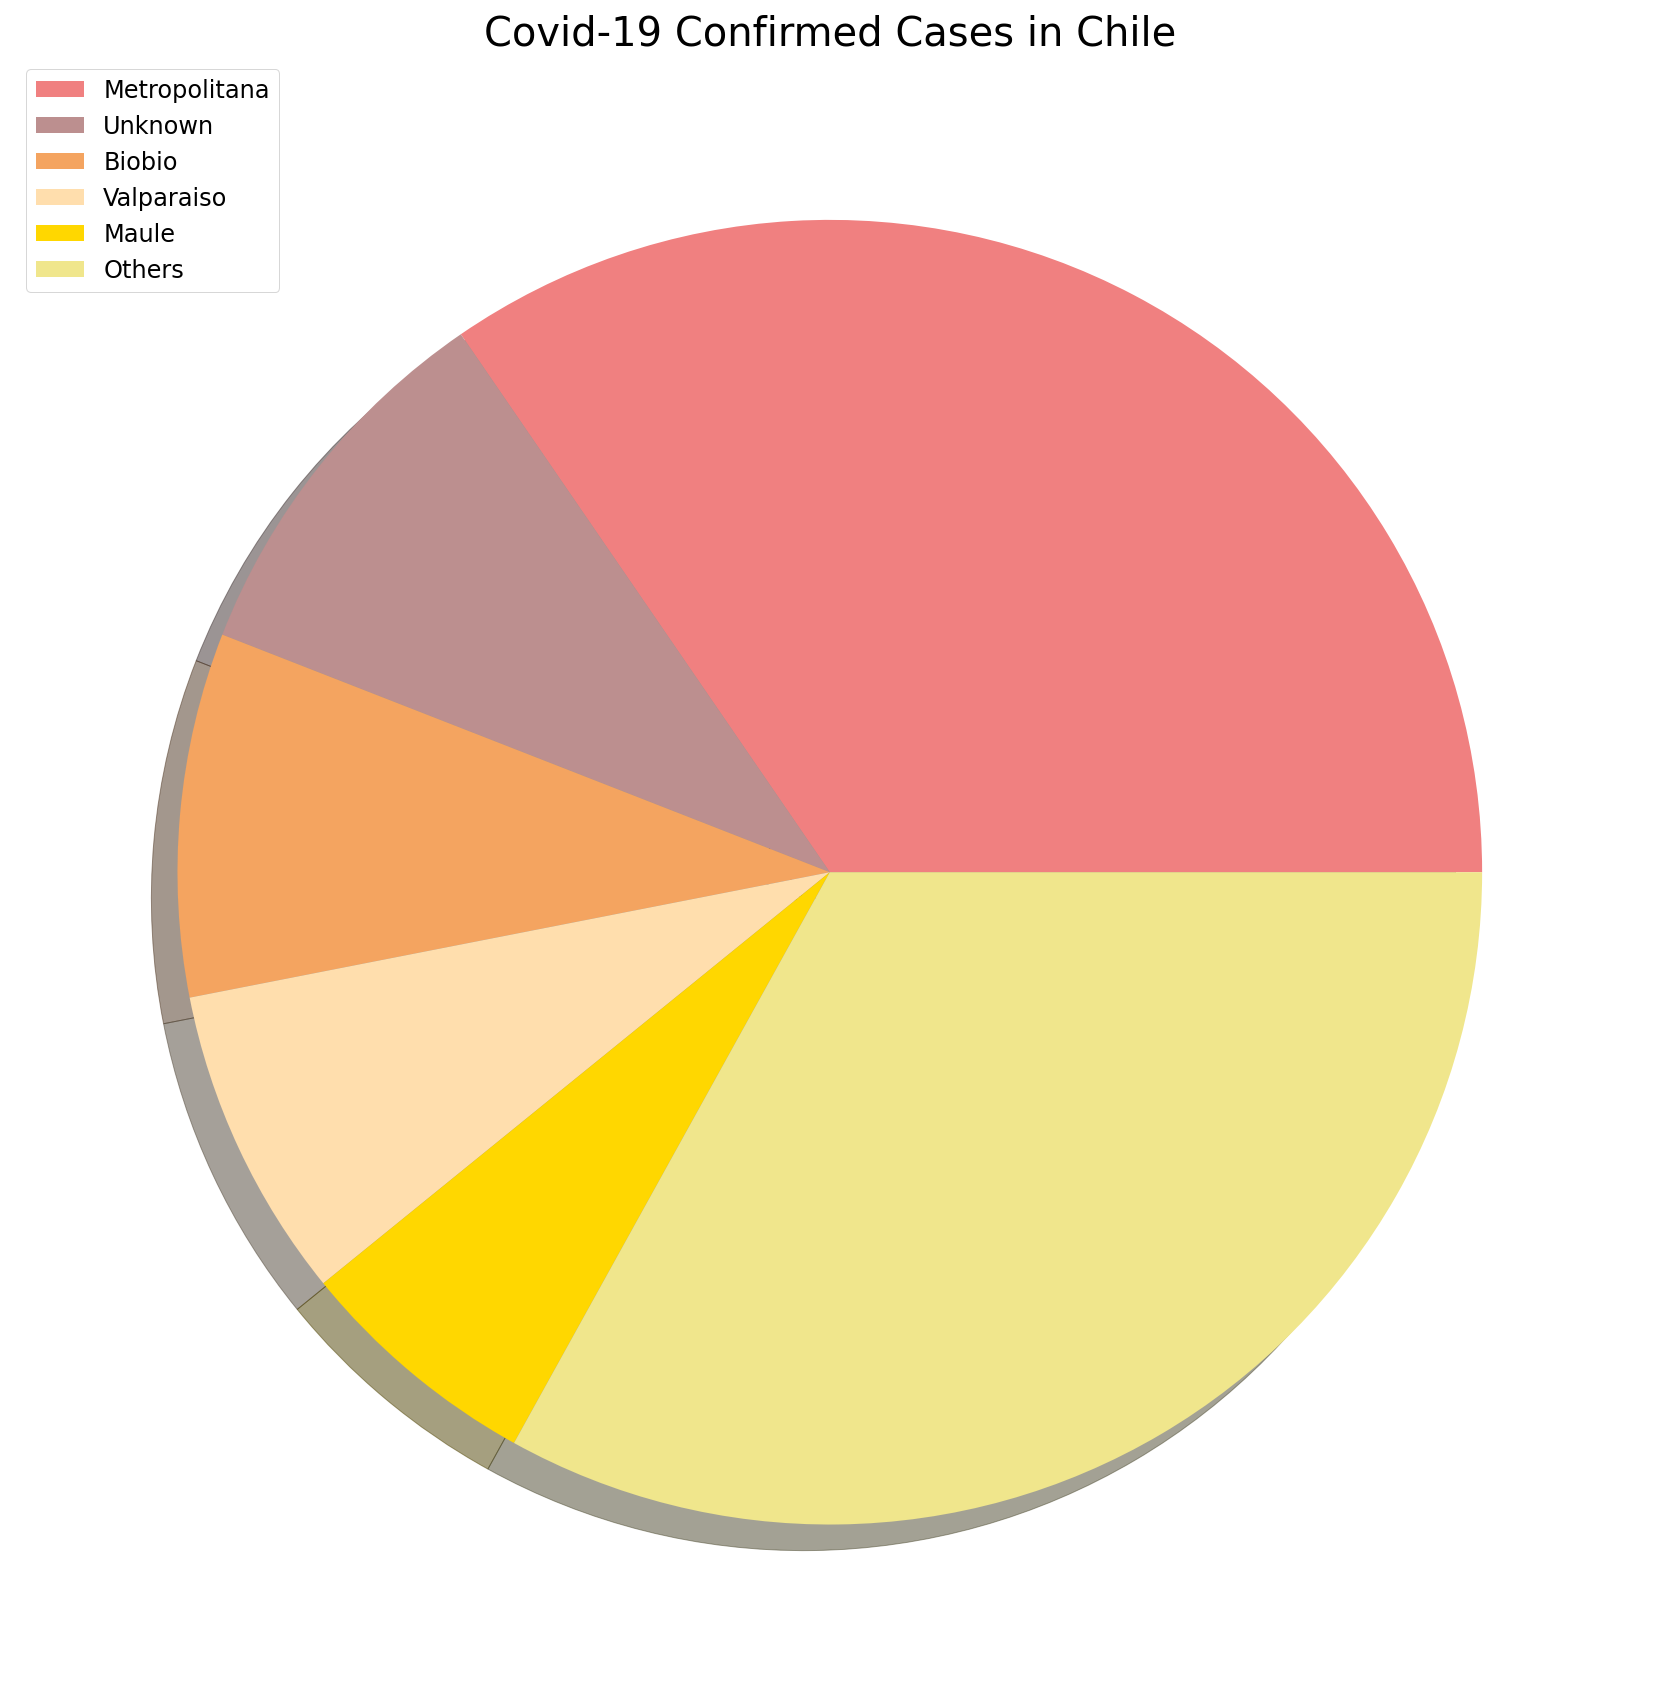

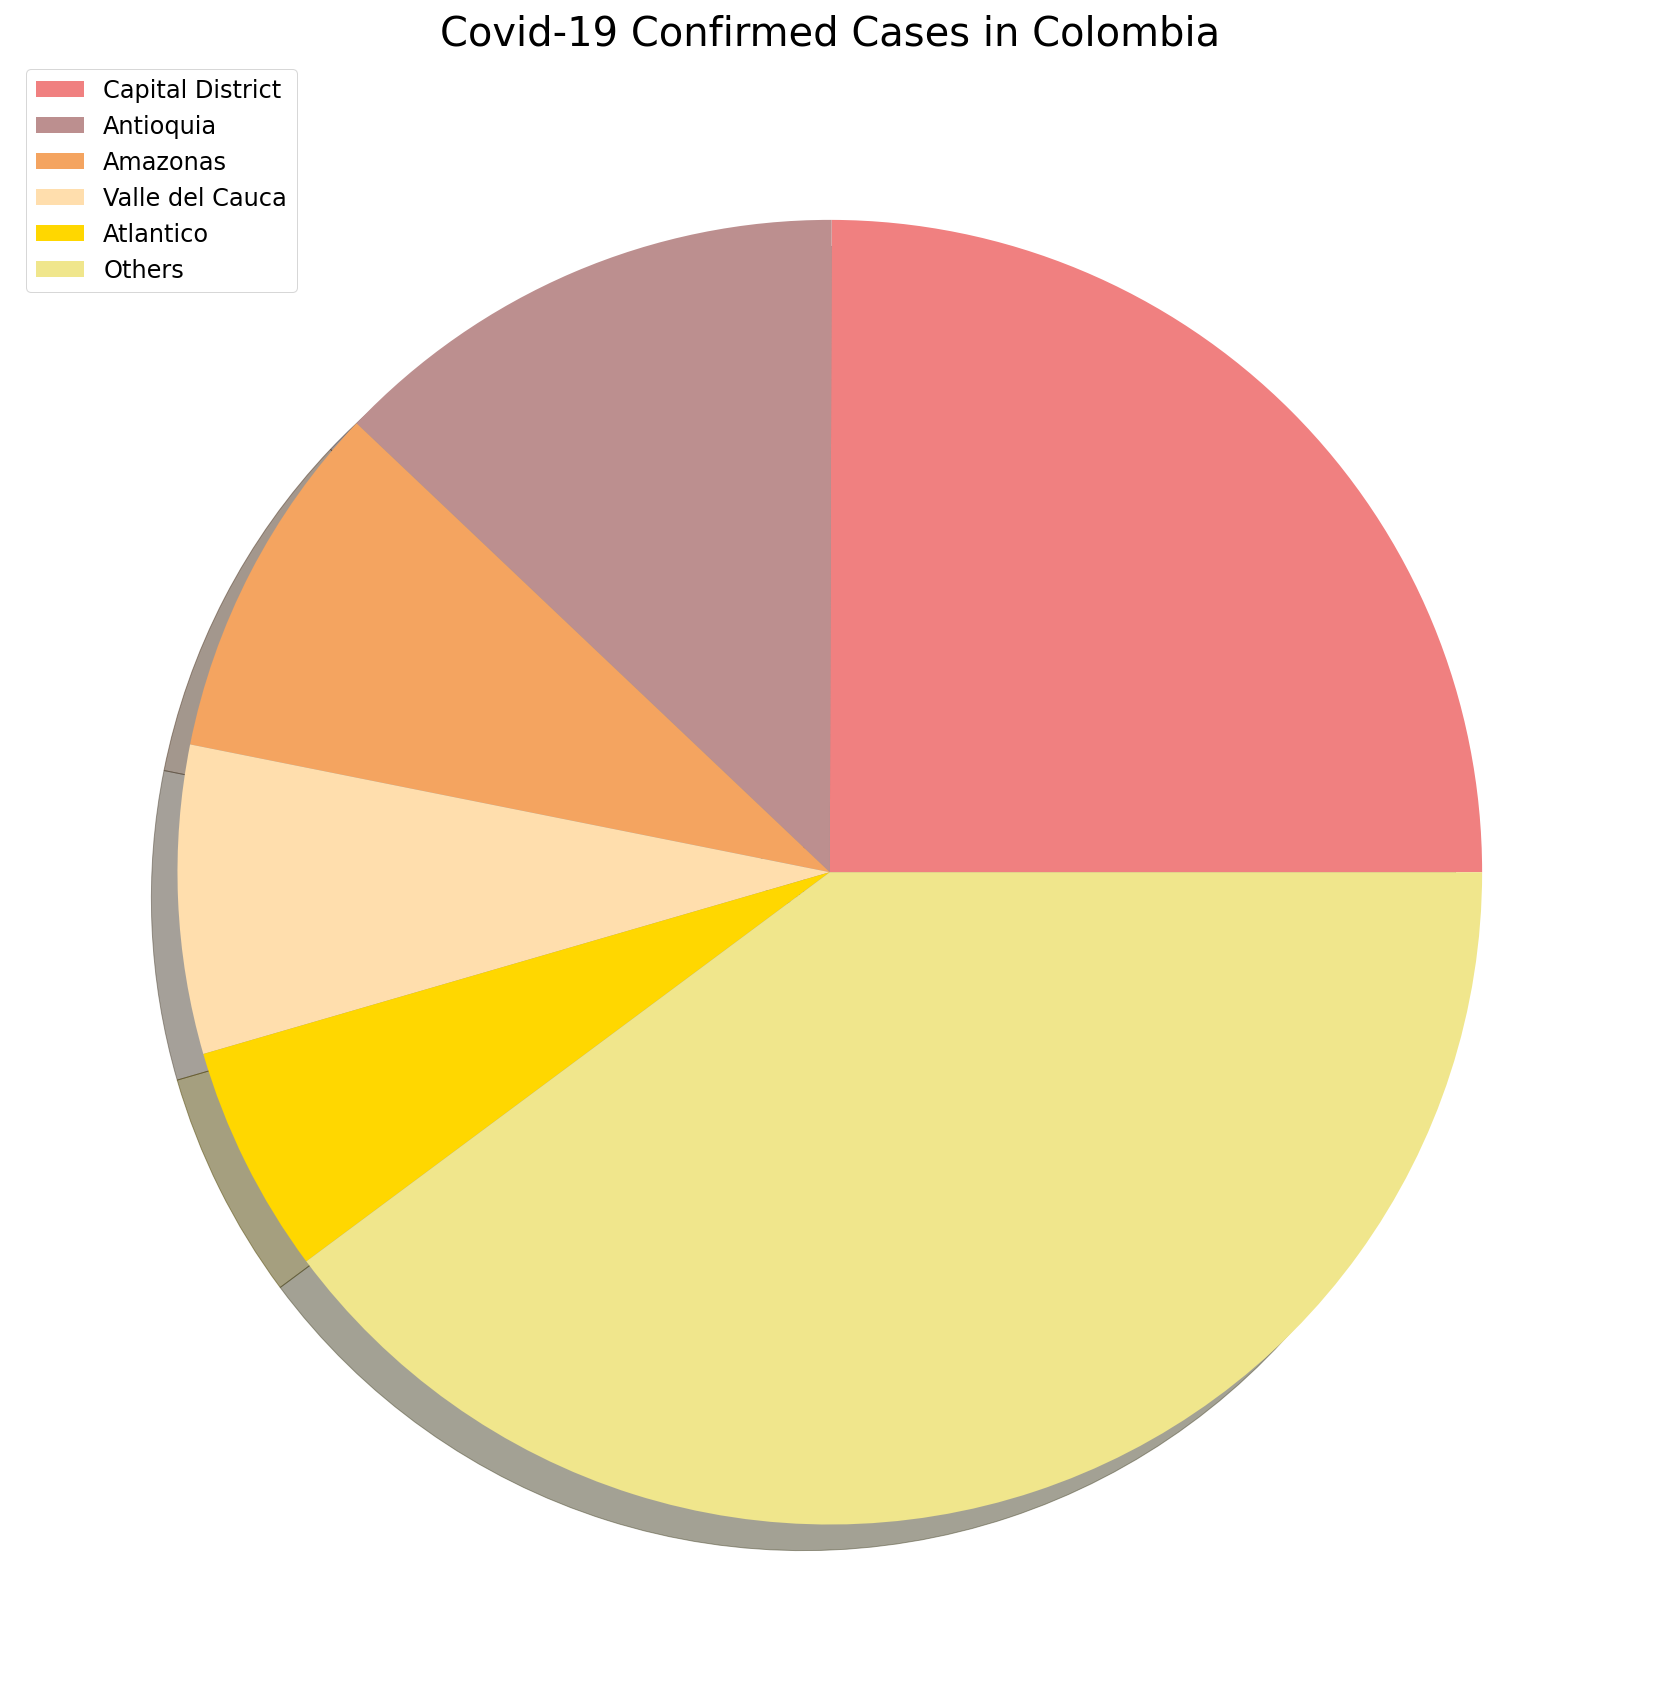

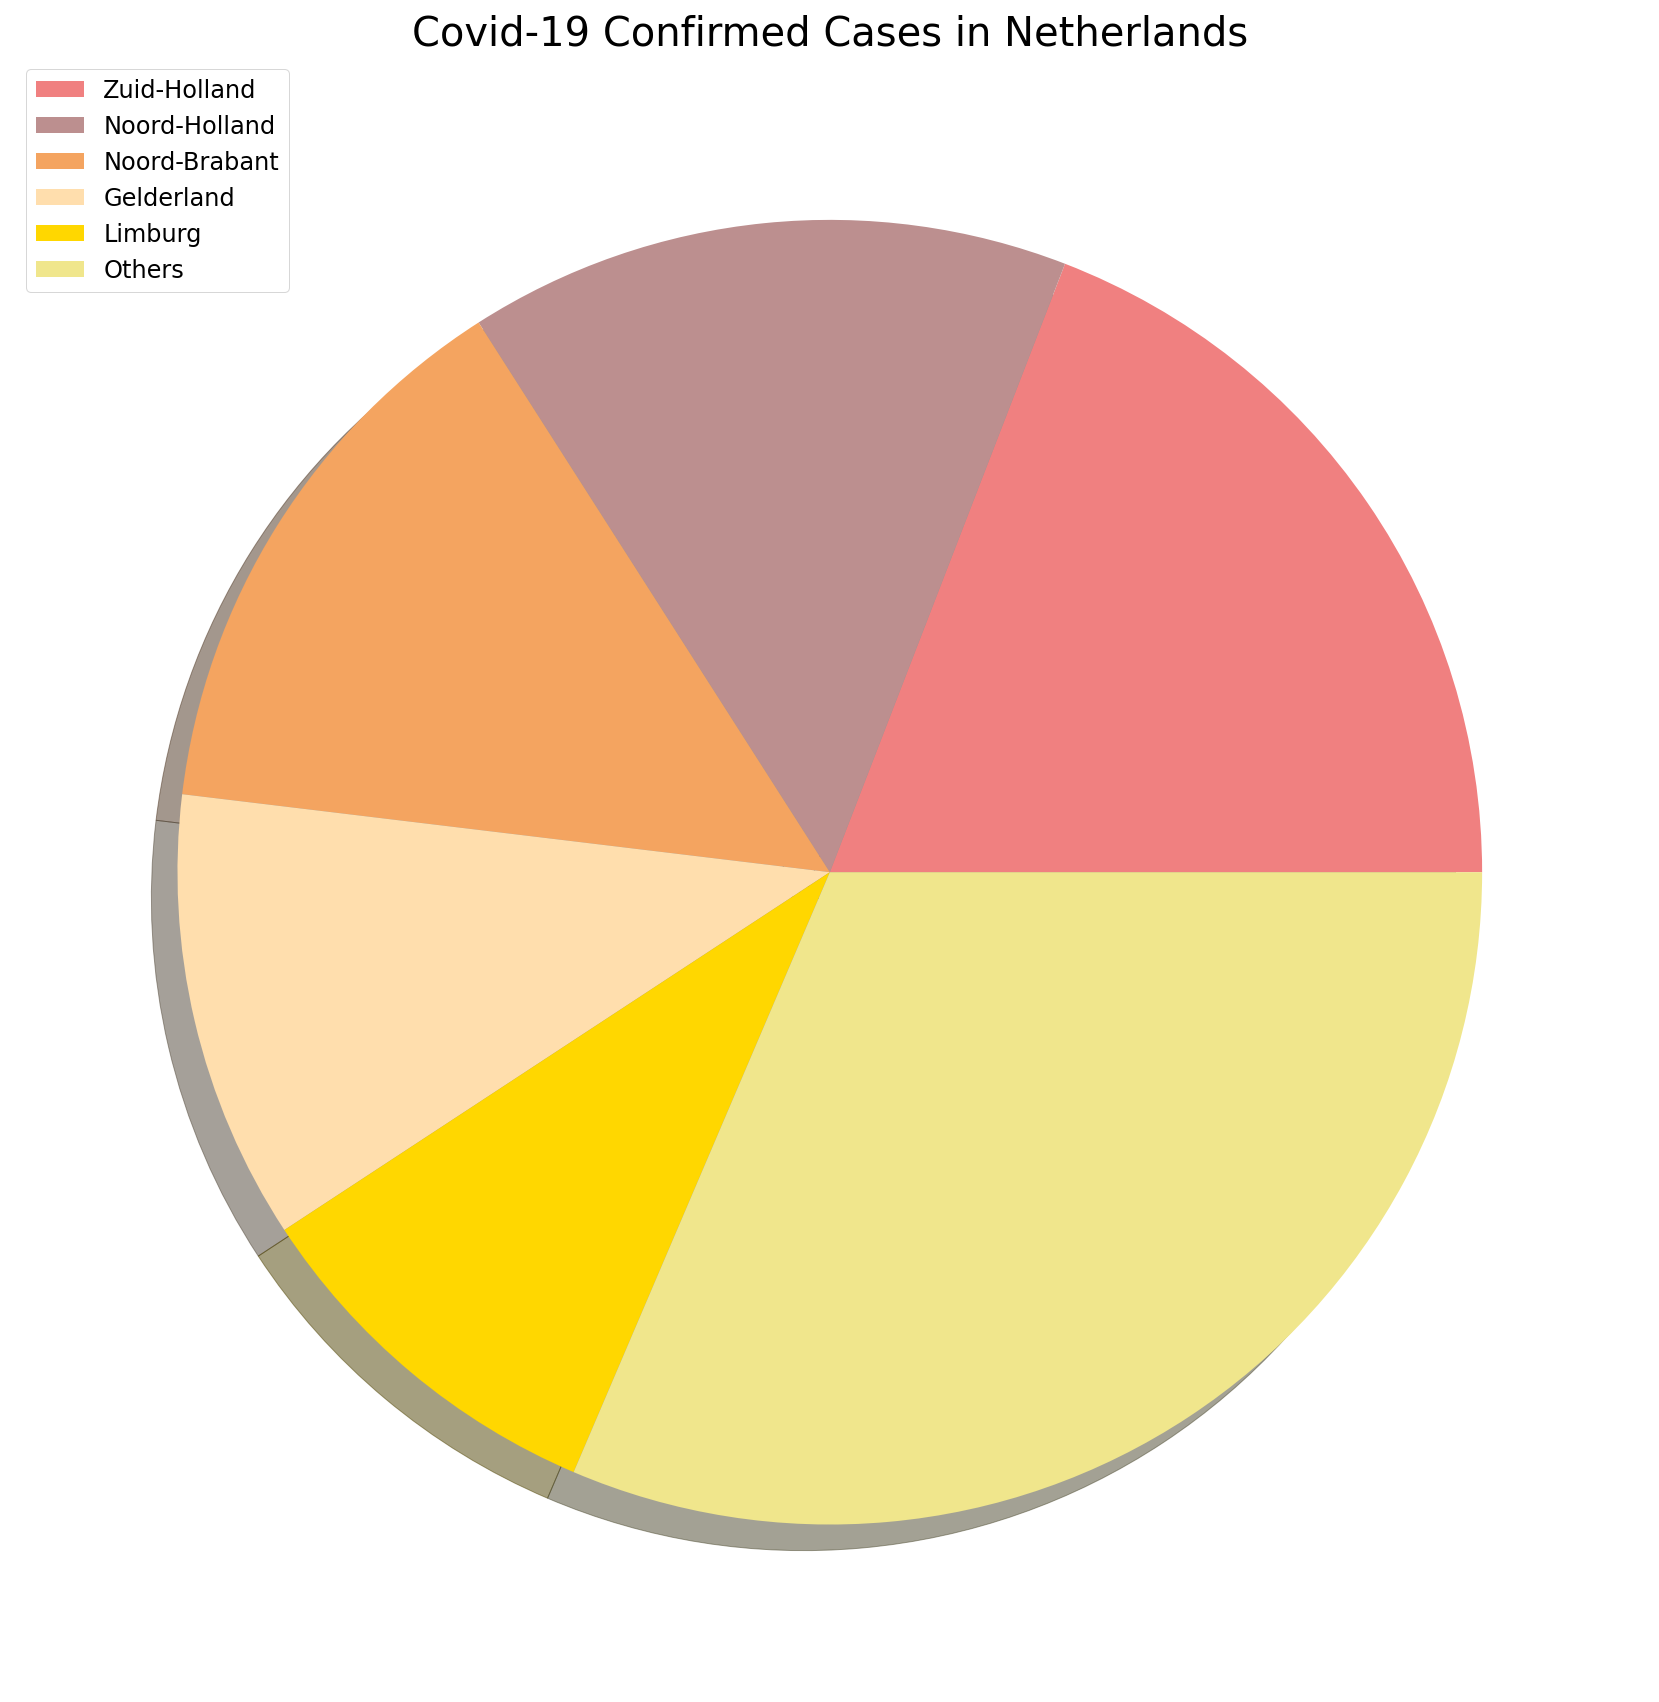

In [ ]:
pie_chart_countries = ['US', 'Brazil', 'Russia', 'India', 'United Kingdom', 'Italy', 'Germany', 'France', 'Spain', 'Peru', 'Mexico', 'Canada', 
                       'Australia', 'China', 'Chile', 'Colombia', 'Netherlands']

for i in pie_chart_countries:
    plot_pie_country_with_regions(i, 'Covid-19 Confirmed Cases in {}'.format(i))

<a id='hospital_testing'></a>
# US Medical Data on Testing 
This gives us some information on US coronavirus testing, which is important for getting a clear picture of the pandemic.

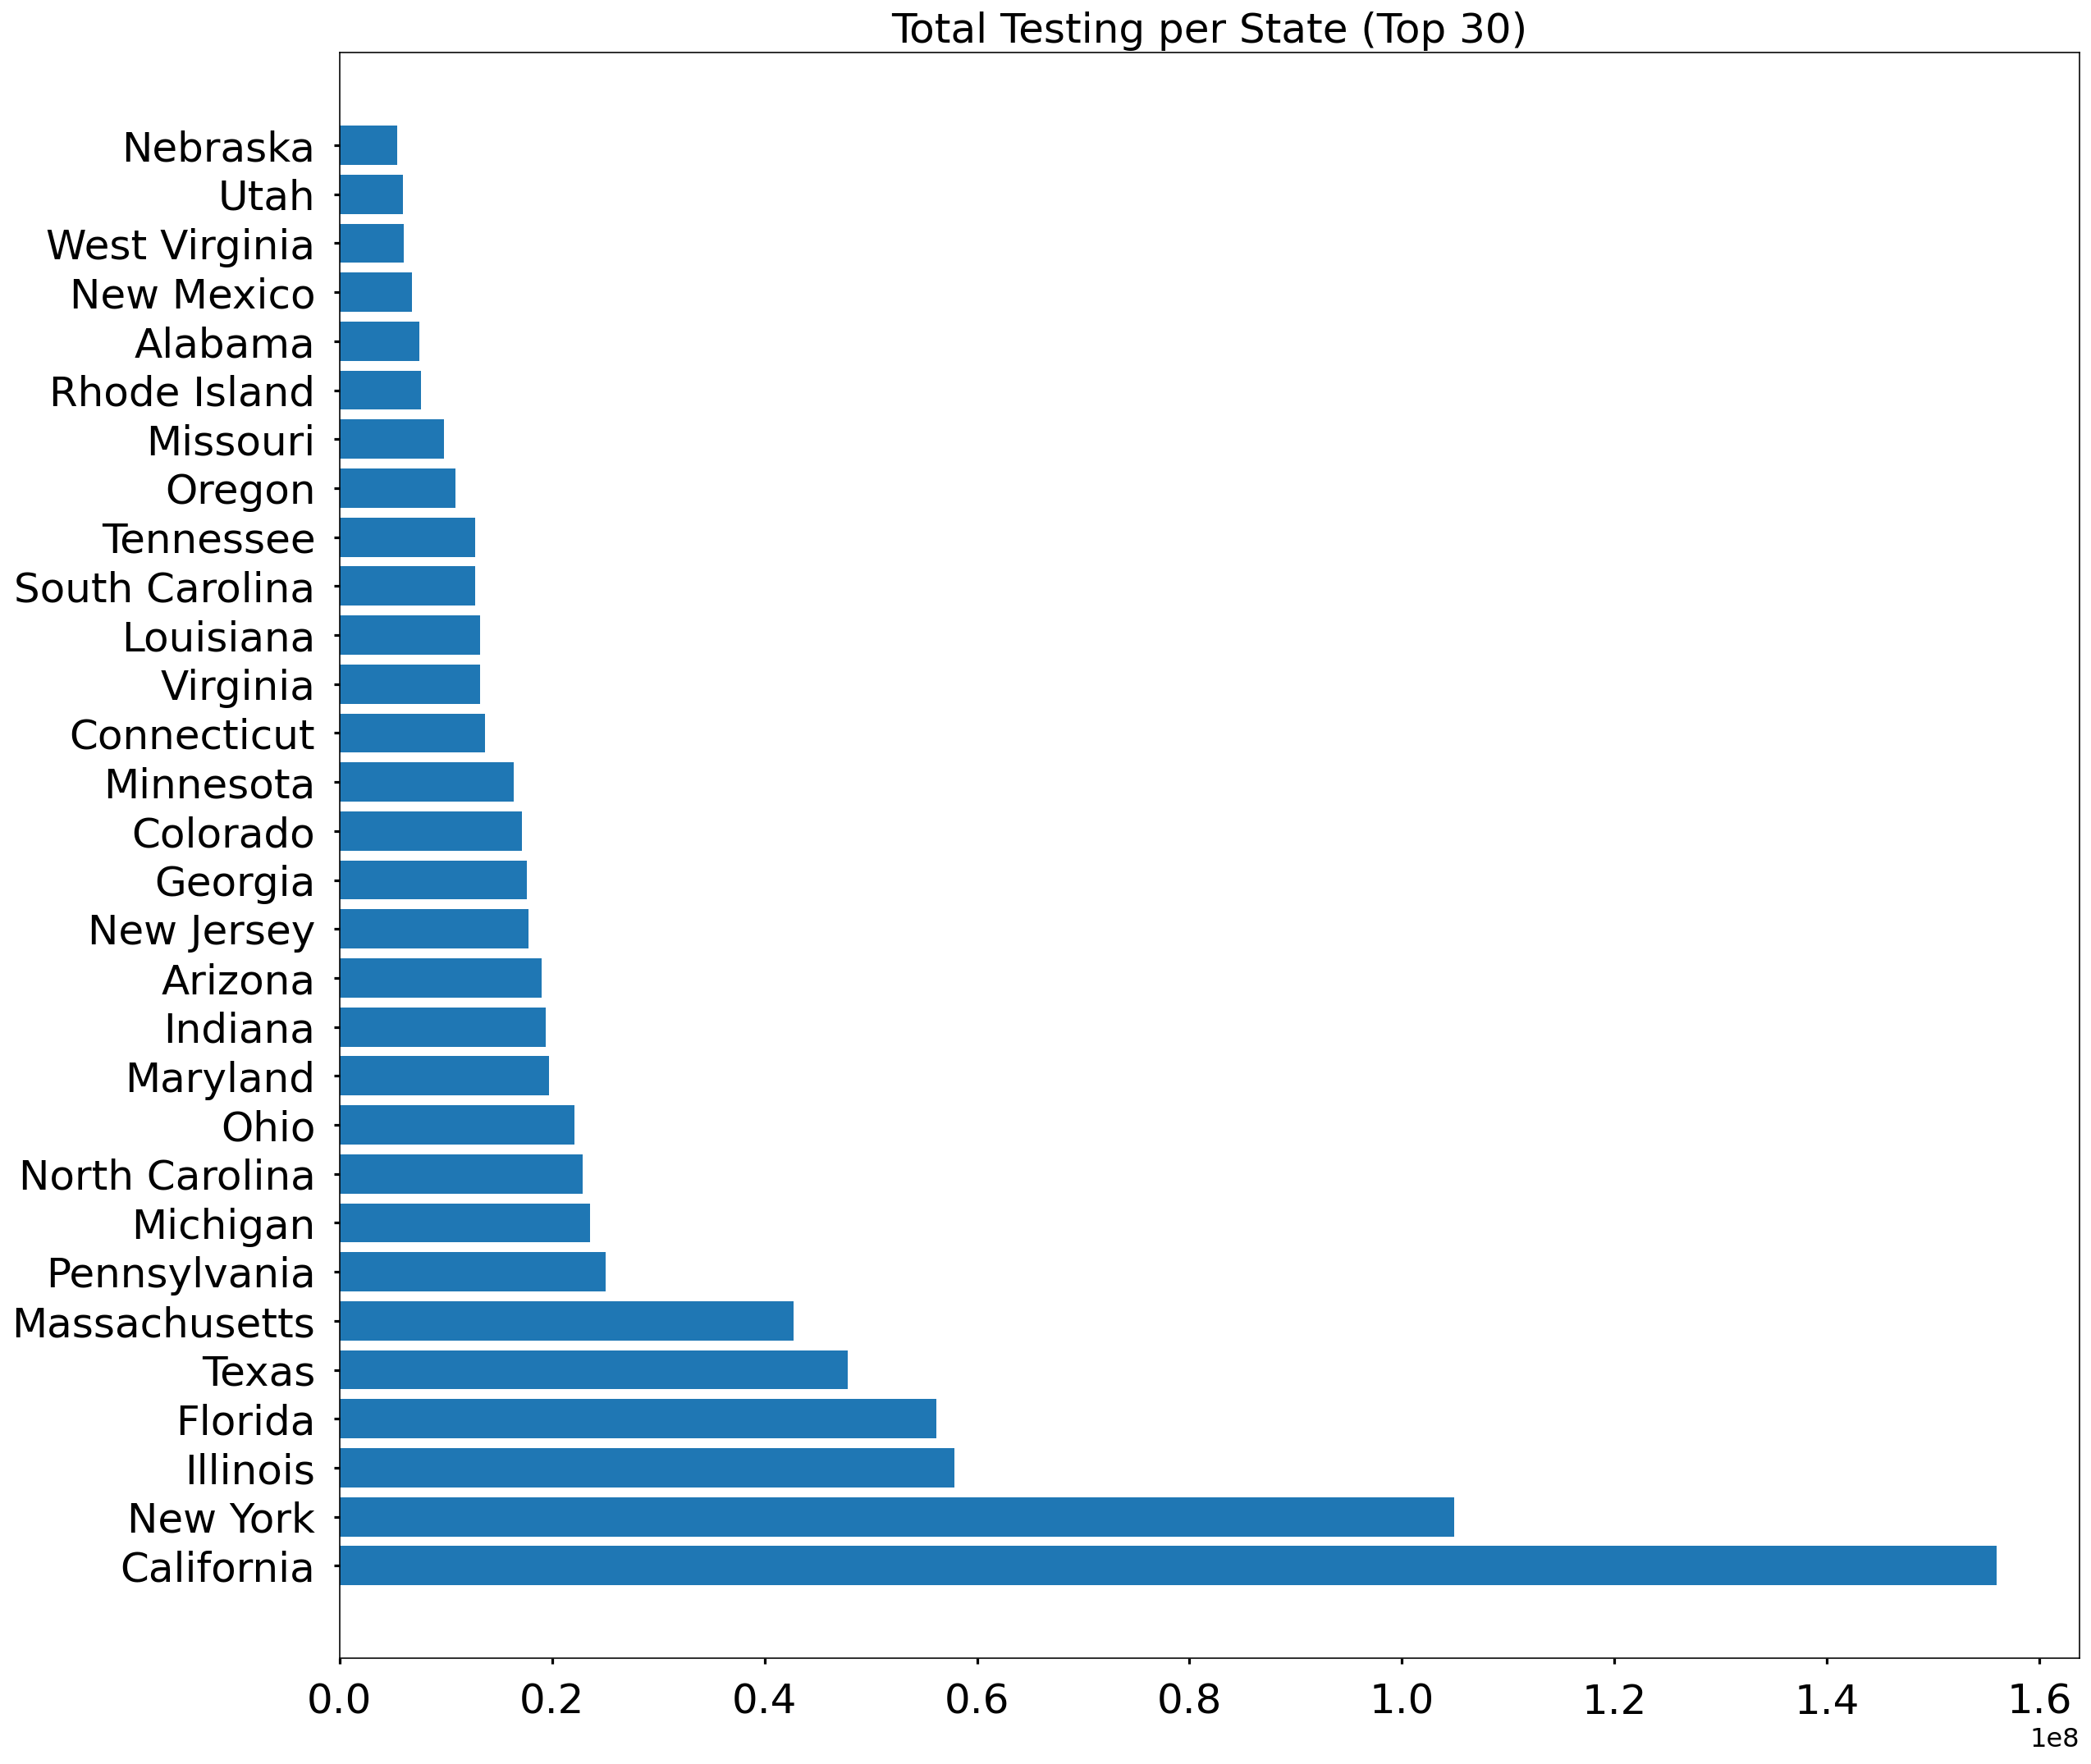

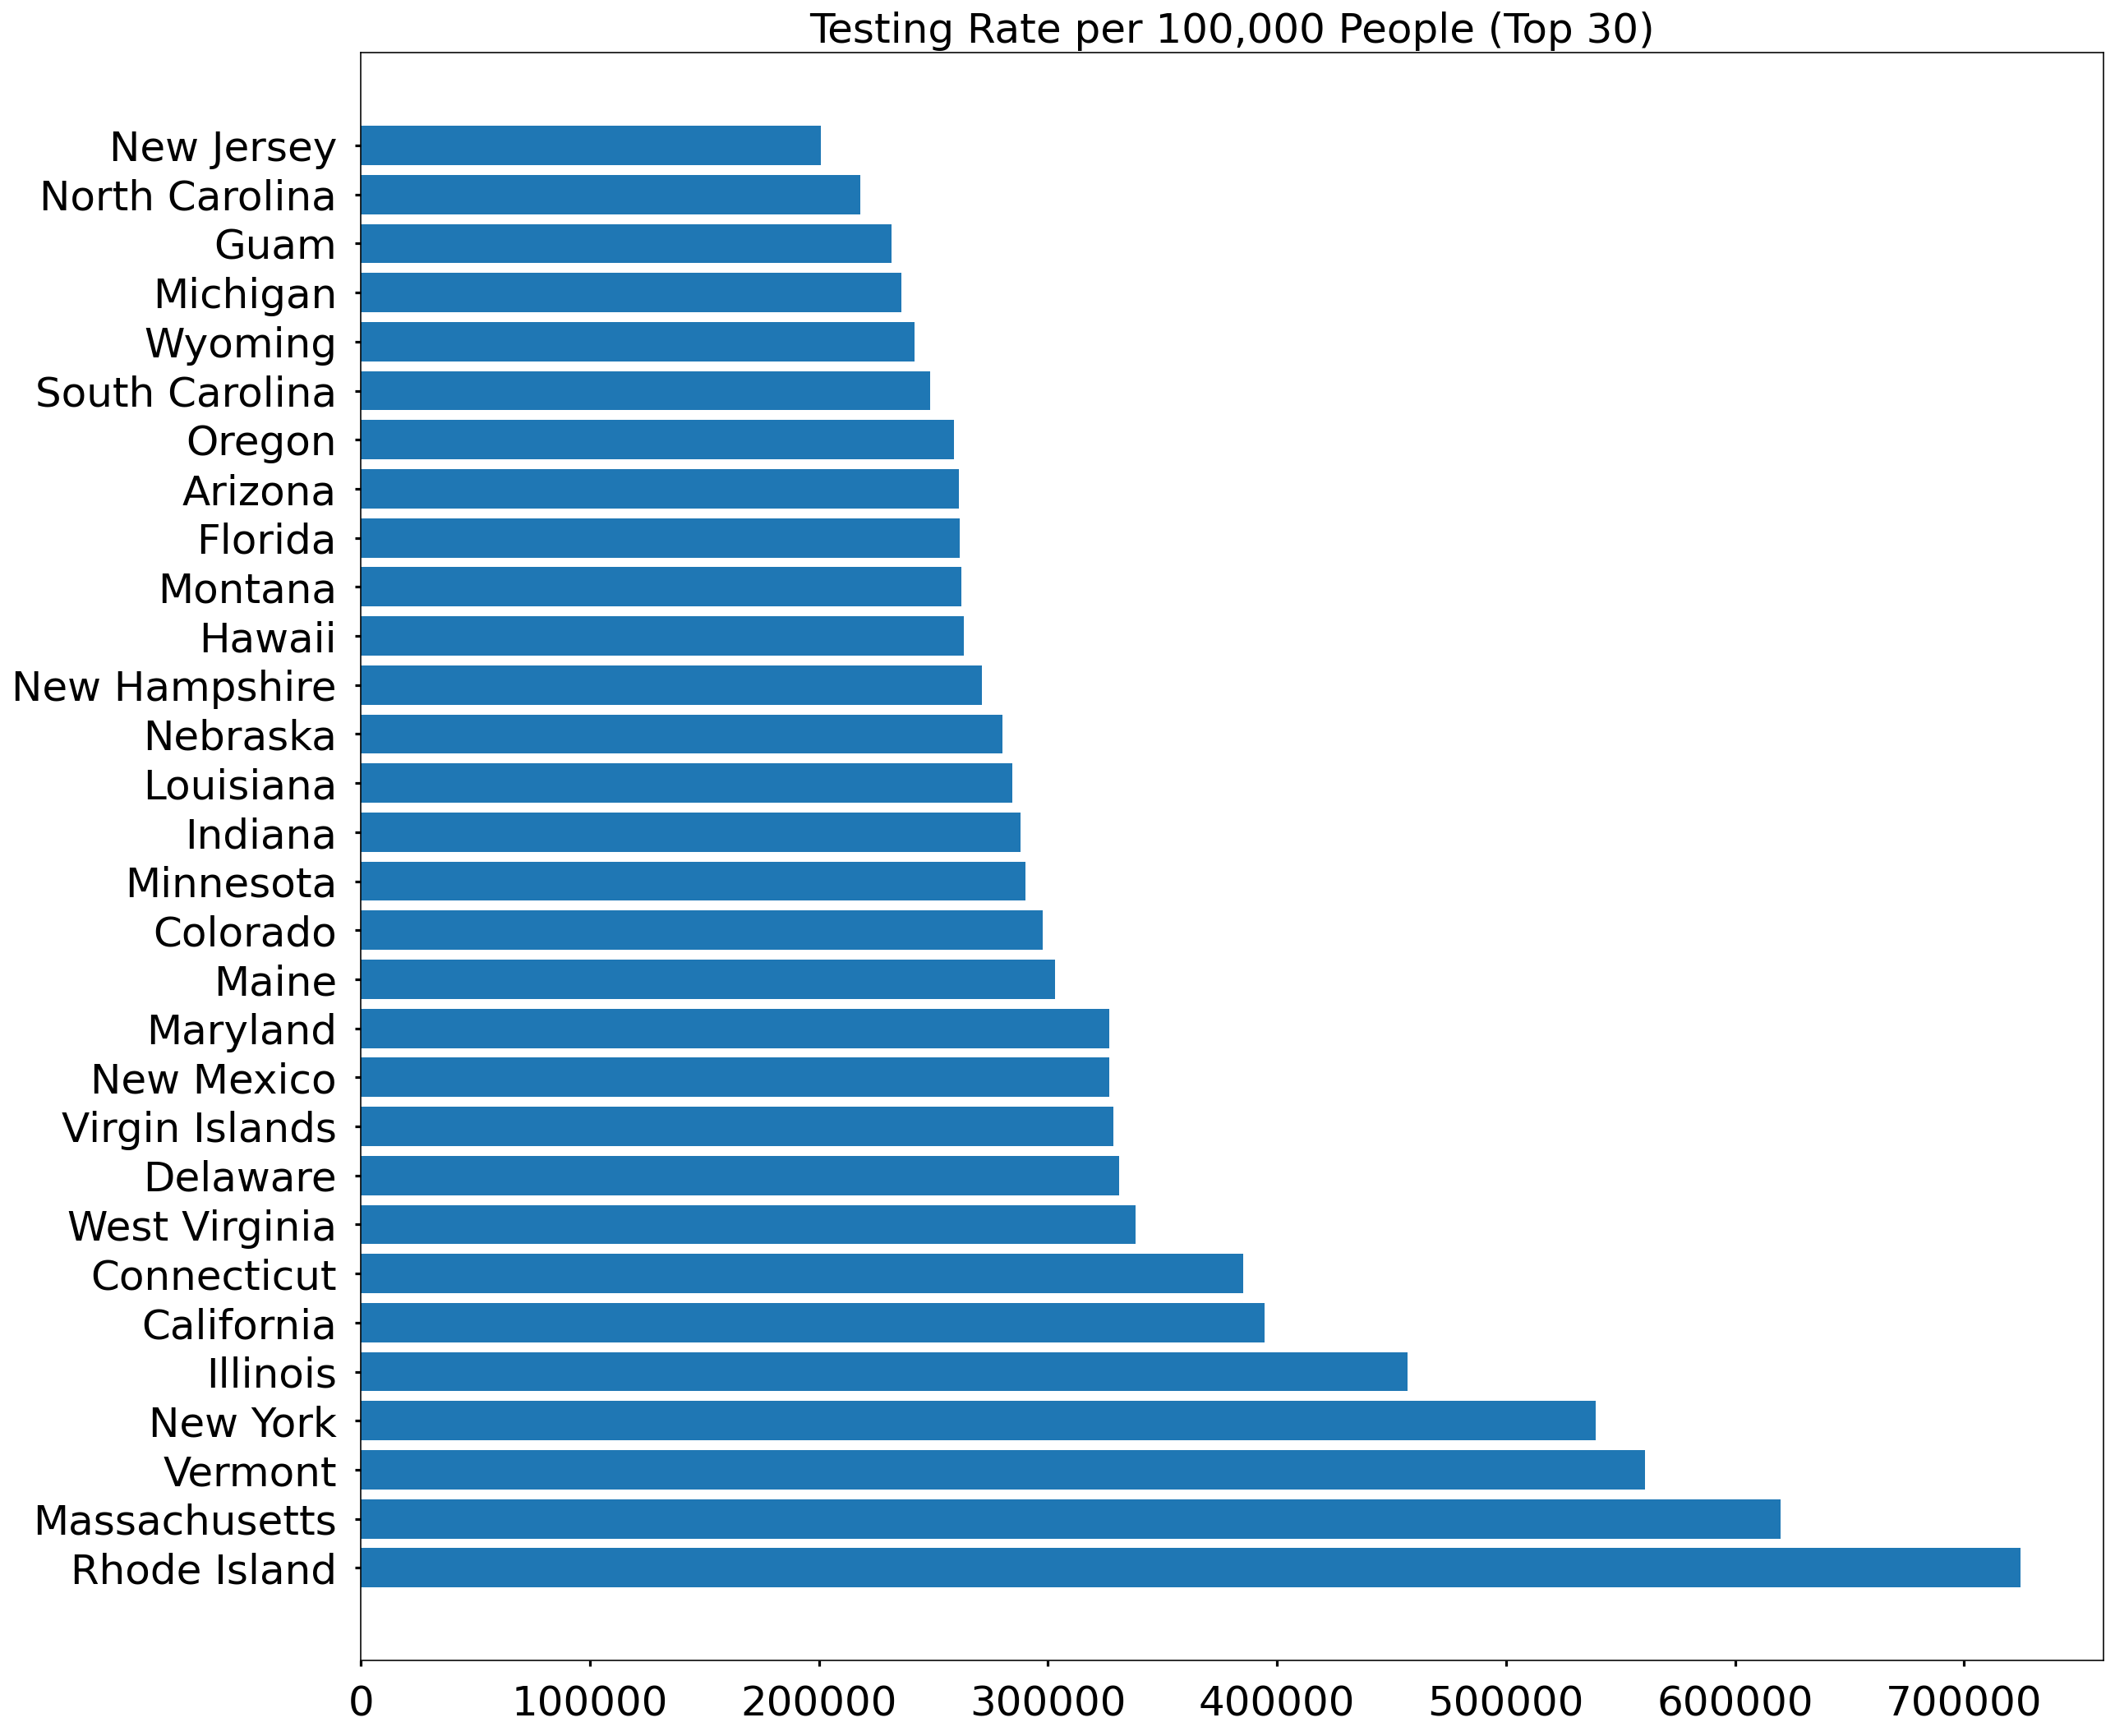

In [ ]:
# Replace nan with 0
us_medical_data.fillna(value=0, inplace=True)

def plot_us_medical_data():
    states = us_medical_data['Province_State'].unique()
    testing_number = []
    testing_rate = []
    
    for i in states:
        testing_number.append(us_medical_data[us_medical_data['Province_State']==i]['Total_Test_Results'].sum())
        testing_rate.append(us_medical_data[us_medical_data['Province_State']==i]['Testing_Rate'].max())
    
    # only show the top 15 states
    testing_states = [k for k, v in sorted(zip(states, testing_number), key=operator.itemgetter(1), reverse=True)]
    testing_rate_states = [k for k, v in sorted(zip(states, testing_rate), key=operator.itemgetter(1), reverse=True)]
  
    for i in range(len(states)):
        testing_number[i] = us_medical_data[us_medical_data['Province_State']==testing_states[i]]['Total_Test_Results'].sum()
        testing_rate[i] = us_medical_data[us_medical_data['Province_State']==testing_rate_states[i]]['Testing_Rate'].sum()
    
    top_limit = 30 
    
    plot_bar_graphs_tall(testing_states[:top_limit], testing_number[:top_limit], 'Total Testing per State (Top 30)')
    plot_bar_graphs_tall(testing_rate_states[:top_limit], testing_rate[:top_limit], 'Testing Rate per 100,000 People (Top 30)')
 

plot_us_medical_data()

<a id='mobility_data'></a>
# Taking a look at Apple's mobility data.
It can help us understand the relationship between mobility and daily increases in coronavirus cases. The graphs below show the data for U.S. states and territories.

In [ ]:
def get_mobility_by_state(transport_type, state, day):
    return apple_mobility[apple_mobility['sub-region']==state][apple_mobility['transportation_type']==transport_type].sum()[day]

In [ ]:
apple_mobility.head()

NameError: name 'apple_mobility' is not defined

In [ ]:
# sample testing 
get_mobility_by_state('walking', 'Connecticut', '2020-07-30')

In [ ]:
# revising date to fit with the mobility format 
revised_dates = []
for i in range(len(dates)):
    revised_dates.append(datetime.datetime.strptime(dates[i], '%m/%d/%y').strftime('%Y-%m-%d'))

In [ ]:
# returns true if it is a weekend, and false if it is a weekday 
def weekday_or_weekend(date):
    date_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    day_of_the_week =  date_obj.weekday()
    if (day_of_the_week+1) % 6 == 0 or (day_of_the_week+1) % 7 == 0:
        return True 
    else:
        return False 

In [ ]:
revised_day_since_1_22 = [i for i in range(len(revised_dates))]

In [ ]:
import matplotlib.dates as mdates
states = ['New York', 'Connecticut', 'Florida', 'California', 'Texas', 'Georgia', 'Arizona', 'Illinois', 'Louisiana', 'Ohio',
          'Tennessee', 'North Carolina', 'South Carolina', 'Alabama', 'Missouri', 'Kansas', 'Pennsylvania', 'Wisconsin', 'Virginia', 'Massachusetts', 'Utah', 'Minnesota',
         'Oklahoma', 'Iowa', 'Arkansas', 'Kentucky', 'Puerto Rico', 'Colorado', 'Idaho', 'New Jersey', 'Nevada', 'Maryland', 'Indiana', 'Washington', 'Montana', 'Rhode Island',
         'New Mexico', 'Oregon', 'Vermont', 'North Dakota', 'New Hampshire']
states.sort()

# making sure the dates are in sync 
mobility_latest_date = apple_mobility.columns[-1]
mobility_latest_index = revised_dates.index(mobility_latest_date)

for state in states:
    # weekend and weekday mobility are separated 
    weekday_mobility = []
    weekday_mobility_dates = [] 
    weekend_mobility = [] 
    weekend_mobility_dates = [] 
    
    for i in range(len(revised_dates)):
        if i <= mobility_latest_index:
            if weekday_or_weekend(revised_dates[i]):
                weekend_mobility.append(get_mobility_by_state('walking', state, revised_dates[i]))
                weekend_mobility_dates.append(i)
            else:
                weekday_mobility.append(get_mobility_by_state('walking', state, revised_dates[i]))
                weekday_mobility_dates.append(i)
        else:
            pass
        
    # remove null values (they are counted as 0)
    for i in range(len(weekend_mobility)):       
        if weekend_mobility[i] == 0 and i != 0:
            weekend_mobility[i] = weekend_mobility[i-1]
        elif weekend_mobility[i] == 0 and i == 0:
            weekend_mobility[i] = weekend_mobility[i+1]
        else:
            pass
        
    for i in range(len(weekday_mobility)):       
        if weekday_mobility[i] == 0 and i != 0:
            weekday_mobility[i] = weekday_mobility[i-1]
        elif weekday_mobility[i] == 0 and i == 0:
            weekday_mobility[i] = weekday_mobility[i+1]
        else:
            pass
    
    
    weekday_mobility_average = moving_average(weekday_mobility, 7)
    weekend_mobility_average = moving_average(weekend_mobility, 7)
    
    plt.figure(figsize=(16, 10))
    plt.bar(weekday_mobility_dates, weekday_mobility, color='cornflowerblue')
    plt.plot(weekday_mobility_dates, weekday_mobility_average, color='green')
    
    plt.bar(weekend_mobility_dates, weekend_mobility, color='salmon')
    plt.plot(weekend_mobility_dates, weekend_mobility_average, color='black')
    
    plt.legend(['Moving average (7 days) weekday mobility', 'Moving Average (7 days) weekend mobility', 'Weekday mobility', 'Weekend mobility'], prop={'size': 18})
    plt.title('{} Walking Mobility Data'.format(state), size=25)
    plt.xlabel('Days since 1/22', size=25)
    plt.ylabel('Mobility Value', size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()